# Setting

## libraries

In [116]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

SRC = (Path.cwd().parent / "src").resolve()
sys.path.insert(0, str(SRC))

import importlib
import functions
importlib.reload(functions)   

from functions import *       

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import os
import os,sys
import numpy as np
import scipy as sp
#import scipy.speciali ws
import scipy.stats as stats
from scipy.stats import norm

import pandas as pd
import pickle
import csv
#import shutil
#import time
import warnings
import nilearn as ni
from nilearn import datasets, plotting #, surface, plotting, input_data
#from nilearn.image import math_img, threshold_img, smooth_img
#from nilearn.plotting import cm as nip_cm
import nibabel as nib
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from matplotlib.patches import Patch
#from matplotlib.cm import ScalarMappable
from scipy.stats import pearsonr, zscore, spearmanr
#from scipy.spatial.distance import euclidean
# from scipy.spatial import distance
# from scipy import linalg, optimize
import matplotlib.colorbar as colorbar

import matplotlib as mpl
# import plotly.io as pio

import enigmatoolbox
from enigmatoolbox.utils.parcellation import surface_to_parcel, parcel_to_surface
import statsmodels.api as sm
# from brainsmash.mapgen.base import Base
# from brainsmash.mapgen.eval import base_fit
# from brainsmash.mapgen.stats import nonparp, pairwise_r


# import plotly.graph_objects as go
# from neuromaps.datasets import fetch_annotation
# import matplotlib.ticker as ticker


# import textwrap



# # Define FSL directories
os.environ["FSLDIR"] = "/usr/share/fsl/5.0"
os.environ["FSLOUTPUTTYPE"] = "NIFTI_GZ"
os.environ["FSLTCLSH"] = "/usr/bin/tclsh"
os.environ["FSLWISH"] = "/usr/bin/wish"
os.environ["FSLMULTIFILEQUIT"] = "True"
os.environ["LD_LIBRARY_PATH"] = "/usr/share/fsl/5.0:/usr/lib/fsl/5.0"

# Fix deprecated NumPy aliases
np.float = float
np.int = int




## IMPORTANT: select the data (main or external) AND including/excluding the limbic nework

In [88]:
# ================================================
# 1. session selection (main or external dataset):
# ================================================
session = "AUF" # AUF(main), ZU(TUM.rep), m1 (Vienna.rep session 1) or m2 (Vienna.rep session 2)
#DIR = f'/data/raw/{session}/'
nrois = 360


# ================================================
# 2. select if you want to include limbic or not:
# ================================================

# including limbic:
# limb_ind = []
# LIMB = 'with'

# excluding limbic:
limb_ind = np.array([88, 90, 92, 93, 110, 118, 120, 122, 131, 135, 165, 166, 172, 268, 270, 272, 273, 290, 298, 300, 302, 311, 314, 315, 346, 352])-1
LIMB = 'without'

# ================================================
# 3. Parameter assignments:
# ================================================
# sub = os.listdir(DIR)
# sub = sorted([int(s.split('-')[1]) for s in sub if s.startswith('sub-') and s.split('-')[1].isdigit()])

# if session == "ZU":
    
#     sub.remove(14)


# if session == 'AUF':
#     sub = [3,7,12,14,17,20,23,25,26,28,29,30,31,32,33,35,36,37,38]
    
# sub_size = len(sub)
nrois_rem = nrois - len(limb_ind) 


net_label = pd.read_csv(f'../data/external/mmp2yeo7nw_mapping.csv')
net_label = net_label.drop(limb_ind,axis=0)
net_names = pd.unique(net_label['yeo_7_nw']) 
net_label.reset_index(drop=True, inplace=True)
network_to_number = {network: i + 1 for i, network in enumerate(net_label['yeo_7_nw'].unique())}
net_label['network_number'] = net_label['yeo_7_nw'].map(network_to_number)

## network colors assignment:
color = [(139, 19, 140),(1,131, 182),(51, 116, 32),
         (222, 75, 82),(226, 55, 255),(239, 156, 60), (255, 254, 211)]
net_color  = [(r/255, g/255, b/255 , 1)  for r,g,b in color]
customPalette = sns.set_palette(sns.color_palette(net_color))

xtik = ['Vis','Som','Dors','Def', 'Sal' , 'Cont', 'Limbic']
net_names = ['Vis', 'SomMot' ,'DorsAttn' ,'Default' ,'SalVentAttn', 'Cont', 'Limbic' ]
net_num = net_label["network_number"]
new_net_num = np.tile(net_num.transpose(), (nrois_rem, 1)) 
num_net = len(net_names) 


# ================================================
# 4. Parcellation setting:
# ================================================
mmp = nib.load(f'../data/external/MMP_in_MNI_corr_3mm.nii.gz').get_fdata()
v11 , v22 , v33  = mmp.shape
nvox2 = v11 * v22 * v33
mmp_re = mmp.reshape((nvox2, 1),order='F')
regions = np.unique(mmp_re)[1:]

regions_rem = regions.copy()
regions_rem = np.delete(regions_rem , limb_ind)



# ================================================
# 4. figure's properties:
# ================================================
FONT = 18
COLOR = "#8DD084" #"#97A8C0" #"#8DD084"
IC_PET_COLf = '#70DEB6'
IC_PET_COLe = '#1FC488'
organg = [255/255,164/255,0/255]
GRAY = "#7F7F7F"
deg_color = "#97A8C0"
IC_color = "#8DD084"

approximate_colors = [
    "#341C54",
    "#3E2166",
    "#482677",  # Dark Purple
    "#44357F",
    "#404387",  # Purple-Blue
    "#33638D",  # Blue
    "#2A788E",  # Blue-Green
    "#1F9E89",  # Greenish-Blue
    "#35B779",  # Green
    "#6DCD59",  # Lime Green
    "#B4DE2C",  # Yellow-Green
    "#D9E329",
    "#EBE527",
    
  
    "#FDE725"   # Yellow
]
approximate_cmap = LinearSegmentedColormap.from_list("approximate_colormap", approximate_colors, N=256)
CMAP_IC = approximate_cmap

cool_cmap = plt.get_cmap('cool')
#cool_cmap = cm.get_cmap('cool')
cool_colors = cool_cmap(np.linspace(0.15, 0.95, 256))  
CMAP_DC = LinearSegmentedColormap.from_list("adjusted_cool", cool_colors)



## color maps/ colors

In [89]:

approximate_colors = [
    "#341C54",
    "#3E2166",
    "#482677",  # Dark Purple
    "#44357F",
    "#404387",  # Purple-Blue
    "#33638D",  # Blue
    "#2A788E",  # Blue-Green
    "#1F9E89",  # Greenish-Blue
    "#35B779",  # Green
    "#6DCD59",  # Lime Green
    "#B4DE2C",  # Yellow-Green
    "#D9E329",
    "#EBE527",
    
  
    "#FDE725"   # Yellow
]
approximate_cmap = LinearSegmentedColormap.from_list("approximate_colormap", approximate_colors, N=256)
CMAP_IC = approximate_cmap


import matplotlib.pyplot as plt

# Now this works:
cool_cmap = plt.get_cmap('cool')
#cool_cmap = cm.get_cmap('cool')
cool_colors = cool_cmap(np.linspace(0.15, 0.95, 256))  
CMAP_DC = LinearSegmentedColormap.from_list("adjusted_cool", cool_colors)




network_colors = [(139, 19, 140), (1, 131, 182), (51, 116, 32), (222, 75, 82), (226, 55, 255), (239, 156, 60), (255, 254, 211)]
network_colors = [(r / 255, g / 255, b / 255) for (r, g, b) in network_colors]

network_colors = ['#9A199A', '#45B7F0','#58B73B','#DE4B52','#E237FF','#F29A36','#FEFFD3']
lighter_colors = [sns.light_palette(color, n_colors=100, input="hex")[50] for color in network_colors]
#lighter_colors2 = [(*sns.color_palette([color])[0], 0.01) for color in lighter_colors]  # Adding 50% opacity

lighter_colors2 = ['#C788C7' , '#C0EBFF' , '#BEE6B2' , '#F2BABD', '#F6C2FF','#F7C58D']
network_order_original = ['Vis', 'SomMot', 'DorsAttn', 'Default', 'SalVentAttn', 'Cont']


network_color_map = dict(zip(network_order_original, network_colors))
lighter_color_map = dict(zip(network_order_original, lighter_colors))



import matplotlib.colors as mcolors

def matplotlib_to_plotly(cmap, n=256):
    """Convert a Matplotlib colormap to a Plotly-friendly colorscale."""
    return [
        [i / (n - 1), mcolors.rgb2hex(cmap(i / (n - 1))[:3])]
        for i in range(n)
    ]


# Preparing data

## Loading  MwC and DC matrices


In [5]:
'''
The following files were generated in MwC_generation.ipynb notebook:
1. DATA_avg_wSC_{session}_{LIMB}_limb.csv
2. data_single_sub_wSC_{session}_{LIMB}_limb.pkl
3. DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv
4. data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl

'''
###????????????? does it needed?
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'

with open(file_path, 'rb') as file:
    data_input = pickle.load(file)
    



num_voxels = data_input['num_voxels']
MIconn_allsub = data_input['MIconn_allsub']
SCconn_allsub = data_input['SCconn_allsub']
Pearconn_allsub = data_input['Pearconn_allsub']
edata_medianallsub = data_input['edata_medianallsub'] 
###?????????????



## with structural connectivity masking:
data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_wSC_{session}_{LIMB}_limb.pkl'
data_avg_pr_path = f'../data/processed/DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl'

## without structural connectivity masking:
# data_avg_pr_path = f'../data/processed/DATA_avg_woSC_pr_{session}_{LIMB}_limb.csv'
# data_sub_pr_path = f'../data/processed/data_single_sub_woSC_pr_{session}_{LIMB}_limb.pkl'
# data_avg_path = f'../data/processed/DATA_avg_woSC_{session}_{LIMB}_limb.csv'
# data_sub_path = f'../data/processed/data_single_sub_woSC_{session}_{LIMB}_limb.pkl'




#--------------------------------------------------------------------------------------------
#-------------- Reading MWC matrices --------------------------
#--------------------------------------------------------------------------------------------

DATA_avg =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub = pickle.load(file)



ICallsub_w = data_single_sub['ICallsub_w']
ICallsub_b = data_single_sub['ICallsub_b']
degallsub_w = data_single_sub['degallsub_w']
degallsub_b = data_single_sub['degallsub_b']
AvgMIallsub = data_single_sub['AvgMIallsub']




#--------------------------------------------------------------------------------------------
#-------------- Reading DC matrices ----------------
#--------------------------------------------------------------------------------------------


DATA_avg_pr   = pd.read_csv(data_avg_pr_path)

with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr = pickle.load(file)

ICallsub_w_pr = data_single_sub_pr['ICallsub_w']
ICallsub_b_pr = data_single_sub_pr['ICallsub_b']
degallsub_w_pr = data_single_sub_pr['degallsub_w']
degallsub_b_pr = data_single_sub_pr['degallsub_b']
AvgMIallsub_pr = data_single_sub_pr['AvgMIallsub']    
sub_size = ICallsub_w_pr.shape[1]




## Correlation values

In [6]:
from scipy.stats import pearsonr

corr_IC_E_allsub = np.zeros((sub_size))
corr_btw_E_allsub = np.zeros((sub_size))
corr_eig_E_allsub = np.zeros((sub_size))
corr_deg_w_E_allsub = np.zeros((sub_size))
corr_IC_E_net_allsub = np.zeros((sub_size, len(net_names)))
p_IC_E_allsub = np.zeros((sub_size))
p_deg_w_E_allsub = np.zeros((sub_size))
p_btw_E_allsub = np.zeros((sub_size, 1))
p_eig_E_allsub = np.zeros((sub_size, 1))
p_IC_E_net_allsub = np.zeros((sub_size, len(net_names)))

for j in range(sub_size):
                             
    degallsub_w_z = zscore(degallsub_w[:, j] , nan_policy='omit')
    corr_IC_E_allsub[j], p_IC_E_allsub[j] = pcor(ICallsub_w[:, j], edata_medianallsub[:, j])
    corr_deg_w_E_allsub[j], p_deg_w_E_allsub[j] = pcor(degallsub_w_z, edata_medianallsub[:, j])
     
    
corr_IC_w_E, p_IC_w_E = pcor(DATA_avg.ICallsub_w_avg, DATA_avg.pet_avg)
corr_IC_b_E, p_IC_b_E = pcor(DATA_avg.ICallsub_b_avg, DATA_avg.pet_avg)
corr_IC_w_deg, p_IC_w_deg = pcor(DATA_avg.ICallsub_w_avg, DATA_avg.degallsub_w_avg)
corr_IC_b_deg, p_IC_b_deg = pcor(DATA_avg.ICallsub_b_avg, DATA_avg.degallsub_b_avg)
corr_deg_w_E, p_deg_w_E = pcor(zscore(DATA_avg.degallsub_w_avg , nan_policy='omit'), DATA_avg.pet_avg)




# Figures

## Fig 2a: MwC vs CMRglc 

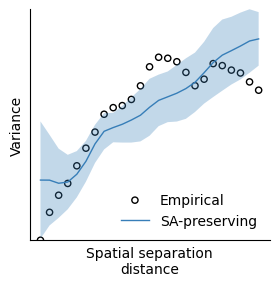

Pearson correlation: 0.6268332792998648
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 0.00e+00


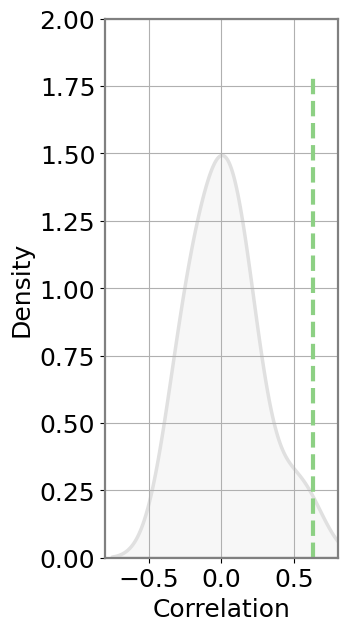

95% CI of null distribution: [-0.27, 0.40]


<Figure size 600x400 with 0 Axes>

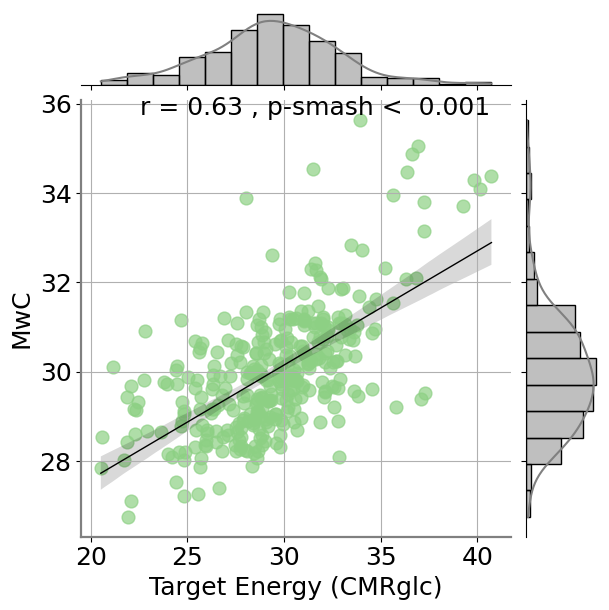

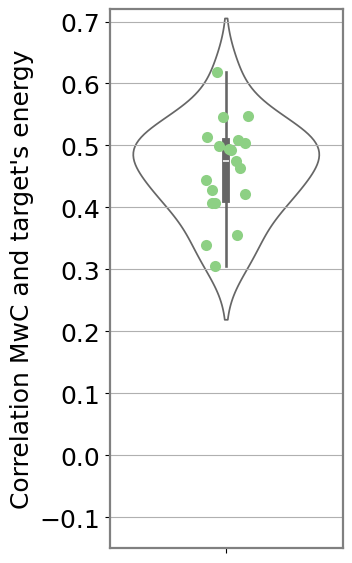

<Figure size 1500x1500 with 0 Axes>

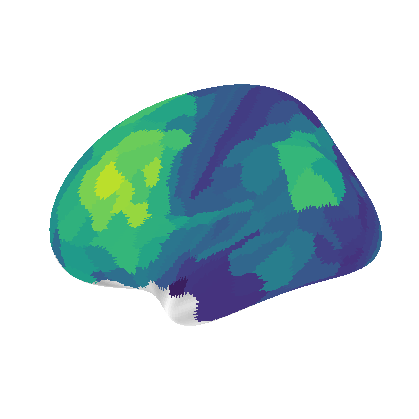

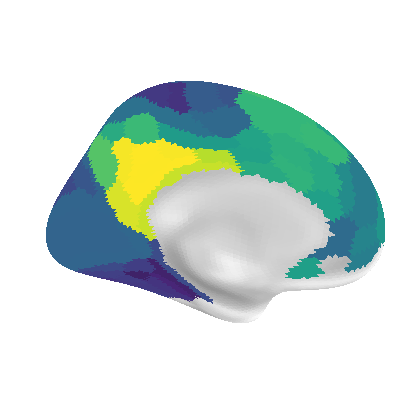

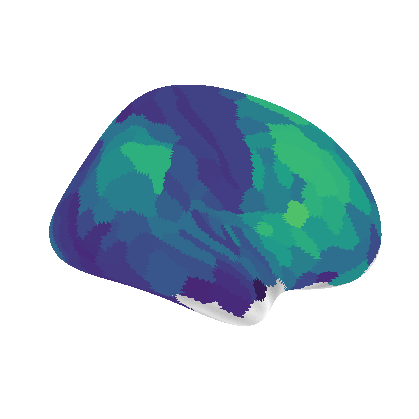

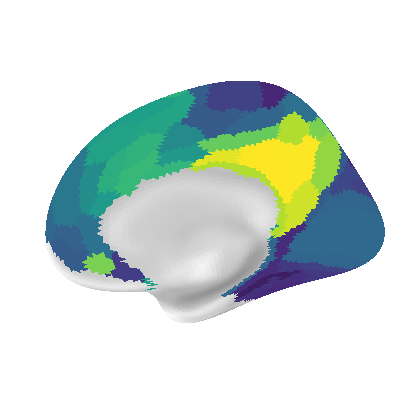

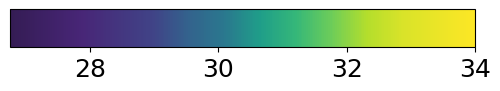

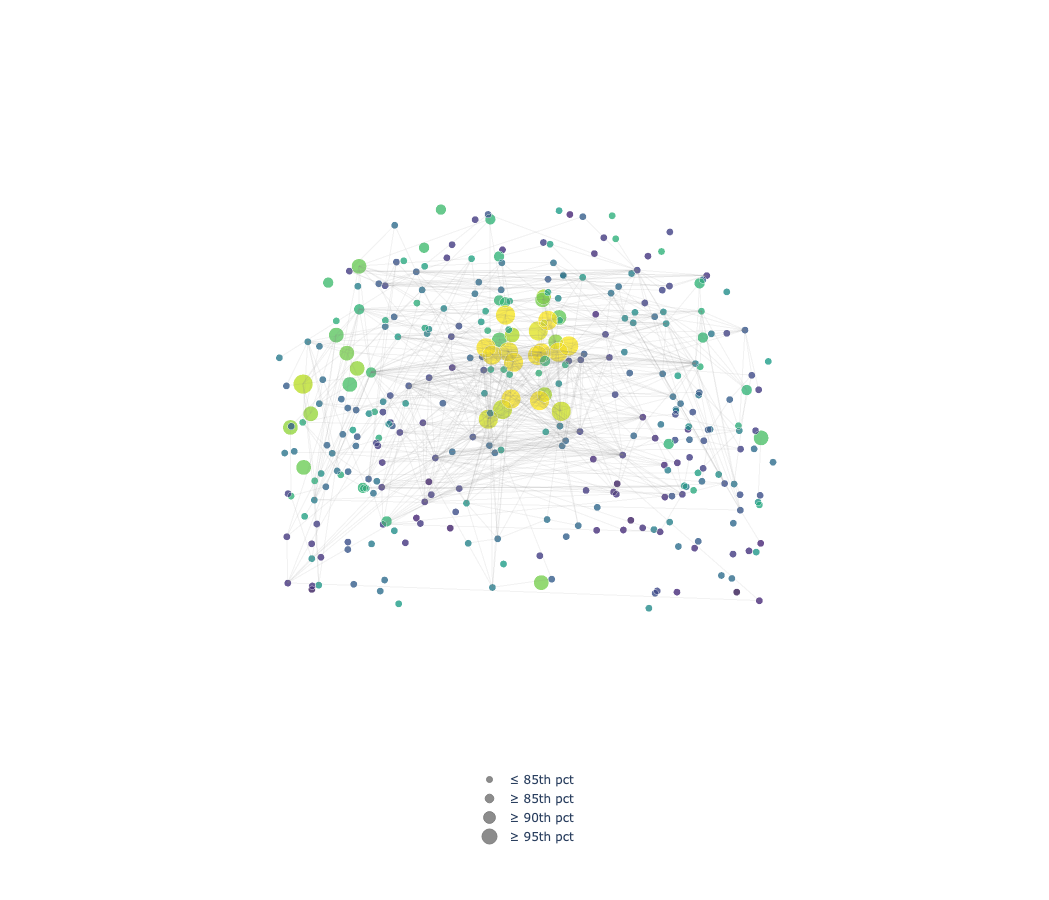

In [11]:
#--------------------------------------------------------------------------------------------
#----------------------  spatial autocorrelation (SAC) -----------------------------------
#-------------------------------------------------------------------------------------------- 

niter = 10
test_stat_IC ,surrogate_brainmap_corrs_IC, sa_corrected_p_value_IC, spatially_naive_p_value_IC = Spatial_AC(DATA_avg , "IC", LIMB,niter)
sac1 = '#0199DD' 
sac2 = '#8CCF83'
sac3 = '#FEAD01'


fig, ax = plt.subplots(figsize=(3, 7))

plt.grid(True)
g = sns.kdeplot(surrogate_brainmap_corrs_IC, color= "#E0E0E0", ax=ax, fill= True, linewidth=2.5 )

ax.axvline(corr_IC_w_E, 0, 0.9, color= COLOR, linestyle='dashed', lw=3)

    
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_ylim(0, 2)
ax.set_xlim(-0.8, 0.8)
spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)


plt.tick_params(axis='both', which='major', labelsize= FONT)      
plt.xlabel('Correlation', fontsize = FONT)
plt.ylabel('Density', fontsize = FONT)
plt.savefig(f'../results/Figures/CMRglc_IC_hist.png', dpi=300, bbox_inches='tight')
plt.show()


lower_bound = np.percentile(surrogate_brainmap_corrs_IC, 5)
upper_bound = np.percentile(surrogate_brainmap_corrs_IC, 95)
print(f"95% CI of null distribution: [{lower_bound:.2f}, {upper_bound:.2f}]")


#--------------------------------------------------------------------------------------------
#------------------ scatter IC_avg , CMRglc_avg / group analysis ----------------------------
#--------------------------------------------------------------------------------------------
COLOR = IC_color
plt.figure(figsize=(6,4))
g = sns.jointplot(data=DATA_avg, x='pet_avg', y='ICallsub_w_avg', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 


p_IC_w_E_smash = p_IC_w_E

if p_IC_w_E_smash < 0.0001:
     title = "r = {:.2f} , p-smash <  {:.3f}".format(float(corr_IC_w_E), float(0.001))
else:
    title = "r = {:.2f} , p-smash = {:.3f}".format(float(corr_IC_w_E), float(p_IC_w_E_smash))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'MwC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('Target Energy (CMRglc)', fontsize = FONT)
plt.ylabel('MwC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_edgecolor("gray")
plt.savefig(f'../results/Figures/CMRglc_IC_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

#--------------------------------------------------------------------------------------------
#------------------ Box plot individual correlation between IC and E  -----------------------
#--------------------------------------------------------------------------------------------


data = pd.DataFrame({'r': corr_IC_E_allsub, 'p': p_IC_E_allsub})
fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)
violin = sns.violinplot(data=data, y='r', ax=ax, color = COLOR)
violin.collections[0].set_facecolor('none')
sns.stripplot(data=data[data['p'] < 0.05], y='r', color=COLOR , size = 8, ax=ax)
sns.stripplot(data=data[data['p'] >= 0.05], y='r', color='red' , size = 8, ax=ax)
ax.set_ylabel('Correlation MwC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.15,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.savefig(f'../results/Figures/CMRglc_IC_box.png', dpi=300, bbox_inches='tight')   
plt.show()




#--------------------------------------------------------------------------------------------
#--------------------------- IC map on the brain surface  -----------------------------------
#--------------------------------------------------------------------------------------------



IC = np.array(DATA_avg.ICallsub_w_avg).reshape(-1, 1)
IC_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[limb_ind] = False
ind = ind[mask]
IC_allrois[ind] = np.abs(IC)


fig = plt.figure(figsize=(5, 5),dpi=300)

fsaverage = datasets.fetch_surf_fsaverage()

V_min = IC.min()
V_max = IC.max()
V_max = 34

col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                         
                           hemi='left', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_IC,colorbar=False)
plt.savefig(f'../results/Figures/IC_surf_l_lateral.png', dpi=300, bbox_inches='tight') 
plt.show()

col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                       
                           hemi='left', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_IC,colorbar=False)
plt.savefig(f'../results/Figures/IC_surf_l_medial.png', dpi=300, bbox_inches='tight') 
plt.show()


col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                           
                           hemi='right', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_right'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_IC,colorbar=False)
plt.savefig(f'../results/Figures/IC_surf_r_lateral.png', dpi=300, bbox_inches='tight') 
plt.show()

col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                         
                           hemi='right', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_right'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_IC,colorbar=False)
plt.savefig(f'../results/Figures/IC_surf_r_medial.png', dpi=300, bbox_inches='tight')
plt.show()

cmap = plt.get_cmap(CMAP_IC)
norm = plt.Normalize(vmin=V_min, vmax=V_max)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cb = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

cb.ax.tick_params(labelsize=18)

plt.savefig('../results/Figures/IC_colorbar_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()
#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest IC values -----------------------------------
#-------------------------------------------------------------------------------------------- 
plot_node_surf(DATA_avg, MIconn_allsub, 'ICallsub_w_avg', CMAP_IC,0.1, limb_ind)  





## Fig 2b: DC vs CMRglc

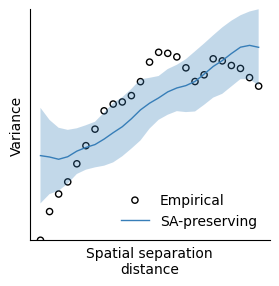

Pearson correlation: 0.2771927112654038
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 1.00e-01


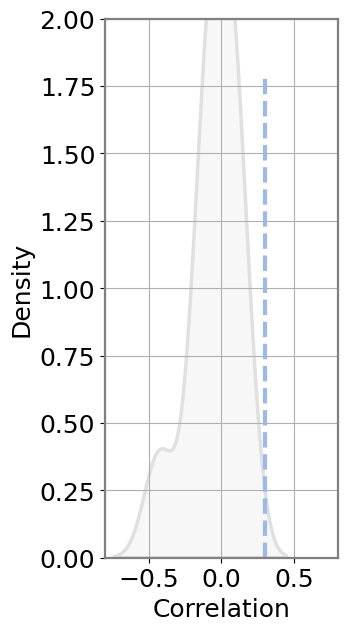

95% CI of null distribution: [-0.29, 0.13]


<Figure size 600x400 with 0 Axes>

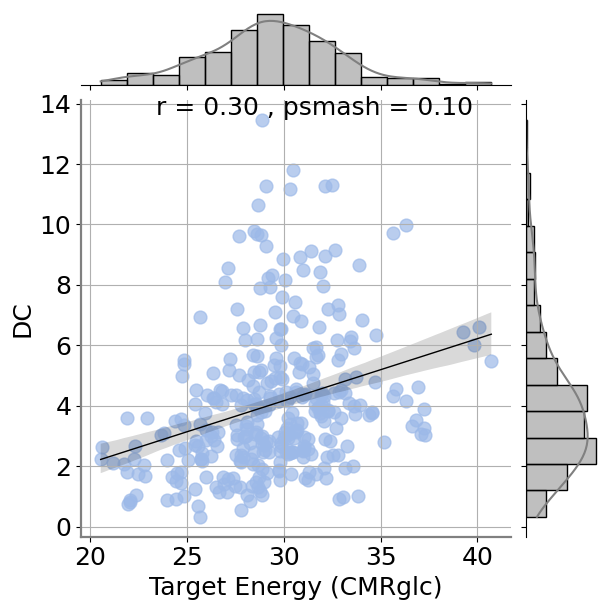

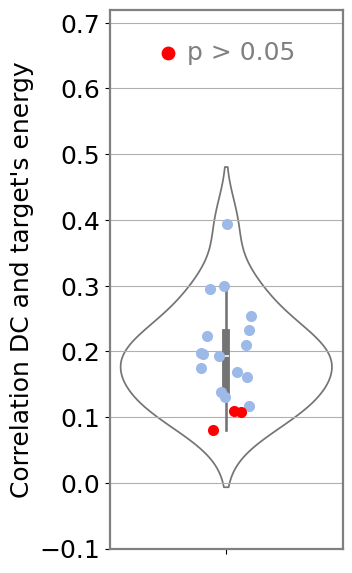

<Figure size 1500x1500 with 0 Axes>

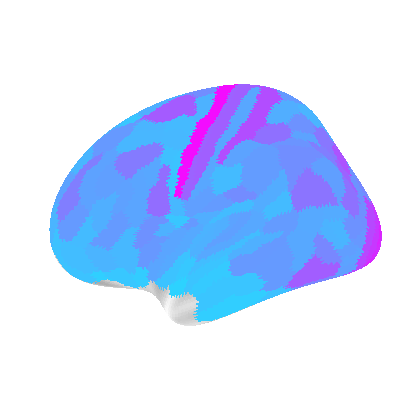

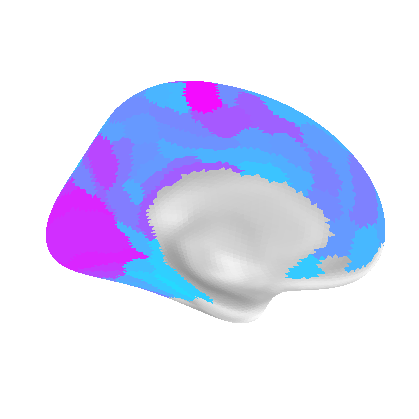

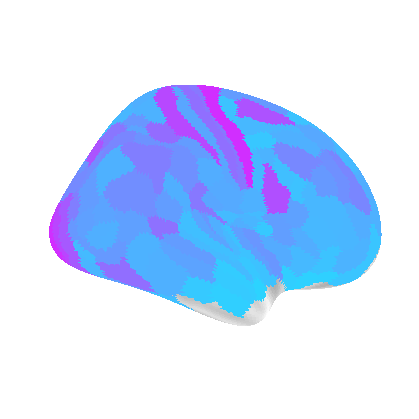

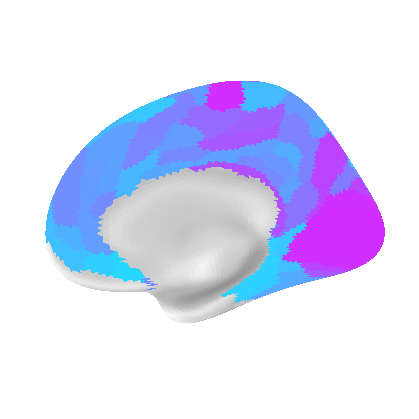

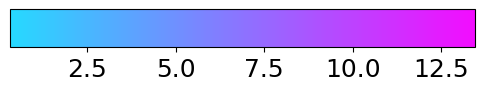

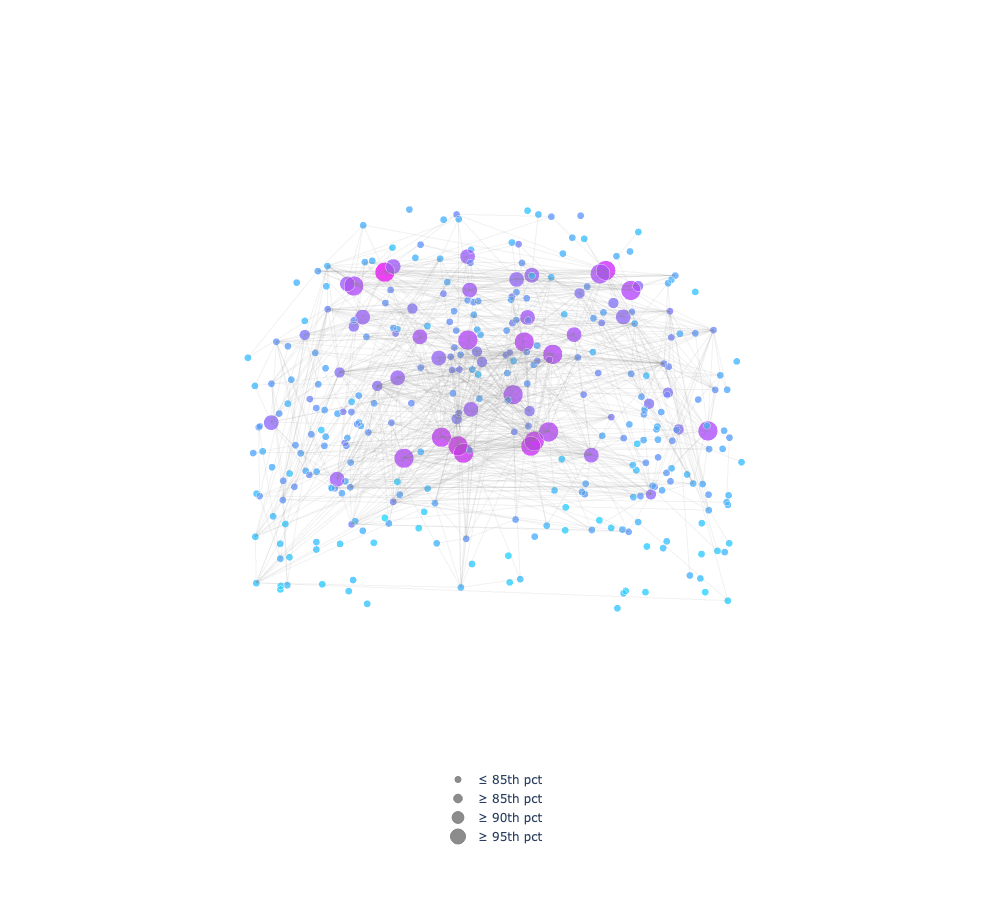

In [12]:
deg_color = '#9CB9E8'
COLOR = deg_color
     


corr_deg_w_E_allsub = np.zeros((sub_size))
p_deg_w_E_allsub = np.zeros((sub_size))

for j in range(sub_size):

    corr_deg_w_E_allsub[j], p_deg_w_E_allsub[j] = pcor(degallsub_w_pr[:,j], edata_medianallsub[:, j])     

corr_deg_w_E, p_deg_w_E = pcor(DATA_avg_pr.degallsub_w_avg , DATA_avg_pr.pet_avg)


#--------------------------------------------------------------------------------------------
#----------------------  spatial autocorrelation (SAC) -----------------------------------
#-------------------------------------------------------------------------------------------- 


niter = 10
test_stat_DC ,surrogate_brainmap_corrs_DC, sa_corrected_p_value_DC, spatially_naive_p_value_DC = Spatial_AC(DATA_avg_pr , "deg_w", LIMB,niter)
sac1 = '#0199DD' 
sac2 = '#8CCF83'
sac3 = '#FEAD01'



fig, ax = plt.subplots(figsize=(3, 7))

plt.grid(True)
g = sns.kdeplot(surrogate_brainmap_corrs_DC, color= "#E0E0E0", ax=ax, fill= True, linewidth=2.5 )

ax.axvline(corr_deg_w_E, 0, 0.9, color= COLOR, linestyle='dashed', lw=3)

    
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_ylim(0, 2)
ax.set_xlim(-0.8, 0.8)
#ax.text(0.5, -0.1, "Pearson correlation\nwith IE map", ha='center', va='top', transform=ax.transAxes)
spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)


plt.tick_params(axis='both', which='major', labelsize= FONT)      
plt.xlabel('Correlation', fontsize = FONT)
plt.ylabel('Density', fontsize = FONT)
plt.savefig(f'../results/Figures/CMRglc_DC_hist.png', dpi=300, bbox_inches='tight')
plt.show()


lower_bound = np.percentile(surrogate_brainmap_corrs_DC, 5)
upper_bound = np.percentile(surrogate_brainmap_corrs_DC, 95)
print(f"95% CI of null distribution: [{lower_bound:.2f}, {upper_bound:.2f}]")


#--------------------------------------------------------------------------------------------
#------------------ scatter deg_avg , CMRglc_avg / group analysis ----------------------------
#--------------------------------------------------------------------------------------------

plt.figure(figsize=(6,4))
g = sns.jointplot(data=DATA_avg_pr, x='pet_avg', y='degallsub_w_avg', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 



p_deg_w_E_smash =  sa_corrected_p_value_DC

if p_deg_w_E_smash < 0.0001:
     title = "r = {:.2f} , psmash<  {:.3f}".format(float(corr_deg_w_E), float(0.001))
else:
    title = "r = {:.2f} , psmash = {:.2f}".format(float(corr_deg_w_E), float(p_deg_w_E_smash))


#title = "corr = {:.2f} , pvalue = {:.0e}".format(float(corr_deg_w_E), float(p_deg_w_E))
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'Degree', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('Target Energy (CMRglc)', fontsize = FONT)
plt.ylabel('DC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)   
    
plt.savefig(f'../results/Figures/CMRglc_DC_scatter.png', dpi=300, bbox_inches='tight')   
plt.show()

# #--------------------------------------------------------------------------------------------
# #------------------ Box plot individual correlation between IC and E  -----------------------
# #--------------------------------------------------------------------------------------------

data = pd.DataFrame({'corr': corr_deg_w_E_allsub, 'pval': p_deg_w_E_allsub})
fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)
violin = sns.violinplot(data=data, y='corr', ax=ax, color = COLOR)
violin.collections[0].set_facecolor('none')
sns.stripplot(data=data[data['pval'] < 0.05], y='corr', color=COLOR , size = 8, ax=ax)
sns.stripplot(data=data[data['pval'] >= 0.05], y='corr', color='red' , size = 8, ax=ax)
ax.set_ylabel('Correlation DC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.1,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

    
x_position = 0.25      
y_position = 0.92    
ax.scatter(x_position, y_position, s=80, color='red', transform=ax.transAxes)
ax.text(x_position + 0.08, y_position, 'p > 0.05',
        color='gray', fontsize=FONT, va='center', ha='left', transform=ax.transAxes)


plt.savefig(f'../results/Figures/CMRglc_DC_box.png', dpi=300, bbox_inches='tight')       
plt.show()




#--------------------------------------------------------------------------------------------
#--------------------------- Degree map on the brain surface  -----------------------------------
#--------------------------------------------------------------------------------------------



deg = np.array(DATA_avg_pr.degallsub_w_avg).reshape(-1, 1)
deg_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[limb_ind] = False
ind = ind[mask]
deg_allrois[ind] = np.abs(deg)


fig = plt.figure(figsize=(5, 5),dpi=300)

fsaverage = datasets.fetch_surf_fsaverage()

V_min = deg.min()
V_max = deg.max()
#V_max = 34

col_fsa = parcel_to_surface(deg_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                       
                           hemi='left', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_DC,colorbar=False)
plt.savefig(f'../results/Figures/DC_surf_l_lateral.png', dpi=300, bbox_inches='tight')   
plt.show()

col_fsa = parcel_to_surface(deg_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                    
                           hemi='left', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_DC,colorbar=False)
plt.savefig(f'../results/Figures/DC_surf_l_medial.png', dpi=300, bbox_inches='tight')
plt.show()


col_fsa = parcel_to_surface(deg_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                           
                           hemi='right', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_right'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_DC,colorbar=False)
plt.savefig(f'../results/Figures/DC_surf_r_lateral.png', dpi=300, bbox_inches='tight')
plt.show()

col_fsa = parcel_to_surface(deg_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                           
                           hemi='right', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_right'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_DC,colorbar=False)
plt.savefig(f'../results/Figures/DC_surf_r_medial.png', dpi=300, bbox_inches='tight')
plt.show()

cmap = plt.get_cmap(CMAP_DC)
norm = plt.Normalize(vmin=V_min, vmax=V_max)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cb = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

cb.ax.tick_params(labelsize=18)

plt.savefig('../results/Figures/DC_colorbar_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()


#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest IC values -----------------------------------
#-------------------------------------------------------------------------------------------- 
plot_node_surf(DATA_avg_pr, Pearconn_allsub, 'degallsub_w_avg', CMAP_DC,0.3, limb_ind)  








## Fig 3a: MwC and DC across networks

ANOVA for MwC across networks: F = 31.42, p = 0.0000
ANOVA for DC across networks: F = 2.97, p = 0.0122


/tmp/ipykernel_78695/1528249391.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_78695/1528249391.py:65: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




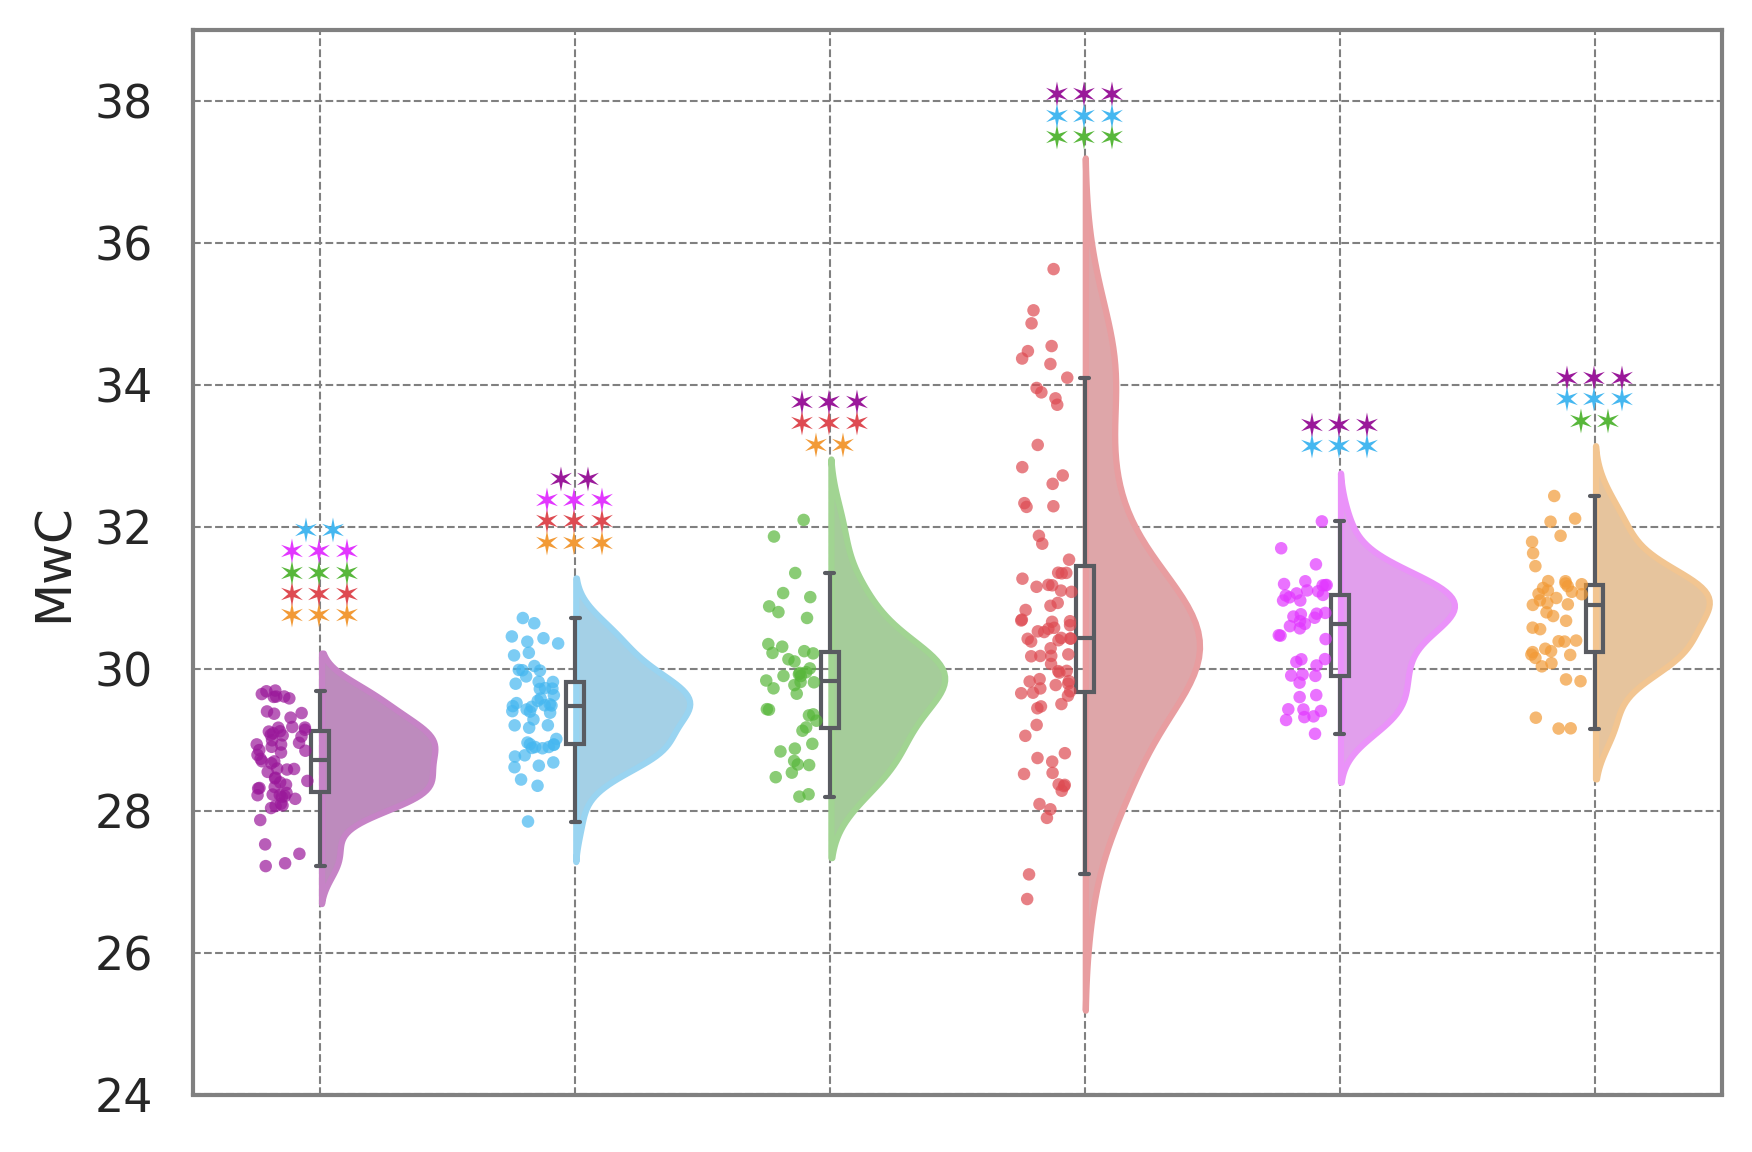

/tmp/ipykernel_78695/1528249391.py:168: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_78695/1528249391.py:183: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Cont
Default
DorsAttn
SalVentAttn
SomMot
Vis


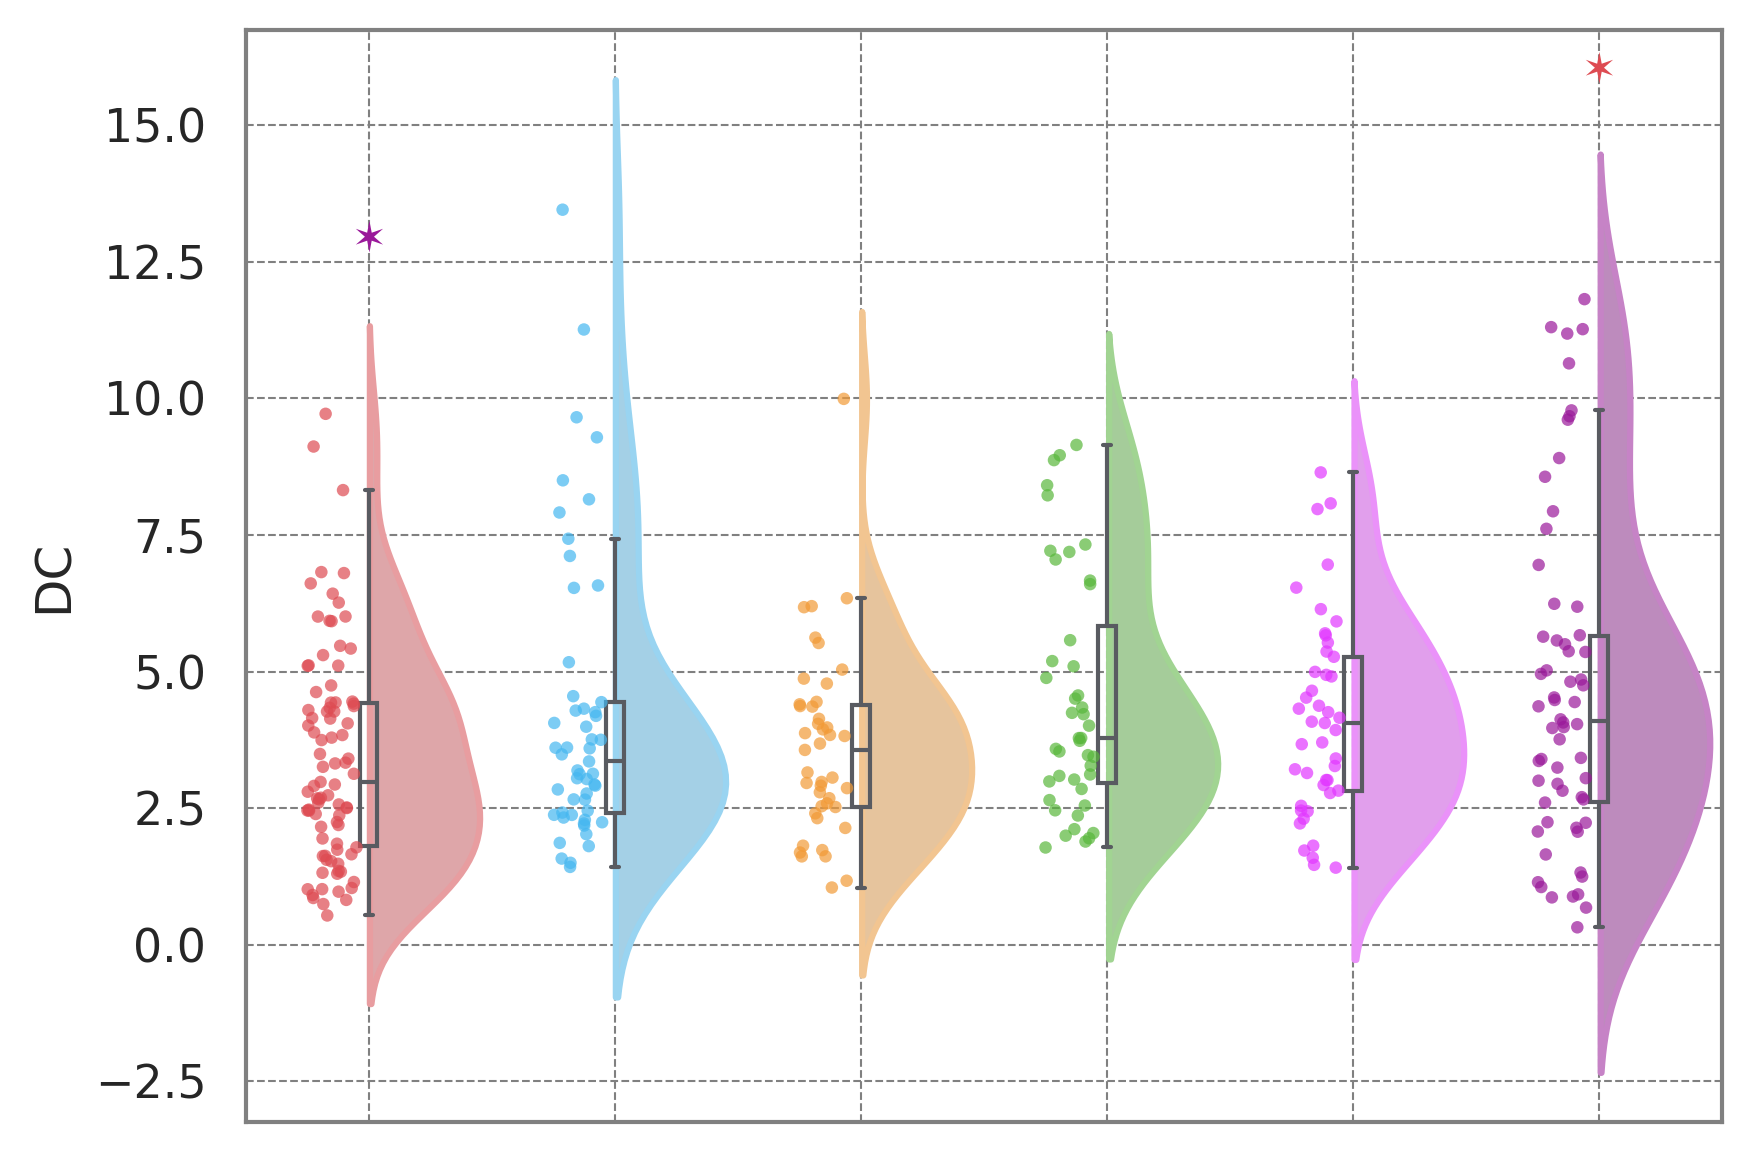

In [92]:
#--------------------------------------------------------------------------------------------
#--------------------------- test across networks  ----------------------------------------------
#--------------------------------------------------------------------------------------------
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.cbook import boxplot_stats
# Group data by network
groups_ic = [DATA_avg[DATA_avg['yeo_7_nw'] == nw]['ICallsub_w_avg'].dropna() for nw in DATA_avg['yeo_7_nw'].unique()]
groups_dc = [DATA_avg_pr[DATA_avg_pr['yeo_7_nw'] == nw]['degallsub_w_avg'].dropna() for nw in DATA_avg_pr['yeo_7_nw'].unique()]

# Run ANOVA test
anova_mwc_result = stats.f_oneway(*groups_ic)
anova_dc_result = stats.f_oneway(*groups_dc)
  

print(f"ANOVA for MwC across networks: F = {anova_mwc_result.statistic:.2f}, p = {anova_mwc_result.pvalue:.4f}")
print(f"ANOVA for DC across networks: F = {anova_dc_result.statistic:.2f}, p = {anova_dc_result.pvalue:.4f}")


# Run Tukey's HSD test for MwC
tukey_mwc = pairwise_tukeyhsd(DATA_avg['ICallsub_w_avg'], DATA_avg['yeo_7_nw'])
tukey_df_mwc = pd.DataFrame(data=tukey_mwc._results_table.data[1:], columns=tukey_mwc._results_table.data[0])
sig_results_mwc = tukey_df_mwc[tukey_df_mwc['p-adj'] < 0.05]

# Run Tukey's HSD test for DC
tukey_dc = pairwise_tukeyhsd(DATA_avg_pr['degallsub_w_avg'], DATA_avg_pr['yeo_7_nw'])
tukey_df_dc = pd.DataFrame(data=tukey_dc._results_table.data[1:], columns=tukey_dc._results_table.data[0])
sig_results_dc = tukey_df_dc[tukey_df_dc['p-adj'] < 0.05]


#--------------------------------------------------------------------------------------------
#--------------------------- DC across networks  ----------------------------------------------
#--------------------------------------------------------------------------------------------

# Calculate median values for each network
median_values = DATA_avg.groupby('yeo_7_nw')['ICallsub_w_avg'].median()

# Sort networks by the median values
ordered_networks = median_values.sort_values().index

# Generate ordered palettes based on the original colors
ordered_palette = [lighter_color_map[network] for network in ordered_networks]
strip_palette = [network_color_map[network] for network in ordered_networks]

# Plot with the correct colors and sorted order
plt.figure(figsize=(6, 4), dpi=300)
ax = plt.gca()
ax.set_axisbelow(True)
# Violin plot with lighter colors for fills
violin_parts = sns.violinplot(
    data=DATA_avg, x='yeo_7_nw', y='ICallsub_w_avg',
    inner=None, linewidth=1.5, palette=ordered_palette,
    width=0.9, density_norm='width', ax=ax,
    order=ordered_networks  # Sort the networks based on median values
)

# Adjust violin outlines to use the correct lighter colors
for pc, network in zip(violin_parts.collections, ordered_networks):
    mpath = np.array(pc.get_paths()[0].vertices)
    mpath[:, 0] = np.clip(mpath[:, 0], np.median(mpath[:, 0]), np.max(mpath[:, 0]))
    pc.set_paths([mpath])
    pc.set_edgecolor(lighter_color_map[network])  # Use the correct lighter color for outlines

# Strip plot with the correct network colors
strip_plot = sns.stripplot(
    data=DATA_avg, x='yeo_7_nw', y='ICallsub_w_avg',
    jitter=0.1, marker='o', alpha=0.7,
    palette=strip_palette, ax=ax, size=3, order=ordered_networks
)

# Offset points in the strip plot (if required)
for patch in strip_plot.collections:
    x_shift = -0.15  
    patch.set_offsets(np.c_[patch.get_offsets()[:, 0] + x_shift, patch.get_offsets()[:, 1]])

# Box plot with updated order but original style
sns.boxplot(
    data=DATA_avg, x='yeo_7_nw', y='ICallsub_w_avg',
    width=0.07, fliersize=0, ax=ax,
    boxprops={'facecolor': 'none', 'edgecolor': '#595B61', 'linewidth': 1},
    whiskerprops={'color': '#595B61', 'linewidth': 1},
    capprops={'color': '#595B61', 'linewidth': 1},
    medianprops={'color': '#595B61', 'linewidth': 1},
    order=ordered_networks
)




xvals = list(ordered_networks)  
networks = sorted(DATA_avg['yeo_7_nw'].unique())
networks = sorted(DATA_avg['yeo_7_nw'].unique())
box_top = {}

for net in networks:
    vals = DATA_avg.loc[DATA_avg['yeo_7_nw'] == net, 'ICallsub_w_avg']
    stats = boxplot_stats(vals, whis=1.5)[0]
    whisker = stats["whishi"]
    
    actual_max = vals.max()
    # Use whichever is higher
    
    box_top[net] = max(whisker, actual_max)
    if net == 'Default':
        box_top[net] =box_top[net] + 0.8
        



    
star_counts = {net: 0 for net in ordered_networks}
star_offset = 0.8   
star_spacing = 0.3  


for idx, row in sig_results_mwc.iterrows():
    group1 = row['group1']
    group2 = row['group2']
    p_value = row['p-adj']
    star_text = get_star(p_value)
    
    
    x_coord1 = xvals.index(group1)
    y_coord1 = box_top[group1] + star_offset + star_counts[group1] * star_spacing
    ax.text(x_coord1, y_coord1, star_text,
            ha='center', va='bottom', fontsize=8, color=network_color_map[group2])
    star_counts[group1] += 1      
   
    x_coord2 = xvals.index(group2)
    y_coord2 = box_top[group2] + star_offset + star_counts[group2] * star_spacing
    ax.text(x_coord2, y_coord2, star_text,
            ha='center', va='bottom', fontsize=8, color=network_color_map[group1])
    star_counts[group2] += 1  

for spine in ax.spines.values():
    spine.set_edgecolor('gray')

plt.grid(True, axis='both', which='major', linestyle='--', linewidth=0.5, color='gray')

ax.set_xticklabels([])

plt.xlabel('')
plt.ylabel('MwC')
plt.ylim([24,39])
plt.tight_layout()
plt.savefig(f'../results/Figures/network_IC_psmash.png', dpi=300, bbox_inches='tight')
plt.show()

#--------------------------------------------------------------------------------------------
#--------------------------- DC across networks  ----------------------------------------------
#--------------------------------------------------------------------------------------------

# Calculate median values for each network
median_values = DATA_avg_pr.groupby('yeo_7_nw')['degallsub_w_avg'].median()

# Sort networks by the median values
ordered_networks = median_values.sort_values().index

# Generate ordered palettes based on the original colors
ordered_palette = [lighter_color_map[network] for network in ordered_networks]
strip_palette = [network_color_map[network] for network in ordered_networks]

# Plot with the correct colors and sorted order
plt.figure(figsize=(6, 4), dpi=300)
ax = plt.gca()

# Violin plot with lighter colors for fills
violin_parts = sns.violinplot(
    data=DATA_avg_pr, x='yeo_7_nw', y='degallsub_w_avg',
    inner=None, linewidth=1.5, palette=ordered_palette,
    width=0.9, density_norm='width', ax=ax,
    order=ordered_networks  # Sort the networks based on median values
)

# Adjust violin outlines to use the correct lighter colors
for pc, network in zip(violin_parts.collections, ordered_networks):
    mpath = np.array(pc.get_paths()[0].vertices)
    mpath[:, 0] = np.clip(mpath[:, 0], np.median(mpath[:, 0]), np.max(mpath[:, 0]))
    pc.set_paths([mpath])
    pc.set_edgecolor(lighter_color_map[network])  # Use the correct lighter color for outlines

# Strip plot with the correct network colors
strip_plot = sns.stripplot(
    data=DATA_avg_pr, x='yeo_7_nw', y='degallsub_w_avg',
    jitter=0.1, marker='o', alpha=0.7,
    palette=strip_palette, ax=ax, size=3, order=ordered_networks
)

# Offset points in the strip plot (if required)
for patch in strip_plot.collections:
    x_shift = -0.15  
    patch.set_offsets(np.c_[patch.get_offsets()[:, 0] + x_shift, patch.get_offsets()[:, 1]])

# Box plot with updated order but original style
sns.boxplot(
    data=DATA_avg_pr, x='yeo_7_nw', y='degallsub_w_avg',
    width=0.07, fliersize=0, ax=ax,
    boxprops={'facecolor': 'none', 'edgecolor': '#595B61', 'linewidth': 1},
    whiskerprops={'color': '#595B61', 'linewidth': 1},
    capprops={'color': '#595B61', 'linewidth': 1},
    medianprops={'color': '#595B61', 'linewidth': 1},
    order=ordered_networks
)

xvals = list(ordered_networks)  
networks = sorted(DATA_avg_pr['yeo_7_nw'].unique())
networks = sorted(DATA_avg_pr['yeo_7_nw'].unique())
box_top = {}

for net in networks:
    print(net)
    vals = DATA_avg_pr.loc[DATA_avg_pr['yeo_7_nw'] == net, 'degallsub_w_avg']
    stats = boxplot_stats(vals, whis=1.5)[0]
    whisker = stats["whishi"]
    
    actual_max = vals.max()
    # Use whichever is higher
    
    box_top[net] = max(whisker, actual_max) +2
    if net == 'Vis':
        box_top[net] =box_top[net] + 1
        



    
star_counts = {net: 0 for net in ordered_networks}
star_offset = 0.8   
star_spacing = 0.3  


for idx, row in sig_results_dc.iterrows():
    group1 = row['group1']
    group2 = row['group2']
    p_value = row['p-adj']
    star_text = get_star(p_value)
    
    
    x_coord1 = xvals.index(group1)
    y_coord1 = box_top[group1] + star_offset + star_counts[group1] * star_spacing
    ax.text(x_coord1, y_coord1, star_text,
            ha='center', va='bottom', fontsize= 10, color=network_color_map[group2])
    star_counts[group1] += 1      
   
    x_coord2 = xvals.index(group2)
    y_coord2 = box_top[group2] + star_offset + star_counts[group2] * star_spacing
    ax.text(x_coord2, y_coord2, star_text,
            ha='center', va='bottom', fontsize=10, color=network_color_map[group1])
    star_counts[group2] += 1  

for spine in ax.spines.values():
    spine.set_edgecolor('gray')

# Final plot adjustments
ax.set_xticklabels([])
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('DC')
plt.tight_layout()
plt.savefig(f'../results/Figures/network_DC_psmash.png', dpi=300, bbox_inches='tight')
plt.show()


## Fig 3b: Diversity 

/tmp/ipykernel_78695/2496580877.py:41: RuntimeWarning:

invalid value encountered in divide



<Figure size 1500x1500 with 0 Axes>

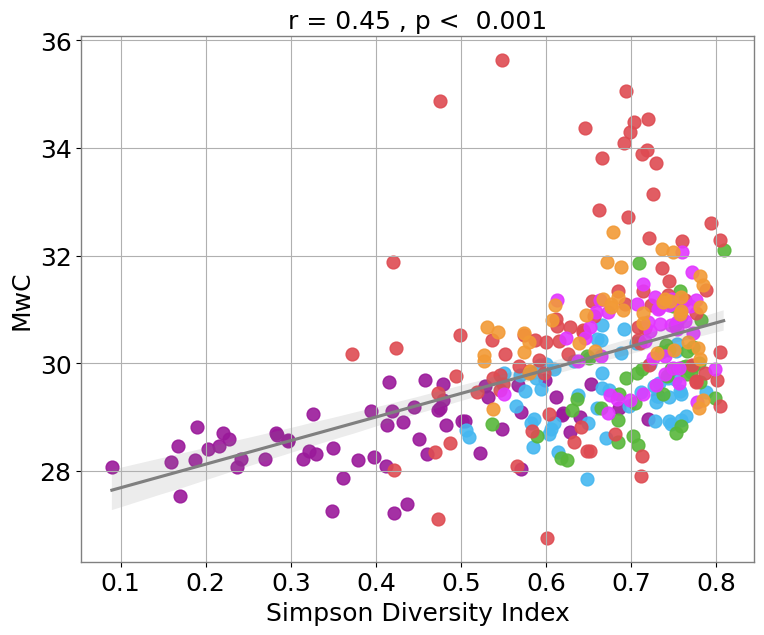

/tmp/ipykernel_78695/2496580877.py:187: RuntimeWarning:

invalid value encountered in divide



<Figure size 1500x1500 with 0 Axes>

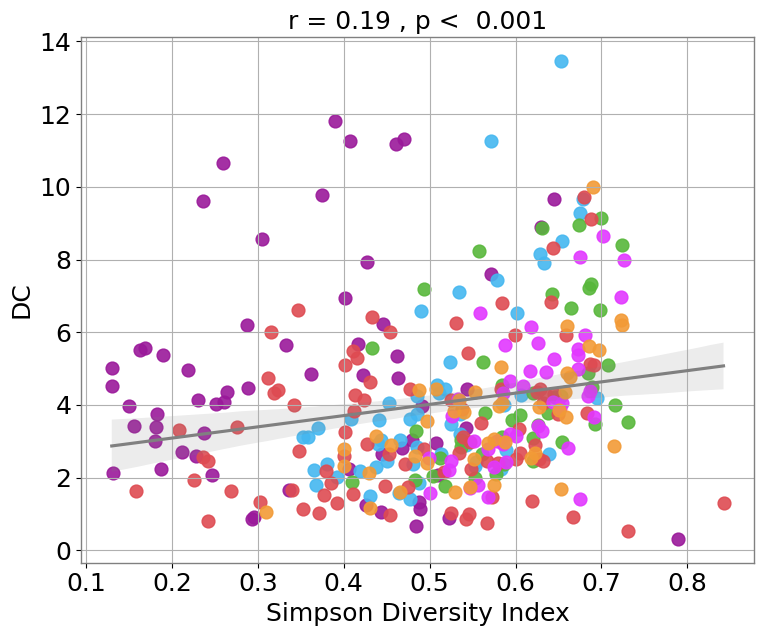

In [16]:
#--------------------------------------------------------------------------------------------
#--------------------------- MwC diversity  ----------------------------------------------
#--------------------------------------------------------------------------------------------
from scipy.stats import spearmanr

thr_sc = 0.1

network_colors = ['#9A199A', '#45B7F0','#58B73B','#DE4B52','#E237FF','#F29A36','#FEFFD3']



Conn_Mat_IC = MIconn_allsub.copy()
Conn_Mat_IC[Conn_Mat_IC < 0.001] = 0
FCmat = Conn_Mat_IC
SCmat = SCconn_allsub.copy()



SCmat_th = np.zeros((SCmat.shape[0], SCmat.shape[1], sub_size))
for i in range(sub_size):
    SCmat_th[:, :, i] = threshold_proportional(SCmat[:, :, i], thr_sc)
SC_mask = SCmat_th.copy()
SC_mask[SC_mask > 0] = 1
FCmat_SC = np.multiply(FCmat , SC_mask)


net_assign_allsub_IC = np.zeros((nrois_rem,num_net, sub_size))
for i in range(sub_size):
    FC = FCmat_SC[:,:,i]
    FC[FC > 0] = 1
    #FC[FC < 0] = 1
    FC_net = np.multiply(FC, new_net_num)
    for r in range(nrois_rem):
        for s in range(num_net):
            net_assign_allsub_IC[r,s,i] = np.nansum(FC_net[r,:] == s+1)

div_allsub_IC = np.zeros((nrois_rem, sub_size))
for i in range(sub_size):    
    net_assign = net_assign_allsub_IC[:,:,i]
    conn_sum = np.nansum(net_assign, axis=1, keepdims=True)      
    probabilities = net_assign / conn_sum
   
    div_allsub_IC[:,i] = 1 - np.nansum(probabilities ** 2 , axis = 1)


div_avg_IC = np.nanmean(div_allsub_IC , axis = 1)



# 
# --------- finding p-smash --------------------------------------
# ic_array = DATA_avg['ICallsub_w_avg'].to_numpy()        
  
# niter = 1000
# data = pd.DataFrame({"x":div_avg_IC, "y":ic_array})
# test_stat_ic ,surrogate_brainmap_corrs_ic, sa_corrected_p_value_ic, spatially_naive_p_value_ic = Spatial_AC(data , "div", LIMB,niter)
# sac1 = '#0199DD' 
# sac2 = '#8CCF83'
# sac3 = '#FEAD01'


# fig, ax = plt.subplots(figsize=(3, 7))

# plt.grid(True)
# g = sns.kdeplot(surrogate_brainmap_corrs_ic, color= "#E0E0E0", ax=ax, fill= True, linewidth=2.5 )

# ax.axvline(test_stat_ic, 0, 0.96, color= COLOR, linestyle='dashed', lw=3)

    
# ax.set_xticks(np.arange(-1, 1.1, 0.5))
# ax.set_ylim(0, 1.8)
# ax.set_xlim(-0.8, 0.8)
# spine_width = 1.6  
# spine_color = 'gray'
# for spine in ax.spines.values():
#     spine.set_linewidth(spine_width)
#     spine.set_color(spine_color)


# plt.tick_params(axis='both', which='major', labelsize= FONT)      
# plt.xlabel('Correlation', fontsize = FONT)
# plt.ylabel('Density', fontsize = FONT)
# plt.show()


# lower_bound = np.percentile(surrogate_brainmap_corrs_ic, 5)
# upper_bound = np.percentile(surrogate_brainmap_corrs_ic, 95)
#print(f"95% CI of null distribution: [{lower_bound:.2f}, {upper_bound:.2f}]") 
    
# ---------------------------------------------------  

plt.figure(figsize=(5, 5), dpi = 300)
    
cor , p = pcor(div_avg_IC , DATA_avg['ICallsub_w_avg'])
p_IC_w_E_smash = p

data = pd.DataFrame({'ent_avg': div_avg_IC, 'ICallsub_w_avg': DATA_avg['ICallsub_w_avg'], 'Network': net_label["yeo_7_nw"]})
grid = sns.FacetGrid(data, hue="Network", palette=network_colors, height=6, aspect=5/4)


grid.map(plt.scatter, 'ent_avg', 'ICallsub_w_avg', alpha=0.9 , s=85)
sns.regplot(data=data, x='ent_avg', y='ICallsub_w_avg', scatter=False, ax=grid.ax, color='gray')


plt.grid(True)

if p_IC_w_E_smash < 0.001:
     title = "r = {:.2f} , p <  {:.3f}".format(float(cor), float(0.001))
else:
    title = "r = {:.2f} , p = {:.2f}".format(float(cor), float(p_IC_w_E_smash))


plt.title(title , fontsize=FONT)
plt.xlabel('Simpson Diversity Index', fontsize=FONT)
plt.ylabel('MwC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize=FONT)

for _, spine in grid.ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('gray')

plt.savefig(f'../results/Figures/diversity_IC_psmash.png', dpi=300, bbox_inches='tight')
plt.show()



#--------------------------------------------------------------------------------------------
#--------------------------- DC diversity  ----------------------------------------------
#--------------------------------------------------------------------------------------------


thr_FC = 0.2
thr_SC = 0.1



Conn_Mat_pr = Pearconn_allsub.copy()
Conn_Mat_pr[Conn_Mat_pr < 0] = 0





Conn_Mat_th = np.zeros((Conn_Mat_pr.shape[0], Conn_Mat_pr.shape[1], sub_size))
for i in range(sub_size):
    Conn_Mat_th[:,:,i] = threshold_proportional(Conn_Mat_pr[:, :, i], thr_FC)

    
SCmat = SCconn_allsub.copy()
SCmat_th = np.zeros((SCmat.shape[0], SCmat.shape[1], sub_size))
for i in range(sub_size):
    SCmat_th[:, :, i] = threshold_proportional(SCmat[:, :, i], thr_SC)
SC_mask = SCmat_th.copy()
SC_mask[SC_mask > 0] = 1
FCmat_SC_pr = np.multiply(Conn_Mat_th , SC_mask)



   
degallsub = np.zeros((nrois_rem, sub_size))
for i in range(sub_size):
    dd = FCmat_SC_pr [:,:,i]
    degallsub[:,i] = np.nansum(dd, axis=1)

    
    


net_assign_allsub_pr = np.zeros((nrois_rem,num_net, sub_size))
for i in range(sub_size):
    FC = np.abs(FCmat_SC_pr[:,:,i])
    FC[FC > 0] = 1
 
    FC_net = np.multiply(FC, new_net_num)
    for r in range(nrois_rem):
        for s in range(num_net):
            net_assign_allsub_pr[r,s,i] = np.nansum(FC_net[r,:] == s+1)


          
            
div_allsub_DC = np.zeros((nrois_rem, sub_size))
for i in range(sub_size):    
    net_assign = net_assign_allsub_pr[:,:,i]
    conn_sum = np.nansum(net_assign, axis=1, keepdims=True)      
    probabilities = net_assign / conn_sum 
    div_allsub_DC[:,i] = 1 - np.nansum(probabilities ** 2 , axis = 1)


div_avg_DC = np.nanmean(div_allsub_DC , axis = 1)
  

      

# --------- finding p-smash -----------------------------------------

deg_array = DATA_avg_pr['degallsub_w_avg'].to_numpy()        
cor , p = pcor(div_avg_DC , deg_array) 



# niter = 10
# data = pd.DataFrame({"x":div_avg_DC, "y":deg_array})
# sac1 = '#0199DD' 
# sac2 = '#8CCF83'
# sac3 = '#FEAD01'


# fig, ax = plt.subplots(figsize=(3, 7))

# plt.grid(True)
# g = sns.kdeplot(surrogate_brainmap_corrs_dc, color= "#E0E0E0", ax=ax, fill= True, linewidth=2.5 )

# ax.axvline(test_stat_dc, 0, 0.96, color= COLOR, linestyle='dashed', lw=3)

    
# ax.set_xticks(np.arange(-1, 1.1, 0.5))
# ax.set_ylim(0, 1.8)
# ax.set_xlim(-0.8, 0.8)
# spine_width = 1.6  
# spine_color = 'gray'
# for spine in ax.spines.values():
#     spine.set_linewidth(spine_width)
#     spine.set_color(spine_color)


# plt.tick_params(axis='both', which='major', labelsize= FONT)      
# plt.xlabel('Correlation', fontsize = FONT)
# plt.ylabel('Density', fontsize = FONT)
# plt.show()


# lower_bound = np.percentile(surrogate_brainmap_corrs_dc, 5)
# upper_bound = np.percentile(surrogate_brainmap_corrs_dc, 95)
# print(f"95% CI of null distribution: [{lower_bound:.2f}, {upper_bound:.2f}]") 

# ----------------------------------------------------------------    


plt.figure(figsize=(5, 5), dpi = 300)

data = pd.DataFrame({'ent_avg': div_avg_DC, 'degallsub_w_avg': deg_array, 'Network': net_label["yeo_7_nw"]})
grid = sns.FacetGrid(data, hue="Network", palette=network_colors, height=6, aspect=5/4)


grid.map(plt.scatter, 'ent_avg', 'degallsub_w_avg', alpha=0.9 , s=85)
sns.regplot(data=data, x='ent_avg', y='degallsub_w_avg', scatter=False, ax=grid.ax, color='gray')

p_DC_w_E_smash = p
if p_DC_w_E_smash < 0.001:
     title = "r = {:.2f} , p <  {:.3f}".format(float(cor), float(0.001))
else:
    title = "r = {:.2f} , p = {:.2f}".format(float(cor), float(p_IC_w_E_smash))


plt.grid(True)
plt.title(title, fontsize=FONT)
plt.xlabel('Simpson Diversity Index', fontsize=FONT)
plt.ylabel('DC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize=FONT)

for _, spine in grid.ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('gray')
plt.savefig(f'../results/Figures/diversity_DC_psmash.png', dpi=300, bbox_inches='tight')
plt.show()

## Fig 3c: Neurosynth

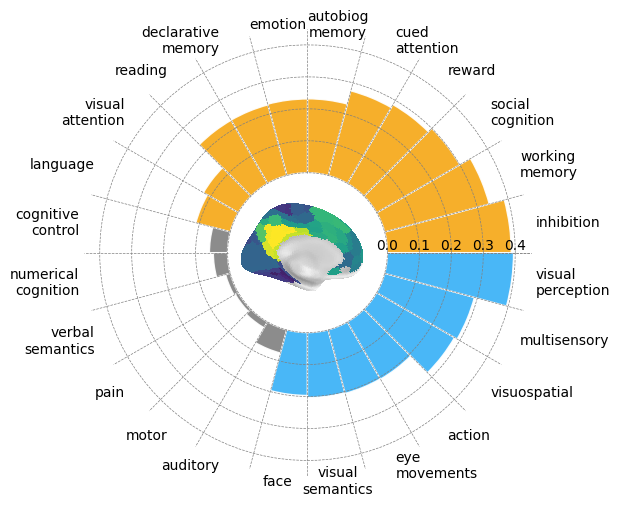

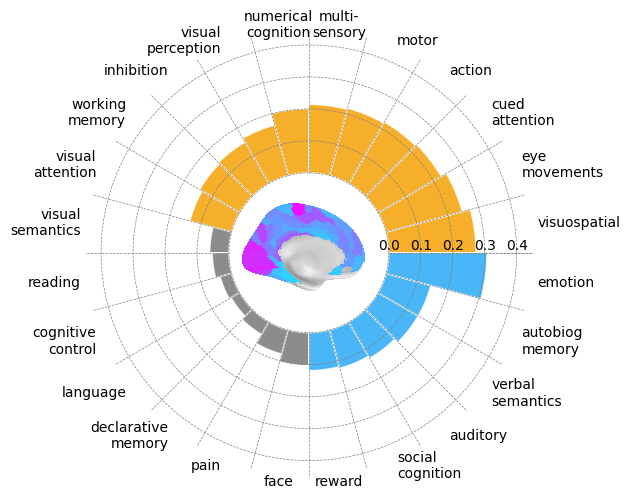

In [17]:
alltasks_rois = pd.read_csv('../data/external/Neurosynth_roi.csv', header=None)
alltasks_rois_rem = np.delete(alltasks_rois, limb_ind, axis =0 )


labels = ['face', 'verbal semantics', 'cued attention', 'working memory','autobiographical memory', 'reading', 'inhibition', 'motor',
          'visual perception', 'numerical cognition', 'reward', 'visual attention','multisensory', 'visuospatial','eye movements', 'action',
          'auditory', 'pain', 'language', 'declarative memory','visual semantics', 'emotion', 'cognitive control', 'social cognition']


base_radius = 0.25 
correlation_values = np.linspace(0, 0.4, 5)
max_correlation = max(correlation_values)
#--------------------------------------------------------------------------------------------
#------------------ Neurosynth and IC map   -------------------------------
#-------------------------------------------------------------------------------------------


CMAP = 'viridis'
#data preperation
data = DATA_avg.ICallsub_w_avg
IC = np.array((data)).reshape(-1, 1)
IC_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[limb_ind] = False
ind = ind[mask]
IC_allrois[ind] = (np.abs(IC))
cor =np.zeros((len(labels)))
p =np.zeros((len(labels)))

for i, label in enumerate(labels):
    cor[i],p[i] = pcor(alltasks_rois_rem[:,i],data )
    
    
data = pd.DataFrame({'corr':cor, 'Pval':p, 'task':labels})



labels = data['task']
stats = data['corr']
Pval = data['Pval']

df = pd.DataFrame({'label': labels, 'corr': stats, 'Pval':Pval})


df_sorted = df.sort_values('corr', ascending=False).reset_index(drop=True)

sorted_labels = df_sorted['label'].tolist()
sorted_stats = df_sorted['corr'].tolist()
sorted_p = df_sorted['Pval'].tolist()
V_max =  IC.max()
V_max = 34
V_min = IC.min()


fig = plt.figure(figsize=(6, 6))

ax_brain = fig.add_axes([0.38, 0.38, 0.24, 0.24], projection='3d') 
fsaverage = datasets.fetch_surf_fsaverage()
col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                           hemi='left', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_IC, axes=ax_brain,  figure=fig, colorbar=False)
ax_brain.set_axis_off()  


ax = fig.add_subplot(111, polar=True, label="PolarPlot", frame_on=False)

# Generate angles for each sector
angles = np.linspace(0, 2 * np.pi, len(sorted_labels) + 1, endpoint=True).tolist()

# Compute sector centers by averaging adjacent angles
sector_centers = [(angles[i] + angles[i + 1]) / 2 for i in range(len(angles) - 1)]

for angle in angles:
    ax.plot([angle, angle], [base_radius, base_radius + max_correlation + 0.05], 
            linestyle='dashed', color='gray', linewidth=0.5)
# Bar width
width = (2 * np.pi / len(sorted_labels))

# Base radius for bars
base_radius = 0.25 

# Plot bars
bars = ax.bar(angles[:-1], np.abs(sorted_stats), width=width, bottom=base_radius, 
              align='edge', edgecolor='white')

# Set colors based on correlation values
for bar, stat, pval in zip(bars, sorted_stats, sorted_p):
    bar.set_facecolor('#F5A614' if (stat > 0 and pval < 0.05) else ('#35B0F7' if (stat < 0 and pval < 0.05) else 'gray'))
    bar.set_alpha(0.9)

# Correlation ring values
correlation_values = np.linspace(0, 0.4, 5)
max_correlation = max(correlation_values)

for r in correlation_values:
    ax.plot(np.linspace(0, 2 * np.pi, 100), [base_radius + r] * 100, '--', color='gray', linewidth=0.5)
    ax.text(0, base_radius + r , f'{r:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize = 10)

# Label placement adjustments
dash_line_length = base_radius + max_correlation + 0.05
label_distance = dash_line_length + 0.02

for angle, label in zip(sector_centers, sorted_labels):
    if label == "autobiographical memory":
        label = "autobiog memory"
    if len(label) > 10:
        label = label.replace(' ', '\n', 1)

    # alignment based on angle
    c = np.cos(angle)          # + on right half, – on left half, ~0 at top/bottom
    eps = 0.15                 # how wide to treat as “vertical” (tune 0.10–0.20)

    if abs(c) < eps:           # near top/bottom → center
        ha = 'center'
    elif c > 0:                # right half → left-align outward
        ha = 'left'
    else:                      # left half → right-align outward
        ha = 'right'

    ax.text(angle, label_distance, label,
            ha=ha, va='center', fontsize=10, color='black', clip_on=False)




ax.set_xticks([]) 
ax.set_yticklabels([])  
ax.grid(False)
ax.spines['polar'].set_visible(False)
plt.savefig(f'../results/Figures/neurosynth_IC.png', dpi=300, bbox_inches='tight')
plt.show()



#--------------------------------------------------------------------------------------------
#------------------ Neurosynth and DC map  -------------------------------
#--------------------------------------------------------------------------------------------

# cool_cmap = cm.get_cmap('cool')
# cool_colors = cool_cmap(np.linspace(0.15, 0.95, 256))  
# CMAP = LinearSegmentedColormap.from_list("adjusted_cool", cool_colors)

#data preperation
data = DATA_avg_pr.degallsub_w_avg
DC = np.array((data)).reshape(-1, 1)
DC_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[limb_ind] = False
ind = ind[mask]
DC_allrois[ind] = (np.abs(DC))


cor =np.zeros((len(labels)))
p =np.zeros((len(labels)))

for i, label in enumerate(labels):
    cor[i],p[i] = pcor(alltasks_rois_rem[:,i],data )
    
    
data = pd.DataFrame({'corr':cor, 'Pval':p, 'task':labels})


labels = data['task']
stats = data['corr']
Pval = data['Pval']

df = pd.DataFrame({'label': labels, 'corr': stats, 'Pval':Pval})


df_sorted = df.sort_values('corr', ascending=False).reset_index(drop=True)

sorted_labels = df_sorted['label'].tolist()
sorted_stats = df_sorted['corr'].tolist()
sorted_p = df_sorted['Pval'].tolist()
V_max =  DC.max()
V_min = DC.min()



fig = plt.figure(figsize=(6, 6))

ax_brain = fig.add_axes([0.38, 0.38, 0.24, 0.24], projection='3d') 
fsaverage = datasets.fetch_surf_fsaverage()
col_fsa = parcel_to_surface(DC_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                           hemi='left', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_DC, axes=ax_brain,  figure=fig, colorbar=False)
ax_brain.set_axis_off()  


ax = fig.add_subplot(111, polar=True, label="PolarPlot", frame_on=False)

# Generate angles for each sector
angles = np.linspace(0, 2 * np.pi, len(sorted_labels) + 1, endpoint=True).tolist()

# Compute sector centers by averaging adjacent angles
sector_centers = [(angles[i] + angles[i + 1]) / 2 for i in range(len(angles) - 1)]

for angle in angles:
    ax.plot([angle, angle], [base_radius, base_radius + max_correlation + 0.05], 
            linestyle='dashed', color='gray', linewidth=0.5)
# Bar width
width = (2 * np.pi / len(sorted_labels))

# Base radius for bars
 

# Plot bars
bars = ax.bar(angles[:-1], np.abs(sorted_stats), width=width, bottom=base_radius, 
              align='edge', edgecolor='white')

# Set colors based on correlation values
for bar, stat, pval in zip(bars, sorted_stats, sorted_p):
    bar.set_facecolor('#F5A614' if (stat > 0 and pval < 0.05) else ('#35B0F7' if (stat < 0 and pval < 0.05) else 'gray'))
    bar.set_alpha(0.9)

# Correlation ring values
correlation_values = np.linspace(0, 0.4, 5)
max_correlation = max(correlation_values)

for r in correlation_values:
    ax.plot(np.linspace(0, 2 * np.pi, 100), [base_radius + r] * 100, '--', color='gray', linewidth=0.5)
    ax.text(0, base_radius + r, f'{r:.1f}', horizontalalignment='center', verticalalignment='bottom',
        fontsize=10)

# Label placement adjustments
dash_line_length = base_radius + max_correlation + 0.05
label_distance = dash_line_length + 0.02

for angle, label in zip(sector_centers, sorted_labels):
    if label == "multisensory":
        label = "multi-\nsensory"  

    if label == "autobiographical memory":
        label = "autobiog memory"
    if len(label) > 9:
        label = label.replace(' ', '\n', 1)

    # alignment based on angle
    c = np.cos(angle)          # + on right half, – on left half, ~0 at top/bottom
    eps = 0.15                 # how wide to treat as “vertical” (tune 0.10–0.20)

    if abs(c) < eps:           # near top/bottom → center
        ha = 'center'
    elif c > 0:                # right half → left-align outward
        ha = 'left'
    else:                      # left half → right-align outward
        ha = 'right'

    ax.text(angle, label_distance, label,
            ha=ha, va='center', fontsize=10, color='black', clip_on=False)





ax.set_xticks([]) 
ax.set_yticklabels([])  
ax.grid(False)
ax.spines['polar'].set_visible(False)
plt.savefig(f'../results/Figures/neurosynth_DC.png', dpi=300, bbox_inches='tight')
plt.show()


## Fig 4a: PLS

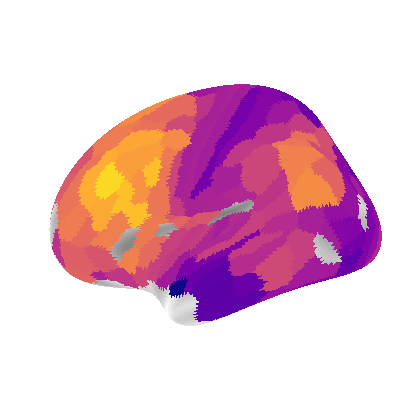

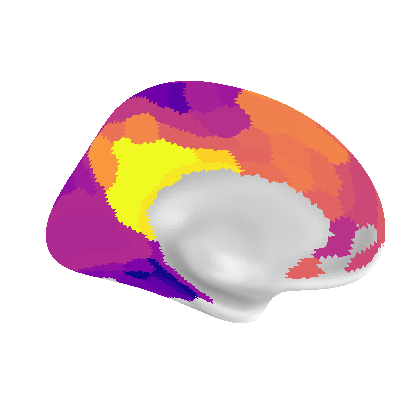

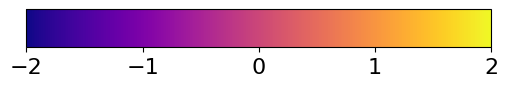

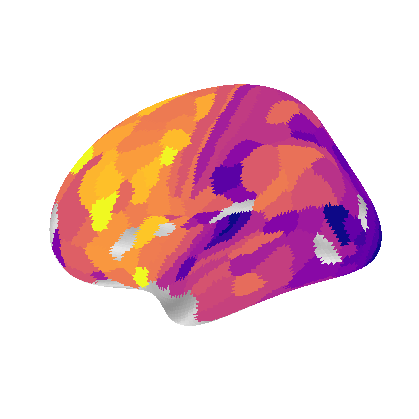

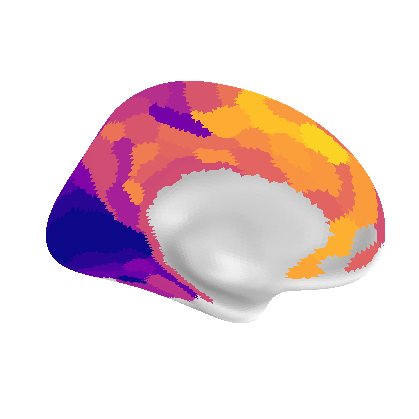

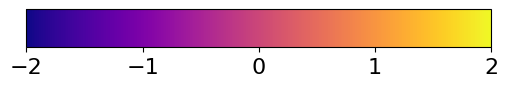

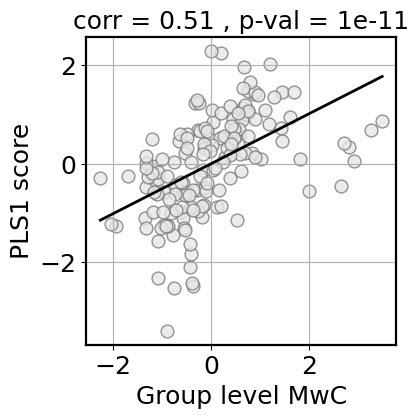

In [18]:
genes = pd.read_csv("../data/external/glasser_expression.csv" )


gene_names = genes.columns[0:]
CMAP = 'plasma'
nregs_lh = 167
limb_ind_l = np.array([88, 90, 92, 93, 110, 118, 120, 122, 131, 135, 165, 166, 172])-1


gene_exp_l = genes.to_numpy()[:180 , :]
gene_exp_l = np.delete(gene_exp_l , limb_ind_l , axis = 0)

rows_with_nan = np.any(np.isnan(gene_exp_l), axis=1)
rows_with_nan_ind = [i for i, val in enumerate(rows_with_nan) if val]
allgenes_expression = pd.read_csv("../data/external/glasser_expression.csv" )

#rows_with_nan_ind  = []

data_avg = DATA_avg
nregs_lh = 167
IC_l = np.array(data_avg.ICallsub_w_avg[:nregs_lh])
IC_l = np.delete(IC_l , rows_with_nan_ind , axis = 0)
IC_l = np.array(IC_l).reshape(-1, 1)


SIZE = 50
#--------------------------------------------------------------------------------------------
#------------------------ IC map  -----------------------------
#-------------------------------------------------------------------------------------------- 
CMAP = 'plasma'
gene_exp_l = genes.to_numpy()[:180 , :]
rows_with_nan = np.any(np.isnan(gene_exp_l), axis=1)
rows_with_nan_ind = [i for i, val in enumerate(rows_with_nan) if val]


data_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[180:] = False
mask[limb_ind_l] = False
mask[rows_with_nan_ind] = False
ind = ind[mask]
IC_l = zscore(IC_l)
data_allrois[ind] = IC_l

vmax1 = 2
vmin1 = -2

# vmax1 = IC_l.max()
# vmin1 = IC_l.min()

col_fsa = parcel_to_surface(data_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                         
                           hemi='left', vmin= vmin1, vmax = vmax1, view='lateral',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP,colorbar=False)
plt.savefig('../results/Figures/IC_l_lateral_GO.png', dpi=300, bbox_inches='tight')
plt.show()

col_fsa = parcel_to_surface(data_allrois,'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                           
                           hemi='left', vmin= vmin1, vmax = vmax1, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP,colorbar=False)

plt.savefig('../results/Figures/IC_l_medial_GO.png', dpi=300, bbox_inches='tight')
plt.show()

cmap = plt.get_cmap(CMAP)
norm = plt.Normalize(vmin=vmin1, vmax=vmax1)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cb = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

cb.ax.tick_params(labelsize=16)

plt.savefig('../results/Figures/IC_colorbar_GO.png', dpi=300, bbox_inches='tight')
plt.show()
#--------------------------------------------------------------------------------------------
#-------------------------  AHBA genes PLS1 scores  -----------------------------------------
#--------------------------------------------------------------------------------------------

pls1_score = pd.read_csv('../data/external/PLS1_ROIscores.csv', header=None)
pls1_score = np.array(pls1_score).reshape(-1, 1)

pls1_score_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[180:] = False
mask[limb_ind_l] = False
mask[rows_with_nan_ind] = False
ind = ind[mask]
pls1_score = zscore(pls1_score)
pls1_score_allrois[ind] = pls1_score
# vmax1 = pls1_score.max()
# vmin1 = pls1_score.min()

vmax1 = 2
vmin1 = -2
fsaverage = datasets.fetch_surf_fsaverage()
col_fsa = parcel_to_surface(pls1_score_allrois, 'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                      
                       hemi='left', vmin= vmin1, vmax= vmax1, view='lateral',
                       bg_map=fsaverage['sulc_right'], bg_on_data= False,
                       darkness=0.5, cmap=CMAP, colorbar= False)
plt.savefig('../results/Figures/pls1_l_lateral_GO.png', dpi=300, bbox_inches='tight')
plt.show()

plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                       
                       hemi='left', vmin= vmin1, vmax= vmax1, view='medial',
                       bg_map=fsaverage['sulc_left'], bg_on_data=False,
                       darkness=0.5, cmap=CMAP, colorbar= False)

plt.savefig('../results/Figures/pls1_l_medial_GO.png', dpi=300, bbox_inches='tight')
plt.show()

cmap = plt.get_cmap(CMAP)
norm = plt.Normalize(vmin=vmin1, vmax=vmax1)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cb = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

cb.ax.tick_params(labelsize=16)

plt.savefig('../results/Figures/IC_colorbar_GO.png', dpi=300, bbox_inches='tight')
plt.show()
#--------------------------------------------------------------------------------------------
#-------------------------  scatter plot IC and pls1 score ---------------------------------------
#--------------------------------------------------------------------------------------------

IC = IC_l.flatten()
pls1 = pls1_score.flatten()

corr_IC_w_pls1, p_IC_w_pls1 = pcor(IC, pls1 )


fig, ax = plt.subplots(figsize=(4, 4))




sns.regplot(
    x=IC,
    y=pls1,
    scatter_kws={
        'facecolors': "#E6E6E6",
        'edgecolor': '#787B76' ,
        'linewidths': 1, 
        's': 85  
    },
    line_kws={
        'color': '#000000',  
        'lw': 2  
    },
    ci=None  # This removes the confidence interval
)


title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_w_pls1) , float(p_IC_w_pls1))
ax.set_title(title , fontdict={'fontsize': FONT})
plt.xlabel('Group level MwC' , fontsize = FONT)
plt.ylabel('PLS1 score' , fontsize = FONT)
plt.grid(True)


plt.tick_params(axis='both', which='major', labelsize= FONT)  # Increase the tick label font size


ax = plt.gca()  # Get the current Axes instance

# Set the spine linewidth
spine_width = 1.6  # Change this value to your preferred linewidth
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)

plt.savefig('../results/Figures/IC_pls1_GO.png', dpi=300, bbox_inches='tight')
plt.show()



## Fig 4b: Gene enrichment 

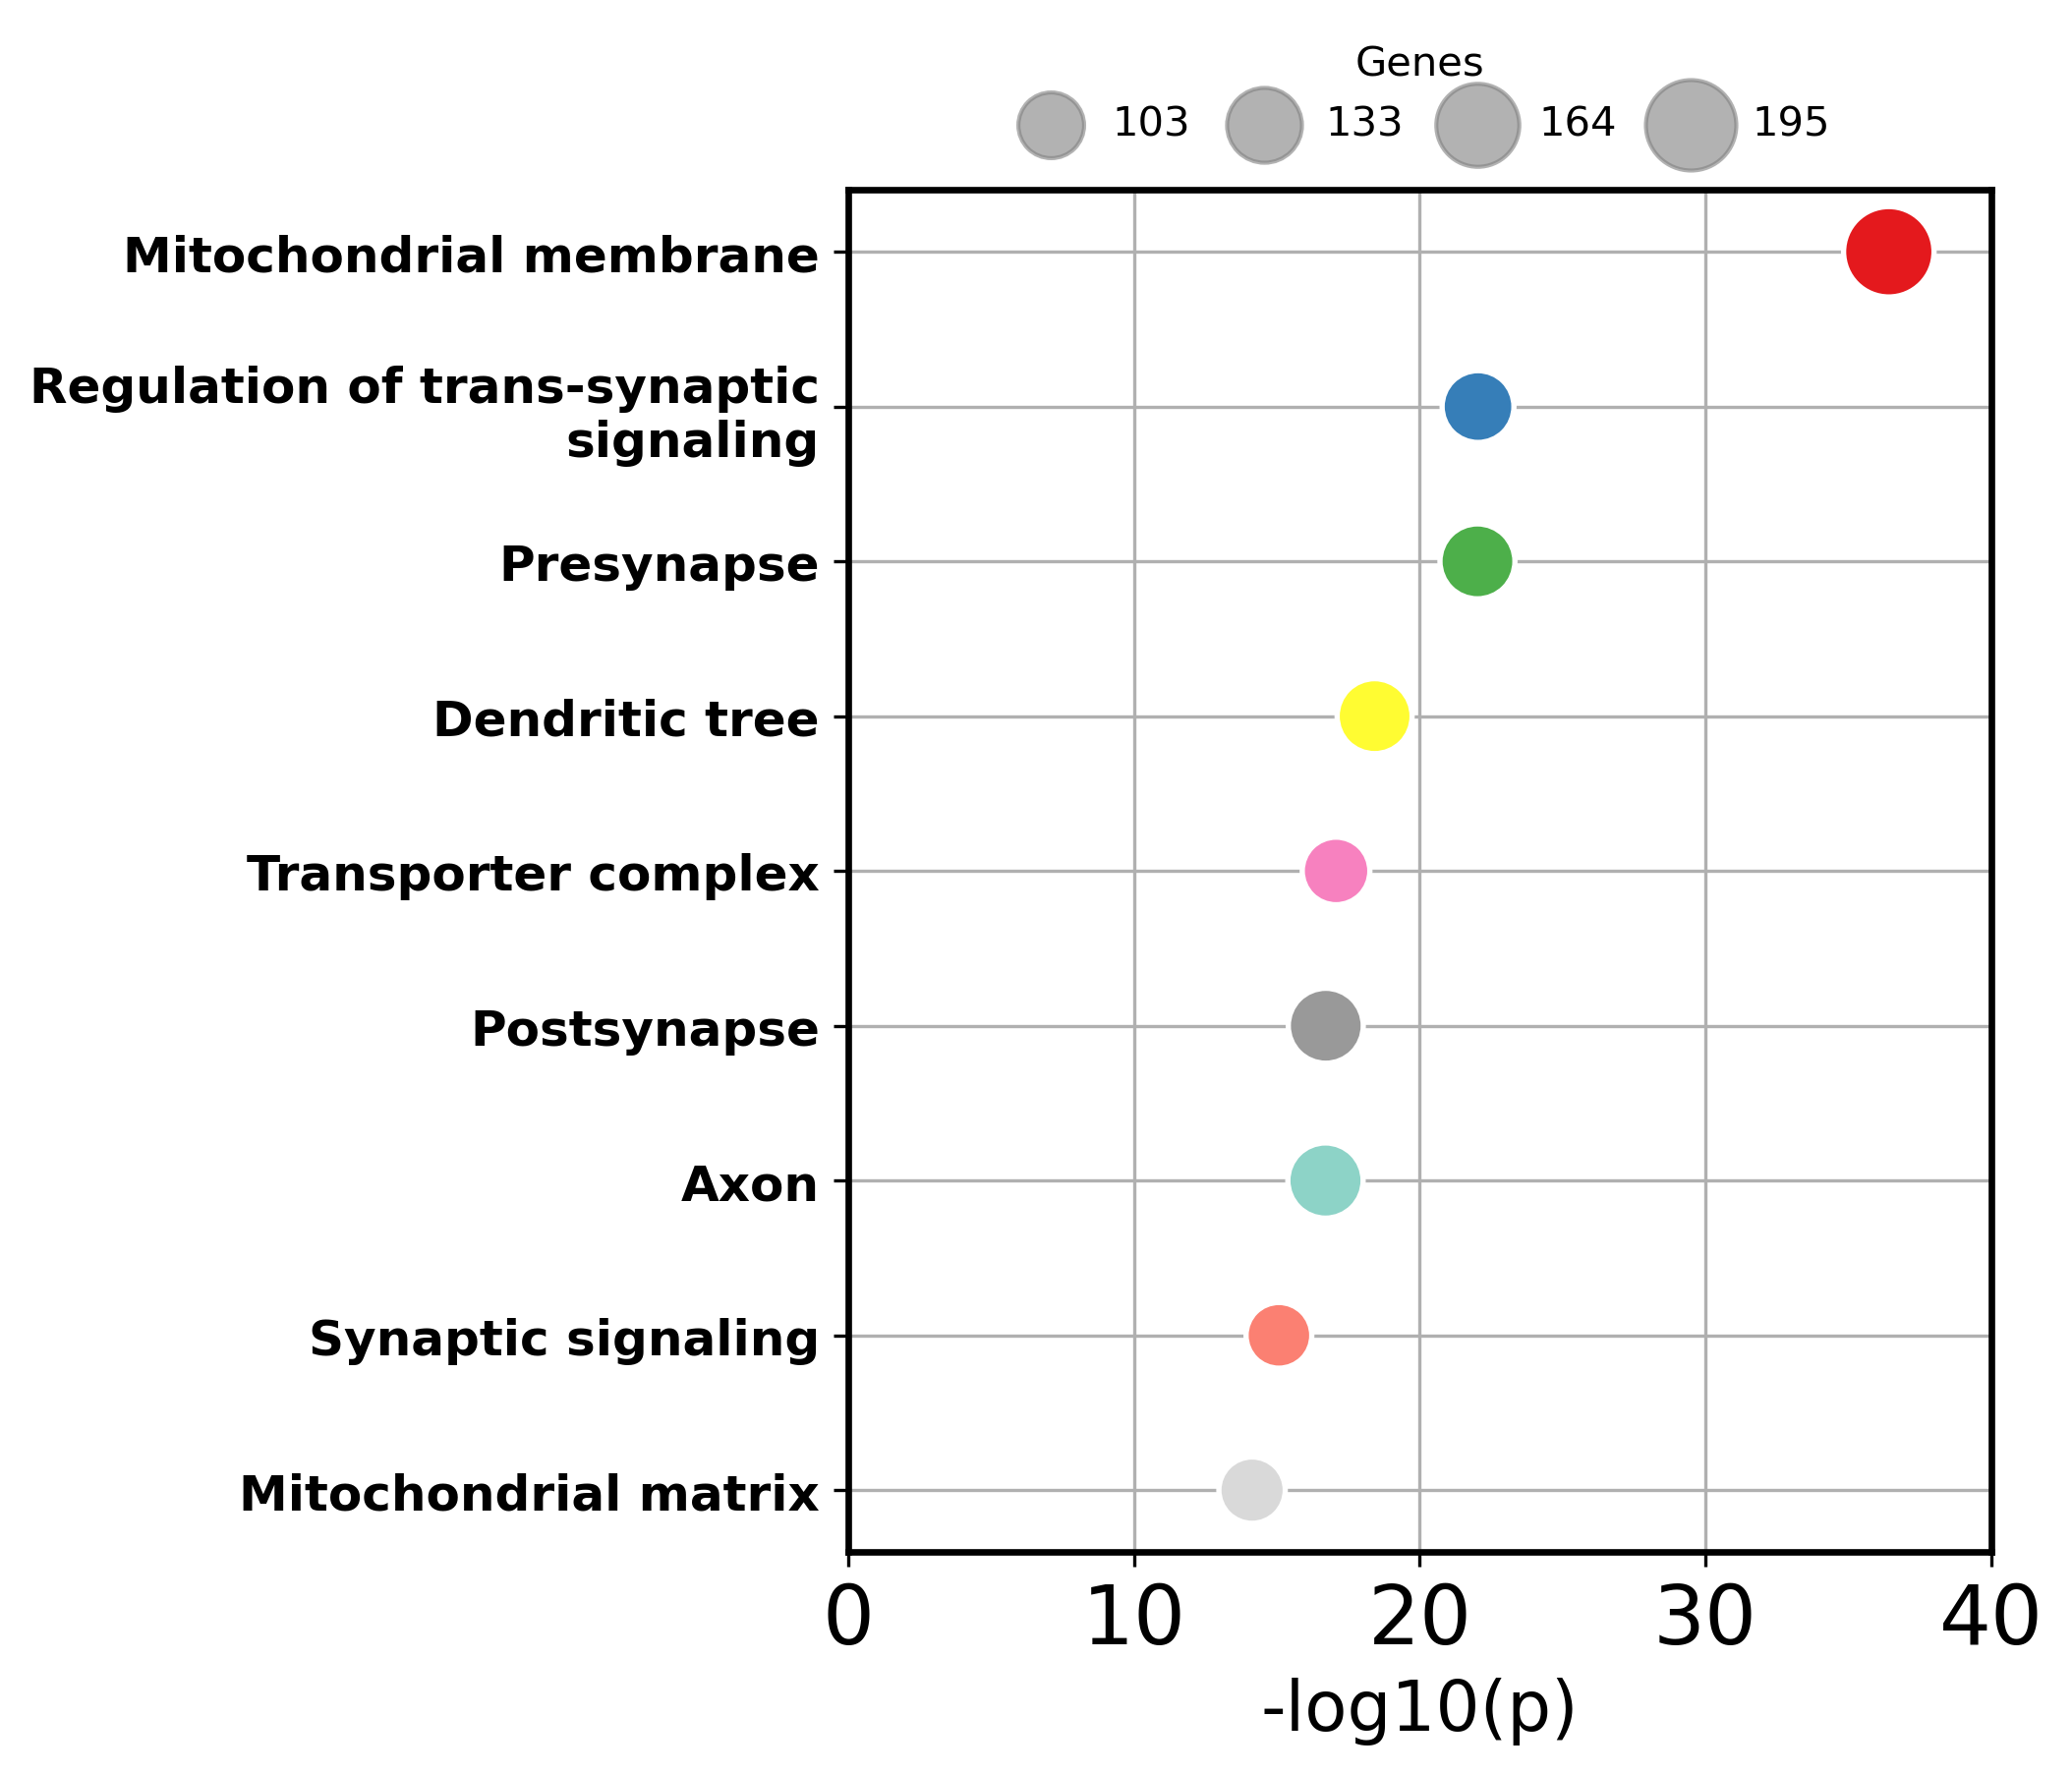

In [121]:
target_strings = ['axon', 'synap', 'example', 'dendritic', 'mito', 'signal'  , 'transporter' , 'carbo']  # Add your specific strings here
FONT = 12
data = pd.read_csv(f'../data/external/metascape_result_summary.csv',  delimiter=';')
pattern = '|'.join(target_strings)

data = data[data['Description'].str.contains(pattern, case=False, na=False)]

data['LogP'] = pd.to_numeric(data['Log10(P)'], errors='coerce')
data['-Log10(P)'] = -data['Log10(P)']
data['Description'] = data['Description'].apply(lambda x: x[0].upper() + x[1:] if pd.notnull(x) and len(x) > 0 else x)
p_values = data['LogP']
num_genes = data['Count']
descriptions = data['Description']


# colors = ['#E4191D', '#367EB8', '#4DAF4A','#984EA3','#FF7F00','#FFFC32','#A65628','#F781BF','#999999','#8DD3C7',
#           '#FFFEB3','#BEBADA','#FB8072','#80B1D3','#FDB562','#B4DE69','#FCCCE4','#D9D9D9','#BC80BD','#CCEBC5']  # Add your desired colors here

colors = ['#E4191D', '#367EB8', '#4DAF4A','#FFFC32','#F781BF','#999999','#8DD3C7','#FB8072','#D9D9D9']  # Add your desired colors here

target_strings = ['axon', 'synap', 'example', 'dendritic', 'mito', 'signal' , 'transporter' , 'carbo']  # Add your specific strings here


# plt.figure(figsize=(4, 8))
# g = sns.scatterplot(x="-Log10(P)", y="Description", size="Count", hue="Description",
#                     sizes=(72*2.5, 141*2.5), palette=colors, alpha=1, data=data)



DPI = 300
min_count = data['Count'].min()
max_count = data['Count'].max()
sizes = (min_count*2.5, max_count*2.5)

start = min_count * 2.5
end = max_count * 2.5
step_size = (end - start) / 3
representative_sizes = [start, start + step_size, start + 2 * step_size, end]



plt.figure(figsize=(5, 6), dpi=DPI)

ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(True)

g = sns.scatterplot(
    x='-Log10(P)',
    y='Description',
    size='Count',
    hue='Description',
    sizes=(start, end),
    palette=colors,
    alpha=1,
    data=data
)

# Remove seaborn’s legend
g.get_legend().remove()

# Wrap long descriptions onto multiple lines
y_labels = [textwrap.fill(desc, 30) for desc in data['Description']]
plt.yticks(range(len(y_labels)), y_labels, fontsize=FONT, fontweight='bold')

plt.xlabel('-log10(p)', fontsize=FONT+5)
plt.ylabel('', fontsize=FONT)
ax.set_axisbelow(True)

plt.xlim([0, 40])

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.6)

# --- Inset legend above the plotting rectangle ----------
legend_ax = ax.inset_axes([0, 1.03, 1, 0.08], transform=ax.transAxes)
legend_ax.axis('off')
legend_ax.set_zorder(10)


for size in representative_sizes:
    legend_ax.scatter([], [], s=size, color='grey', alpha=0.6,
                      label=f'{int(size/2.5)}', zorder=11)

# Single legend call, centered in the inset, with smaller text
legend = legend_ax.legend(
    title="Genes",
    loc='center',
    bbox_to_anchor=(0.5, 0.5),
    ncol=len(representative_sizes),
    columnspacing=0.8,
    handletextpad=0.5,
    frameon=False,
    prop={'size': FONT-2}
)
legend.set_title("Genes", prop={'size': FONT-2})
legend._legend_box.align = "center"

# --- Save and show ----------
plt.savefig('../results/Figures/Gene_enrichment.png', dpi=300, bbox_inches='tight')
plt.show()


## Fig 4c: synaptic density

<Figure size 1500x1500 with 0 Axes>

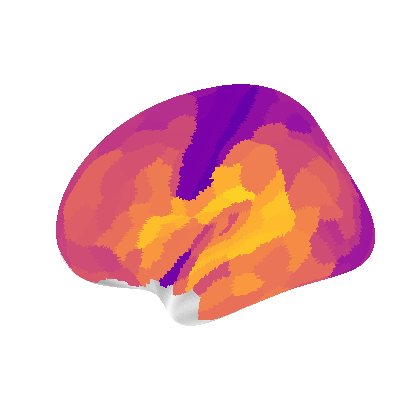

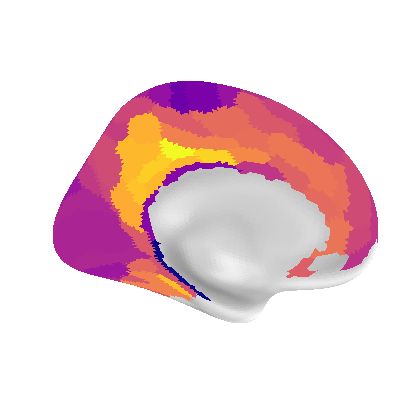

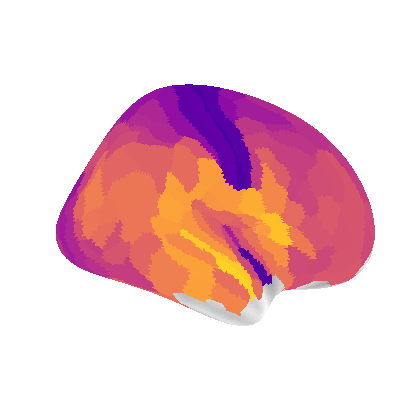

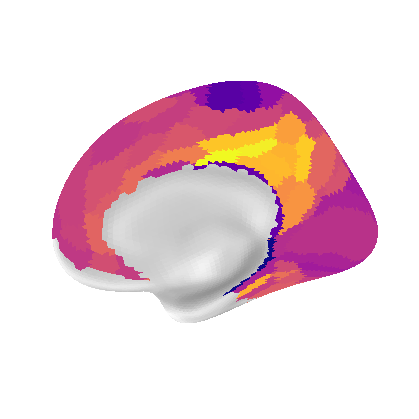

<Figure size 640x480 with 0 Axes>

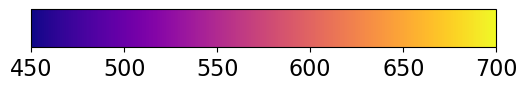

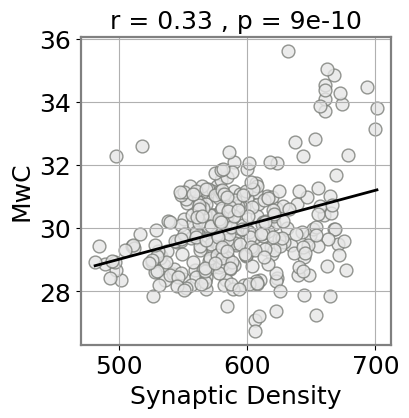

In [123]:

mmp_in_mni_6 = f'../data/external/mmp_in_mni_6.nii.gz'
atlas_mni6 = nib.load(mmp_in_mni_6)
atlas_data_mni6 = atlas_mni6.get_fdata()

Bmax_mean_mni_img = nib.load(f'../data/external/Bmax.mean.MNI152.sm5.nii.gz')
Bmax_mean_mni_data  = Bmax_mean_mni_img.get_fdata()


region_labels = np.unique(atlas_data_mni6)
region_labels = region_labels[region_labels > 0]
thr = 0.001

n_regions = len(region_labels)
syn_values = np.zeros(n_regions)


for i, label in enumerate(region_labels):
    
    region_mask = atlas_data_mni6 == label

    region_vals_syn = Bmax_mean_mni_data[region_mask]
    #syn_values[i] = np.median(region_vals_syn)
    syn_values[i] = np.nanmedian(region_vals_syn[region_vals_syn > thr])

syn_values = np.delete(syn_values, limb_ind , axis = 0)


CMAP_IC = 'plasma'

# IC = np.array(DATA_avg.ICallsub_w_avg).reshape(-1, 1)
# V_min = 27
# V_max = 34

IC = np.array(syn_values).reshape(-1, 1)
V_min = 450
V_max = 700

IC_allrois = np.zeros((360,1))
ind = np.arange(360)
mask = np.ones(ind.shape , dtype = bool)
mask[limb_ind] = False
ind = ind[mask]
IC_allrois[ind] = np.abs(IC)


fig = plt.figure(figsize=(5, 5),dpi=300)

fsaverage = datasets.fetch_surf_fsaverage()



col_fsa = parcel_to_surface(IC_allrois,'glasser_360_fsa5') 
col_fsa[col_fsa == 0] = np.nan
col_fsa = np.where(np.isnan(col_fsa), np.nan, np.clip(col_fsa, V_min, V_max))

plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                        
                           hemi='left', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_left'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_IC,colorbar=False)
plt.savefig('../results/Figures/synaptic_den_l_lateral.png', dpi=300, bbox_inches='tight')
plt.show()

 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map = col_fsa[:int(col_fsa.shape[0]/2)],
                           
                           hemi='left', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_left'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_IC,colorbar=False)
plt.savefig('../results/Figures/synaptic_den_l_medial.png', dpi=300, bbox_inches='tight')
plt.show()



plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                           
                           hemi='right', vmin= V_min, vmax = V_max, view='lateral',
                           bg_map=fsaverage['sulc_right'], bg_on_data=False,
                           darkness=0.5, cmap=CMAP_IC,colorbar=False)
plt.savefig('../results/Figures/synaptic_den_r_lateral.png', dpi=300, bbox_inches='tight')
plt.show()


plotting.plot_surf_roi(fsaverage['infl_right'], roi_map = col_fsa[int(col_fsa.shape[0]/2):],
                           
                           hemi='right', vmin= V_min, vmax = V_max, view='medial',
                           bg_map=fsaverage['sulc_right'], bg_on_data = False,
                           darkness=0.5,cmap=CMAP_IC,colorbar=False)
plt.savefig('../results/Figures/synaptic_den_r_medial.png', dpi=300, bbox_inches='tight')
plt.show()

ticks = np.linspace(V_min, V_max, 6)  
norm = plt.Normalize(vmin= V_min, vmax = V_max)
sm = plt.cm.ScalarMappable(cmap=CMAP, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax, ticks=ticks, orientation='horizontal', pad=0.0001, shrink=0.6)


cmap = plt.get_cmap(CMAP_IC)
norm = plt.Normalize(vmin=V_min, vmax=V_max)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cb = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

cb.ax.tick_params(labelsize=16)
plt.savefig('../results/Figures/synaptic_den_colorbar.png', dpi=300, bbox_inches='tight')
plt.show()


#==================================================================
#==================================================================

ind = []
ind = syn_values>400

data = pd.DataFrame({'IC':DATA_avg.ICallsub_w_avg[ind],'syn':syn_values[ind],
                   'pet':DATA_avg.pet_avg[ind], 'deg':DATA_avg.degallsub_w_avg[ind], 'net':net_label['yeo_7_nw'][ind]})

metric = 'IC'



r, p = pearsonr(data['syn'], data[metric])


fig, ax = plt.subplots(figsize=(4,4))

FONT = 18


sns.regplot(
    data = data,
    x= 'syn',
    y= 'IC',
    scatter_kws={
        'facecolors': "#E6E6E6",
        'edgecolor': '#787B76' ,
        'linewidths': 1, 
        's': 85  
    },
    line_kws={
        'color': '#000000',  
        'lw': 2  
    },
    ci=None  # This removes the confidence interval
)


title = "r = {:.2f} , p = {:.0e}".format(float(r) , float(p))
ax.set_title(title , fontdict={'fontsize': FONT})
plt.xlabel('Synaptic Density' , fontsize = FONT)
plt.ylabel('MwC' , fontsize = FONT)
plt.grid(True)


plt.tick_params(axis='both', which='major', labelsize= FONT)  # Increase the tick label font size


ax = plt.gca()  # Get the current Axes instance

# Set the spine linewidth
spine_width = 1.6  # Change this value to your preferred linewidth
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_edgecolor("gray")

plt.savefig('../results/Figures/IC_synaptic_den_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


## Fig 4d: KEGG and beta amyloid

                                               term       p-value  \
0                         Oxidative phosphorylation  2.539531e-12   
1                           Diabetic cardiomyopathy  2.549601e-10   
2                     Pathways of neurodegeneration  6.103960e-10   
3                                Huntington disease  2.279454e-09   
4                                 Parkinson disease  5.173942e-09   
..                                              ...           ...   
68                          Hippo signaling pathway  4.190033e-02   
69  Kaposi sarcoma-associated herpesvirus infection  4.511377e-02   
70                              Platelet activation  4.518329e-02   
71                                      Endocytosis  4.553793e-02   
72   Growth hormone synthesis, secretion and action  4.780299e-02   

         q-value  
0   7.999523e-10  
1   4.015622e-08  
2   6.409158e-08  
3   1.795070e-07  
4   2.955894e-07  
..           ...  
68  1.912841e-01  
69  1.992284e-01  


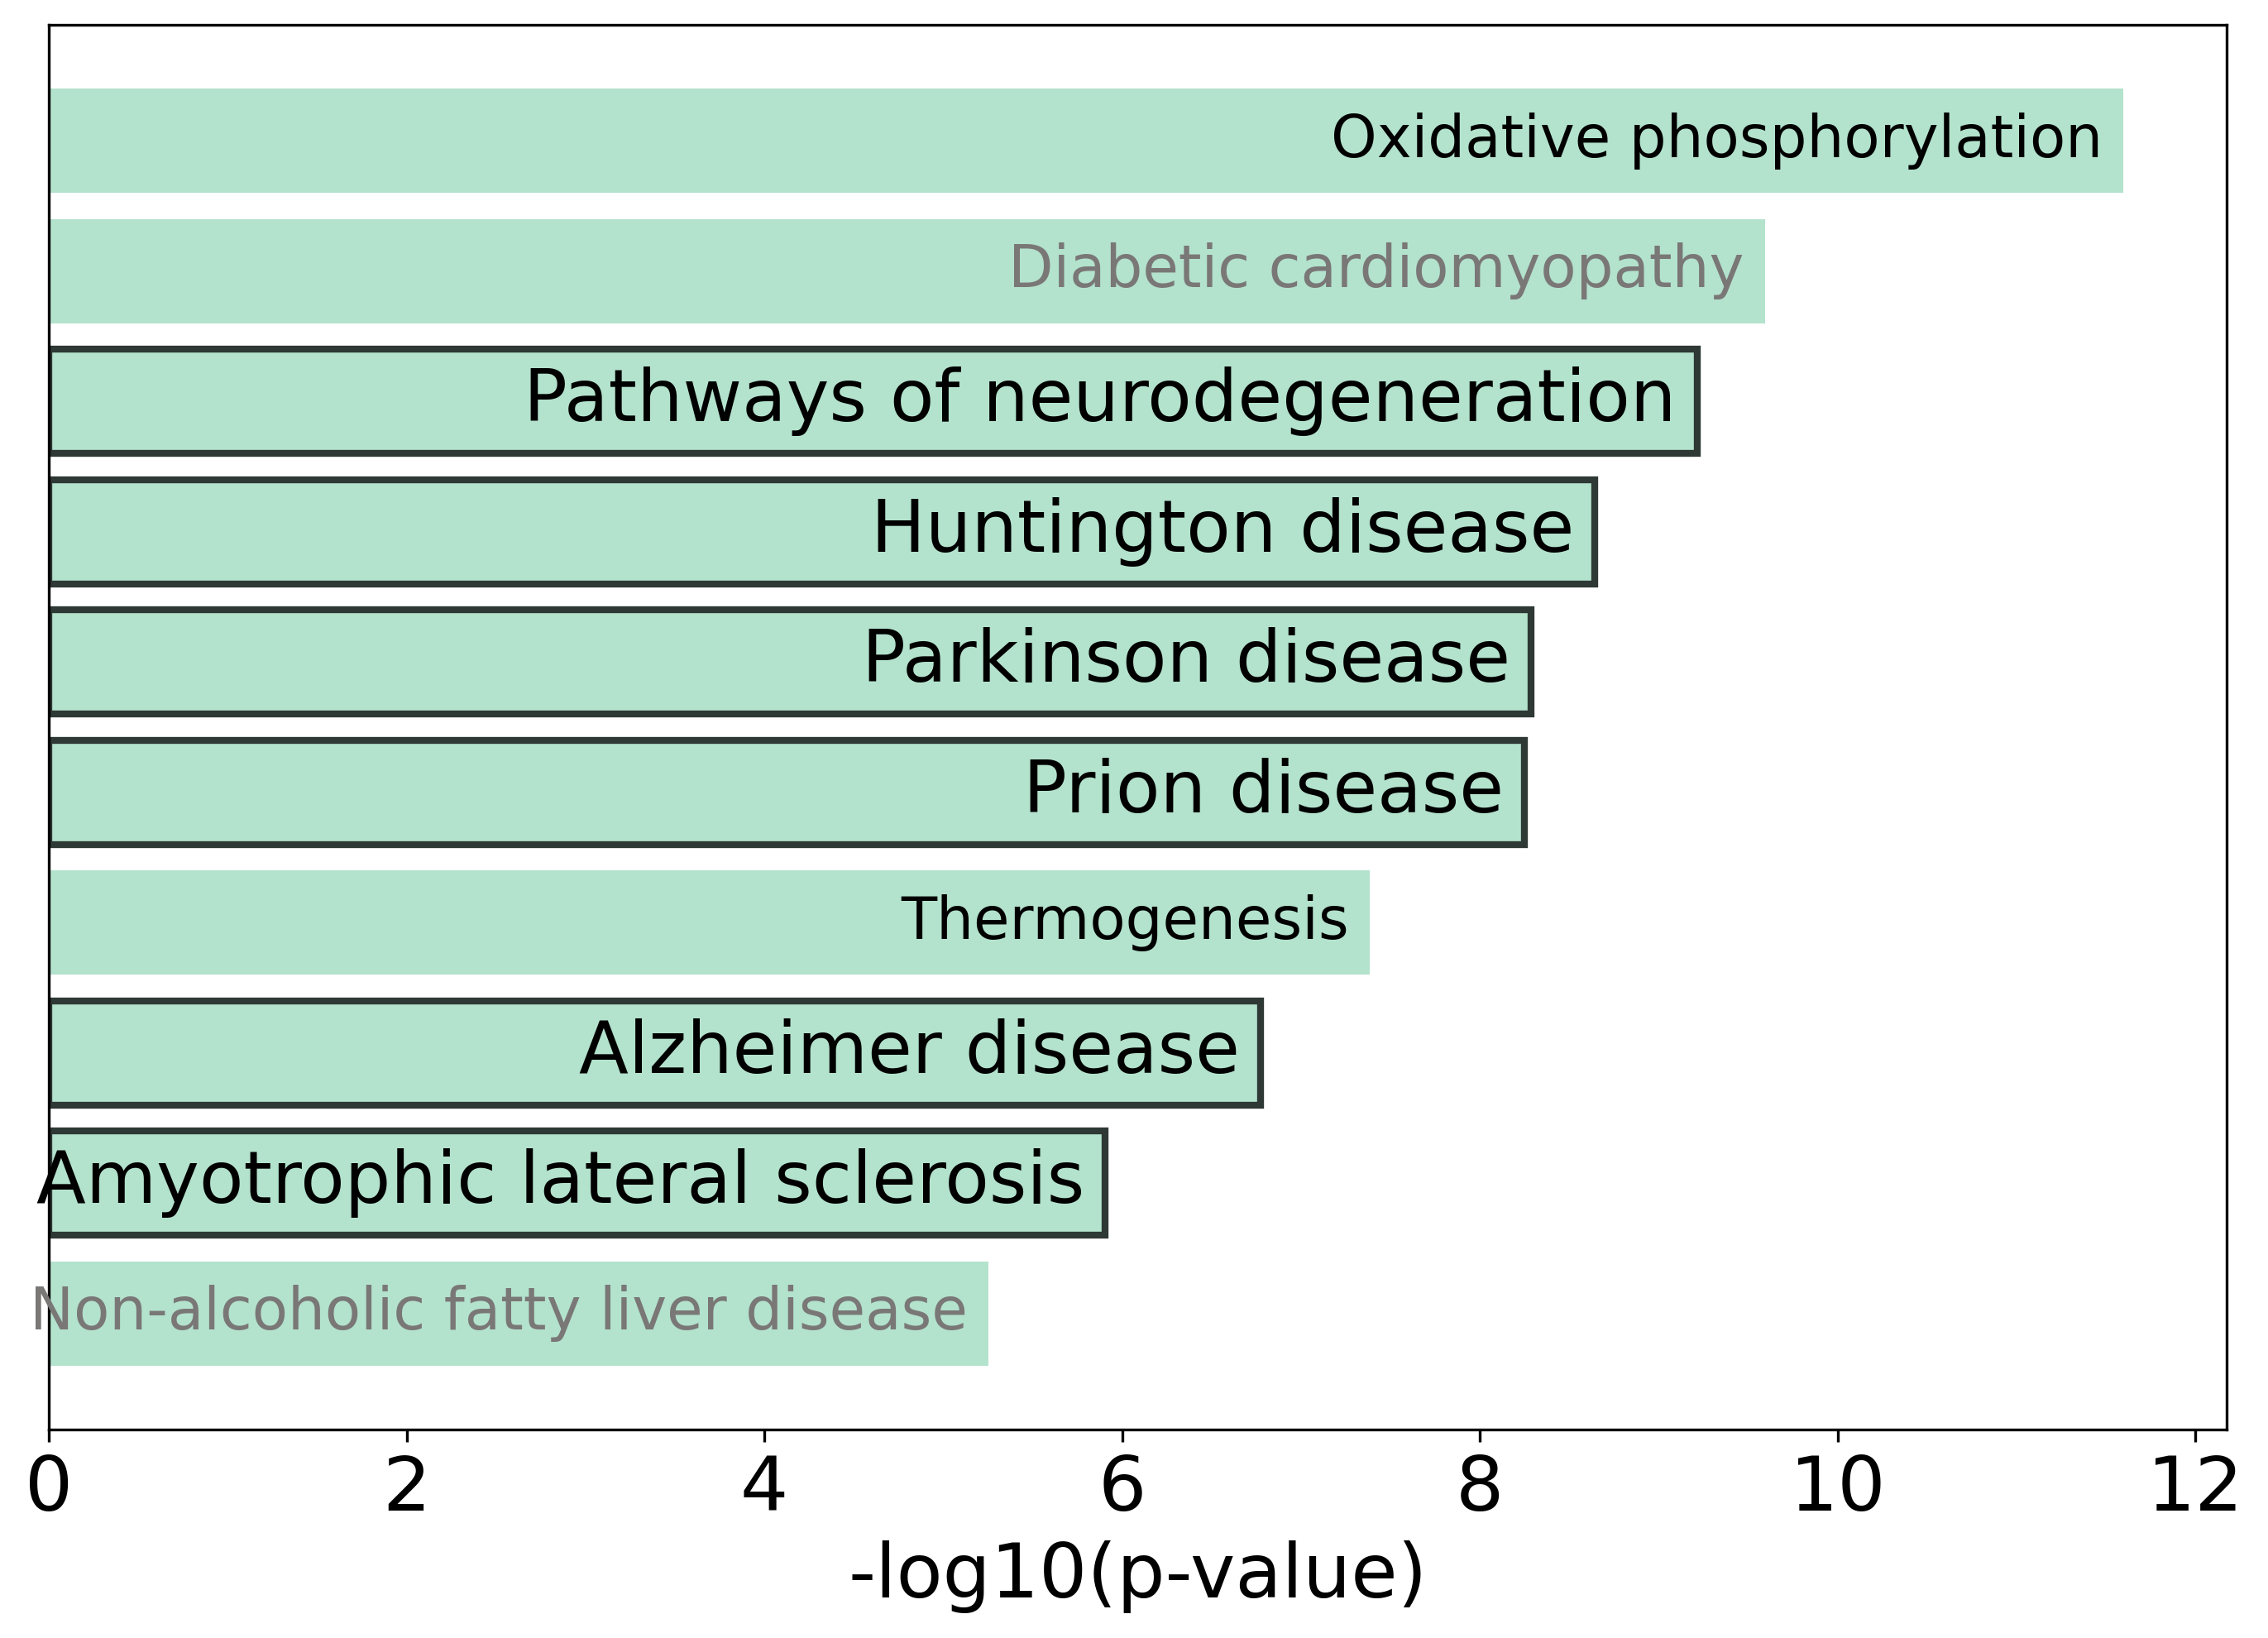

76.00736842105263 7.428851892669101 41 54
(95, 360)
Correlation coefficient: 0.4078383910641558
P-value: 8.111702944909391e-15


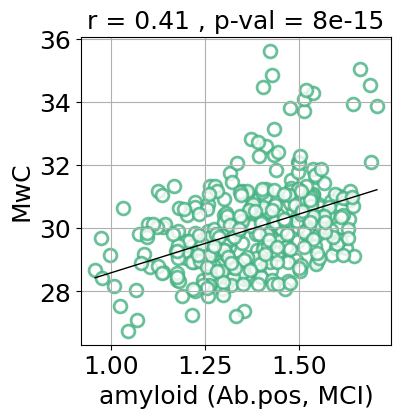

75.45426356589147 7.599459464171601 83 46
(129, 360)
Correlation coefficient: 0.3121311364511986
P-value: 5.566163126455537e-09


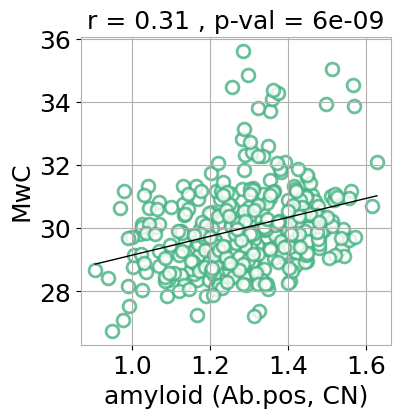

In [125]:
data = pd.read_csv(f'../data/external/Enrichment_Analysis_Visualizer_data_KEGG_enrichr.csv')
print(data)

brain_terms = ['Oxidative phosphorylation','Pathways of neurodegeneration','Huntington disease',
'Parkinson disease','Prion disease','Thermogenesis','Alzheimer disease','Amyotrophic lateral sclerosis']
neurodegen_terms = ['Pathways of neurodegeneration','Huntington disease',
'Parkinson disease','Prion disease','Alzheimer disease','Amyotrophic lateral sclerosis']


subset_data = data.head(10)
subset_data = subset_data.iloc[::-1].reset_index(drop=True)


subset_data['NegLog10P'] = -np.log10(subset_data['p-value'])



plt.figure(figsize=(10, 7), dpi = 300)


bars = plt.barh(subset_data['term'], subset_data['NegLog10P'], color='#B3E2CD')


plt.yticks([])  

gray = '#7A7777'
dark_gray = '#68686A'
black = 'black'
for bar, term, value in zip(bars, subset_data['term'], subset_data['p-value']):


    if term in neurodegen_terms:
        bar.set_edgecolor("#2E3834")
        bar.set_linewidth(2)   # adjust thickness as you like
    else:
        bar.set_edgecolor("none")  # keep others without border

    text_color = black if term in brain_terms else gray
    fontweight = 550 if term in neurodegen_terms else 'normal' 
    Font = 21 if term in neurodegen_terms else 17
    plt.text(bar.get_width() - (0.01 * max(subset_data['NegLog10P'])), bar.get_y() + bar.get_height() / 2,
             term, va='center', ha='right', color=text_color, fontsize=Font)
    
   


    
plt.xlabel('-log10(p-value)' , fontsize = FONT+4)
plt.xticks(fontsize=FONT+4)

plt.tight_layout()  
spine_width = 1.6  # Change this value to your preferred linewidth
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
plt.savefig('../results/Figures/KEGG.png', dpi=300, bbox_inches='tight') 
plt.show()


#--------------------------------------------------------------------------------------------
#----------------------         beta-amyloid       -----------------------------------
#-------------------------------------------------------------------------------------------- 
roi_label = pd.read_csv("../data/external/hcp_mmp10_yeo7_modes.csv", delimiter = ';' )

roi_label['ROI_Name'] = roi_label['ROI_Name'].str.replace(r'^R_', 'r', regex=True) \
                                                    .str.replace(r'^L_', 'l', regex=True) \
                                                    .str.replace(r'_ROI$', '', regex=True)

roi_label['ROI_Name'] = roi_label['ROI_Name'].str.replace('-', '.', regex=False)

limb_labels = roi_label.loc[roi_label['ROI_Number'].isin(limb_ind+1), 'ROI_Name']


ad_data = pd.read_csv("../data/external/ADNI_amyloid_tau_PET_MMP1.csv")
ad_data = ad_data.drop_duplicates(subset='ID', keep='first') ## keep the first occurance



centrality ='MwC' # it can be DC or MCC
amyloid_status = 'Ab.pos' # it can be Ab.neg, Ab.pos
DX = 'MCI' #it can be MCI, CN, Dementia
tracer = 'amyloid' #it can be amyloid or tau


if centrality == "MwC":
    IC =  DATA_avg.ICallsub_w_avg
    
else:
    
    IC =  DATA_avg_pr.degallsub_w_avg



mci_amyloid = ad_data[(ad_data['DX'] == DX) & (ad_data['amyloid_status'] == amyloid_status)]
demo = mci_amyloid[['age','sex']]
mean = np.mean(demo['age'])
std = np.std(demo['age'])
fem_num = len(demo[demo['sex']=='female'])
mal_num = len(demo[demo['sex']== 'male'])

print(mean, std, fem_num, mal_num)
ad_amyloid = mci_amyloid.filter(like = tracer + ".SUVR.MMP1" )

print(ad_amyloid.shape)
ad_amyloid_avg = ad_amyloid.mean(axis=0)



ad_amyloid_avg_reset = ad_amyloid_avg.reset_index()
ad_amyloid_avg_reset.columns = ['label', 'value']
ad_amyloid_avg_reset['label'] = ad_amyloid_avg_reset['label'].str.replace(r'.*\.l', 'l', regex=True).str.replace(r'.*\.r', 'r', regex=True)
ad_amyloid_avg_sorted = ad_amyloid_avg_reset.sort_values(by='label', key=lambda col: col.str.startswith('r'))
labels_to_remove = limb_labels
ad_amyloid_avg_sorted = ad_amyloid_avg_sorted[~ad_amyloid_avg_sorted['label'].isin(labels_to_remove)]
ad_amyloid_avg_sorted = ad_amyloid_avg_sorted.reset_index(drop=True)



roi = roi_label["ROI_Name"]
roi = roi.drop(limb_ind, axis = 0)
roi = roi.reset_index(drop = True)
IC_label = pd.DataFrame({"IC": IC, "label": roi})
IC_label['label'] = IC_label['label'].str.replace(r'(.*)_L$', r'l\1', regex=True).str.replace(r'(.*)_R$', r'r\1', regex=True)



ad_amyloid_avg_sorted_aligned = ad_amyloid_avg_sorted.set_index('label')
IC_label_aligned = IC_label.set_index('label')
ad_amyloid_avg_aligned = ad_amyloid_avg_sorted_aligned.reindex(IC_label_aligned.index).reset_index()

ad_IC = pd.DataFrame({
    "IC": IC_label["IC"].values,
    "Amyloid": ad_amyloid_avg_aligned["value"].values,
    "label_IC": IC_label["label"].values,
    "label_AD": ad_amyloid_avg_aligned["label"].values, 
    'Network': net_label["yeo_7_nw"]
    
})





corr_ic_ad, p_ic_ad = pcor(ad_IC['IC'], ad_IC['Amyloid'])

print("Correlation coefficient:", corr_ic_ad)
print("P-value:", p_ic_ad)





COLOR = "#8DD084"
plt.figure(figsize=(4,4))
plt.title = plt.gca().set_title
ax = sns.regplot(
    x=ad_IC['Amyloid'],
    y=ad_IC['IC'],
    scatter_kws={
        'facecolors': "#FFFFFF",
        'edgecolor': '#43B180' ,
        'linewidths': 2, 
        's': 85  
    },
    line_kws={
        'color': '#000000',  
        'lw': 1  
    },
    ci=None  # This removes the confidence interval
)

plt.title("r = {:.2f} , p-val = {:.0e}".format(float(corr_ic_ad), float(p_ic_ad)), fontsize=FONT)
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.0001", fontsize=FONT, va='baseline', y=0.8)
#g.fig.suptitle(f"corr = {corr_ic_ad:.2f}, Pval ={p_ic_ad:.5f}", fontsize=FONT, va='baseline', y=0.8)
#g.set_axis_labels('Amyloid', 'MCC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel(tracer + ' (' + amyloid_status + ', ' + DX + ')', fontsize=FONT)
plt.rcParams['axes.edgecolor'] = plt.rcParams['grid.color']
plt.ylabel(centrality, fontsize = FONT)


    
plt.savefig('../results/Figures/IC_bamyloid_MCI.png', dpi=300, bbox_inches='tight') 
plt.show()





centrality ='MwC' # it can be DC or MwC
amyloid_status = 'Ab.pos' # it can be Ab.neg, Ab.pos
DX = 'CN' #it can be MCI, CN, Dementia
tracer = 'amyloid' #it can be amyloid or tau


if centrality == "MwC":
    IC =  DATA_avg.ICallsub_w_avg
    
else:
    
    IC =  DATA_avg_pr.degallsub_w_avg



mci_amyloid = ad_data[(ad_data['DX'] == DX) & (ad_data['amyloid_status'] == amyloid_status)]
demo = mci_amyloid[['age','sex']]
mean = np.mean(demo['age'])
std = np.std(demo['age'])
fem_num = len(demo[demo['sex']=='female'])
mal_num = len(demo[demo['sex']== 'male'])

print(mean, std, fem_num, mal_num)
ad_amyloid = mci_amyloid.filter(like = tracer + ".SUVR.MMP1" )

print(ad_amyloid.shape)
ad_amyloid_avg = ad_amyloid.mean(axis=0)



ad_amyloid_avg_reset = ad_amyloid_avg.reset_index()
ad_amyloid_avg_reset.columns = ['label', 'value']
ad_amyloid_avg_reset['label'] = ad_amyloid_avg_reset['label'].str.replace(r'.*\.l', 'l', regex=True).str.replace(r'.*\.r', 'r', regex=True)
ad_amyloid_avg_sorted = ad_amyloid_avg_reset.sort_values(by='label', key=lambda col: col.str.startswith('r'))
labels_to_remove = limb_labels
ad_amyloid_avg_sorted = ad_amyloid_avg_sorted[~ad_amyloid_avg_sorted['label'].isin(labels_to_remove)]
ad_amyloid_avg_sorted = ad_amyloid_avg_sorted.reset_index(drop=True)



roi = roi_label["ROI_Name"]
roi = roi.drop(limb_ind, axis = 0)
roi = roi.reset_index(drop = True)
IC_label = pd.DataFrame({"IC": IC, "label": roi})
IC_label['label'] = IC_label['label'].str.replace(r'(.*)_L$', r'l\1', regex=True).str.replace(r'(.*)_R$', r'r\1', regex=True)



ad_amyloid_avg_sorted_aligned = ad_amyloid_avg_sorted.set_index('label')
IC_label_aligned = IC_label.set_index('label')
ad_amyloid_avg_aligned = ad_amyloid_avg_sorted_aligned.reindex(IC_label_aligned.index).reset_index()

ad_IC = pd.DataFrame({
    "IC": IC_label["IC"].values,
    "Amyloid": ad_amyloid_avg_aligned["value"].values,
    "label_IC": IC_label["label"].values,
    "label_AD": ad_amyloid_avg_aligned["label"].values, 
    'Network': net_label["yeo_7_nw"]
    
})





corr_ic_ad, p_ic_ad = pcor(ad_IC['IC'], ad_IC['Amyloid'])

print("Correlation coefficient:", corr_ic_ad)
print("P-value:", p_ic_ad)





COLOR = "#8DD084"
plt.figure(figsize=(4,4))
plt.title = plt.gca().set_title
ax = sns.regplot(
    x=ad_IC['Amyloid'],
    y=ad_IC['IC'],
    scatter_kws={
        'facecolors': "#FFFFFF",
        'edgecolor': '#43B180' ,
        'linewidths': 2, 
        's': 85  
    },
    line_kws={
        'color': '#000000',  
        'lw': 1  
    },
    ci=None  # This removes the confidence interval
)

plt.title("r = {:.2f} , p-val = {:.0e}".format(float(corr_ic_ad), float(p_ic_ad)), fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel(tracer + ' (' + amyloid_status + ', ' + DX + ')', fontsize=FONT)
plt.rcParams['axes.edgecolor'] = plt.rcParams['grid.color']
plt.ylabel(centrality, fontsize = FONT)


    
plt.savefig('../results/Figures/IC_bamyloid_CN.png', dpi=300, bbox_inches='tight') 
plt.show()




## Fig S1: hub details

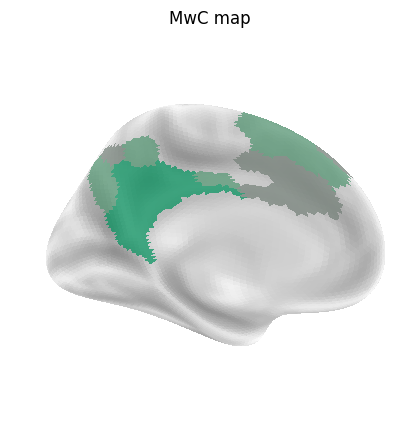

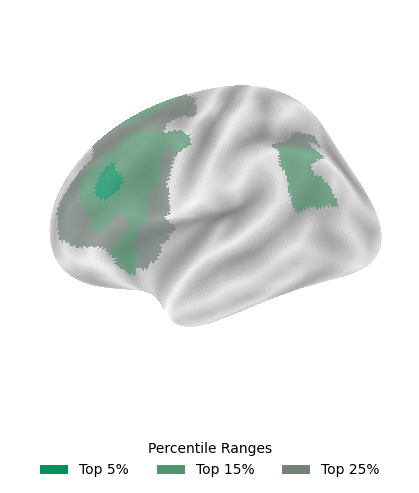

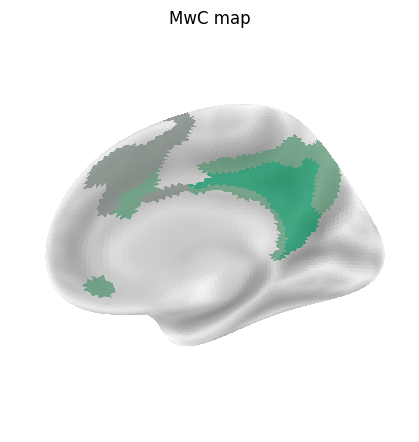

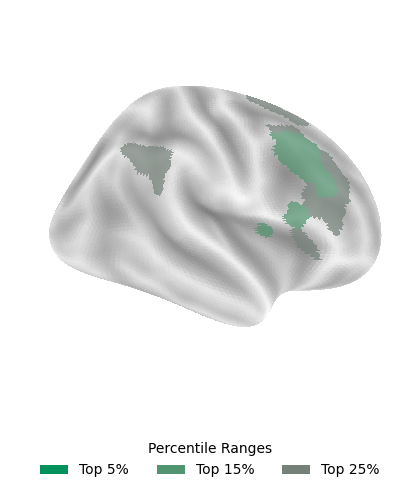

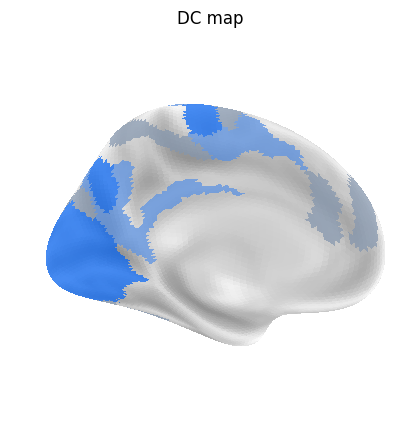

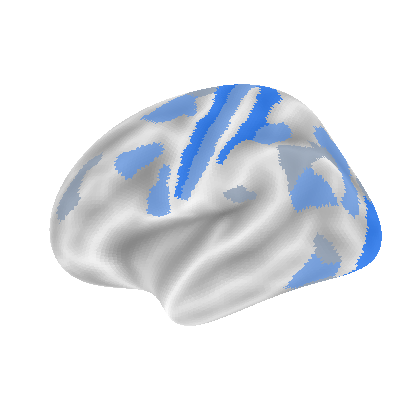

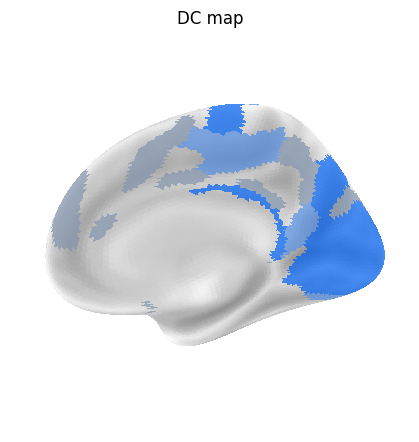

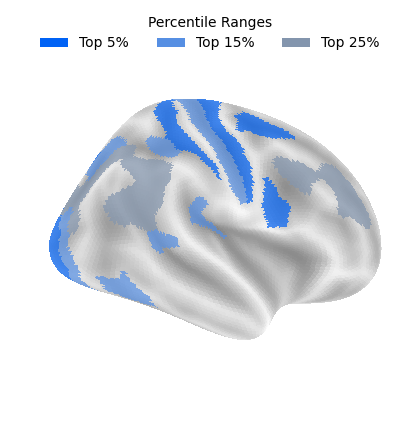

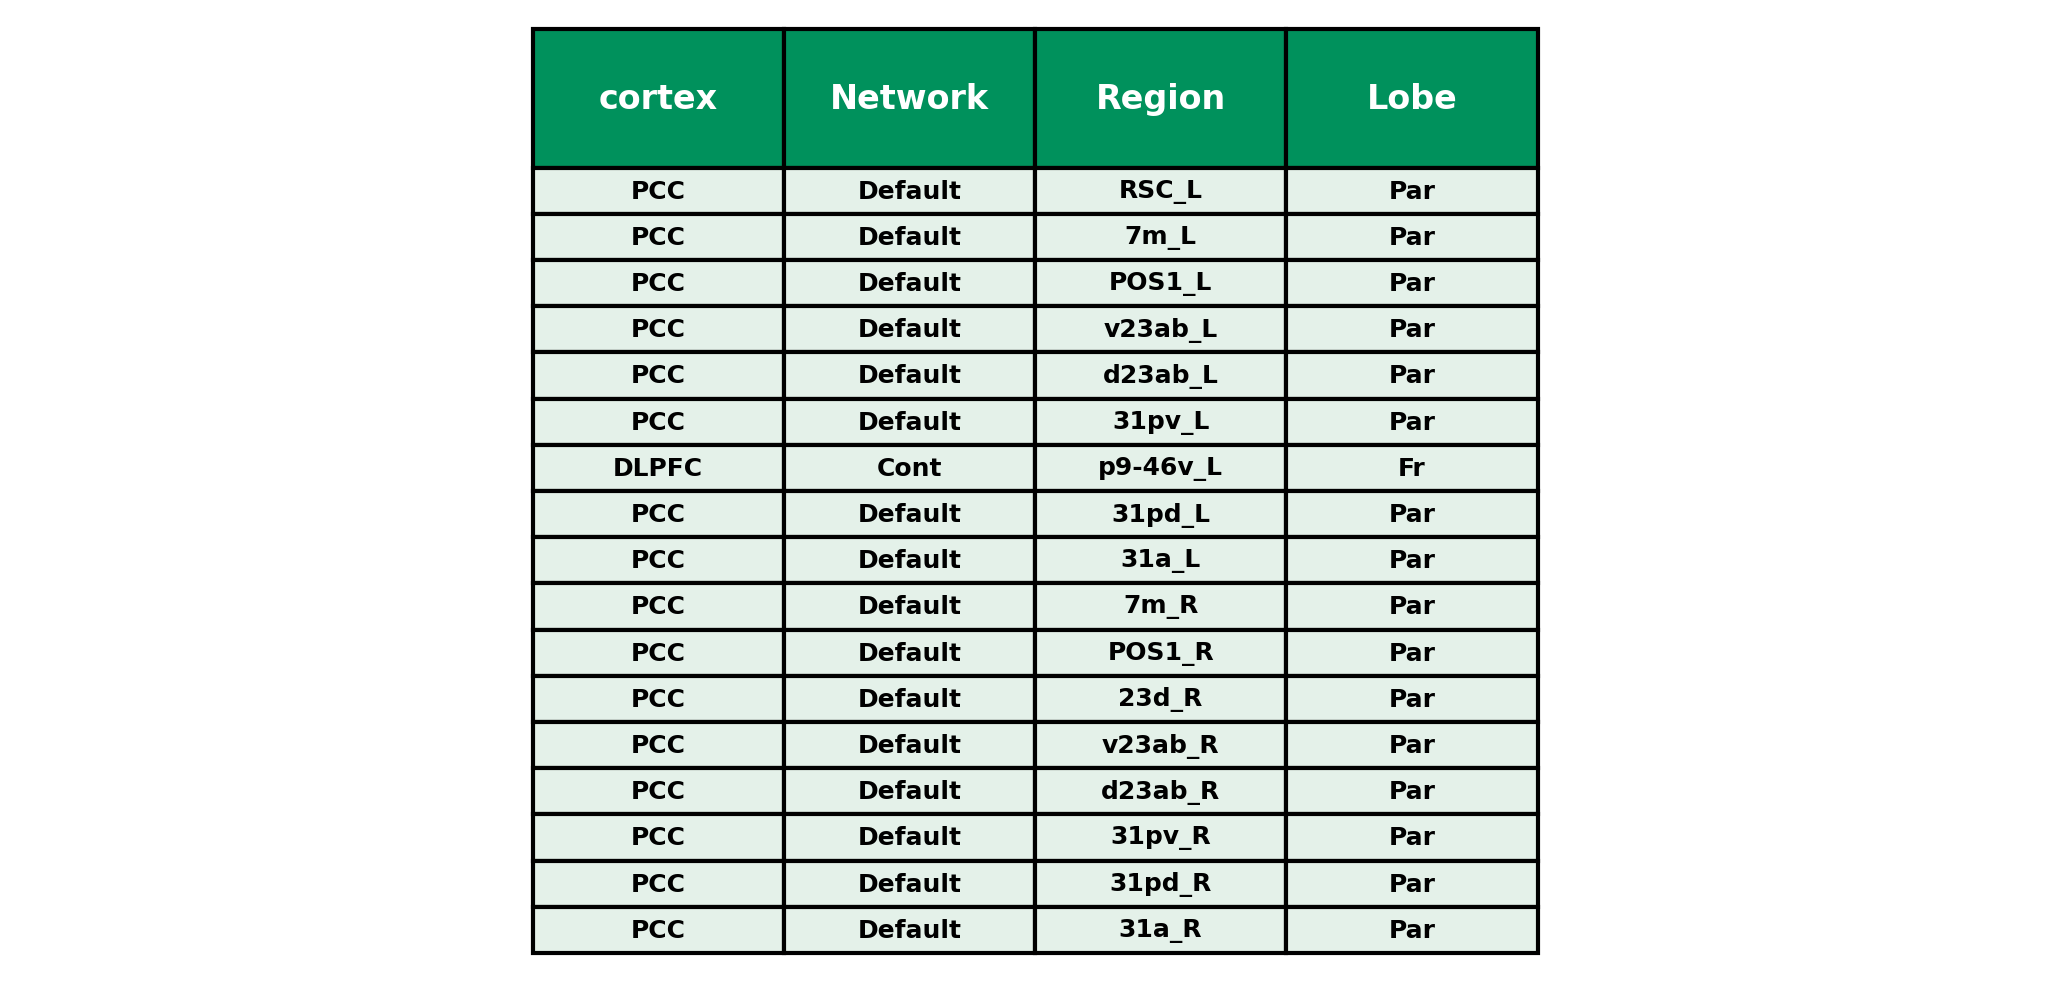

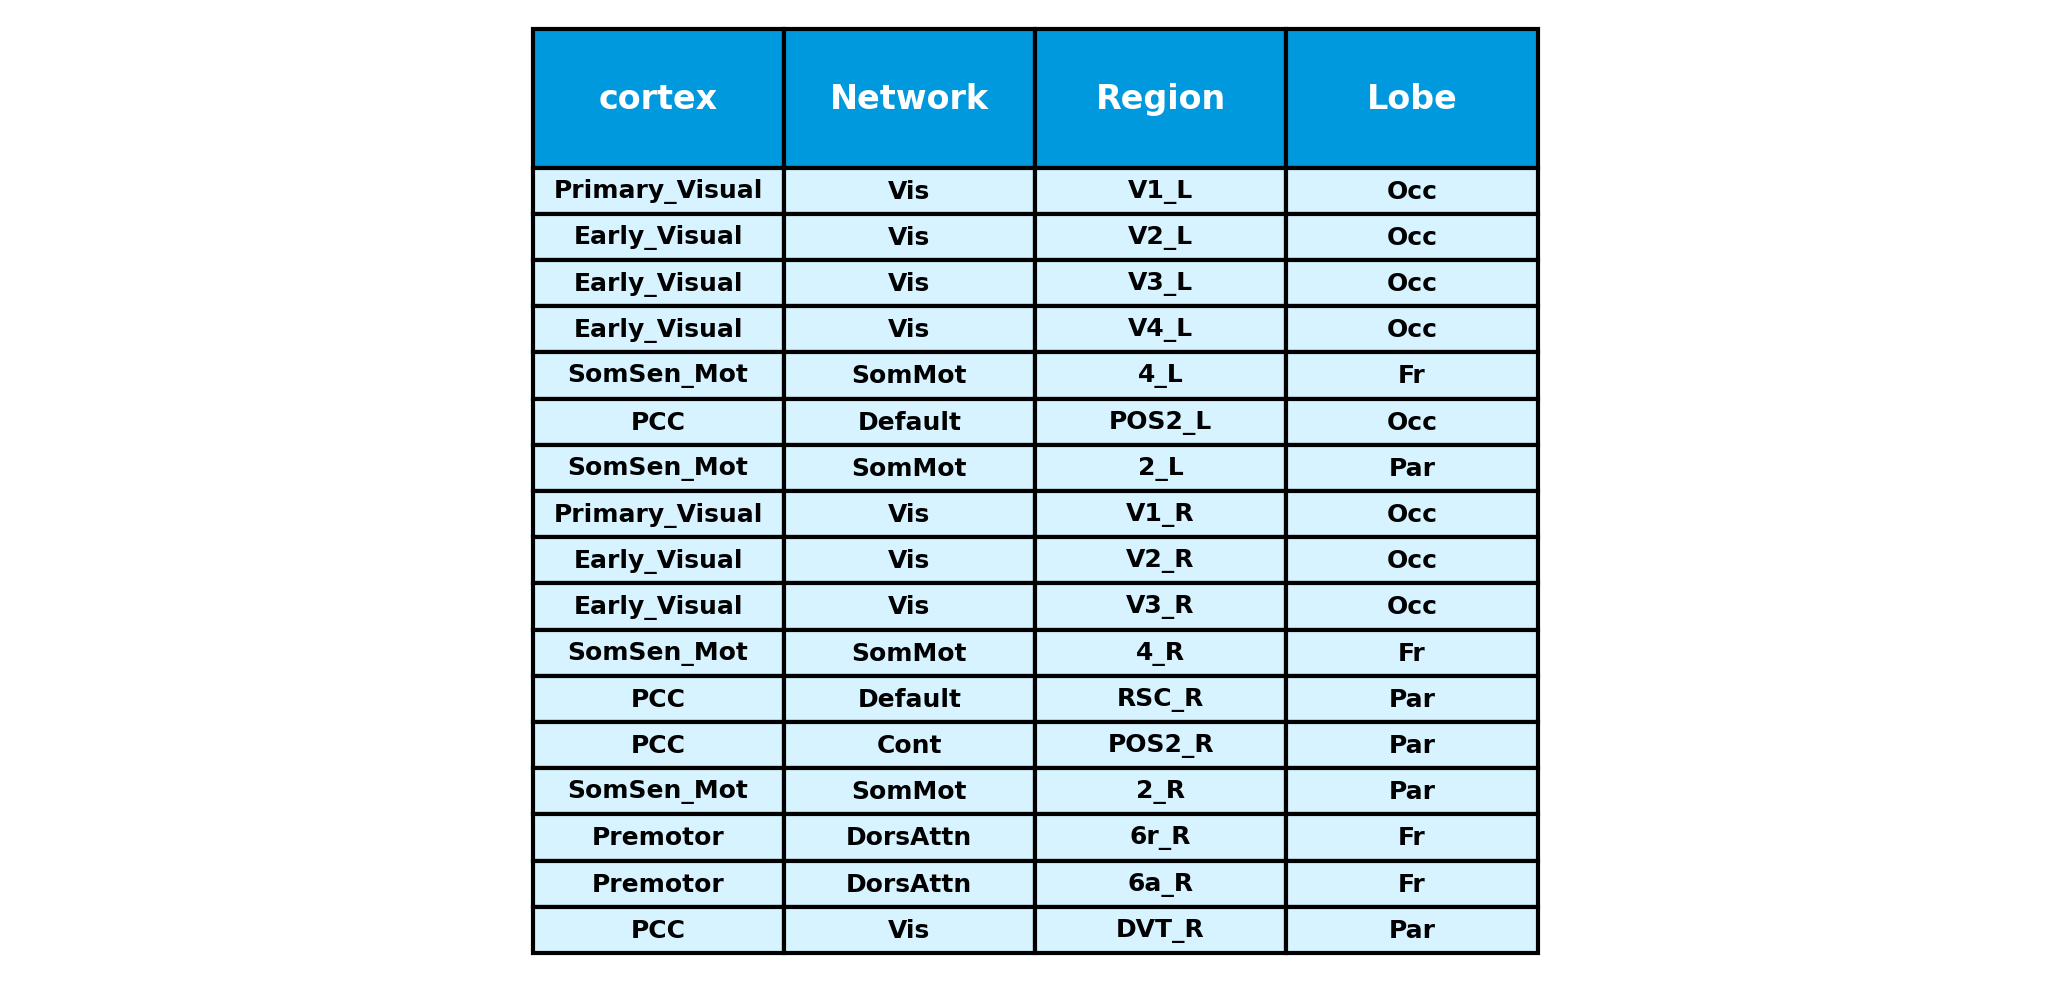

In [31]:

plt.rcdefaults()

color_shades1 = ['#00915C','#519470','#748078']
color_shades2 = ['#E6AC00', '#b29049', '#7b7469']
color_shades3 = ['#0062F5', '#568FE3',  '#8395AD']
data = pd.read_csv("../data/external/HCP-MMP1_UniqueRegionList.csv")
coord = data[["x-cog",'y-cog', 'z-cog']]
coord = coord.drop(limb_ind)
coord = coord.reset_index(drop = True)



roi_info = data[['cortex']]

roi_info= roi_info.drop(limb_ind)
roi_info = roi_info.reset_index(drop = True)

roi_label = data[['regionName']]
roi_label = roi_label.drop(limb_ind)
roi_label = roi_label.reset_index(drop = True)

roi_label1 = data[['Lobe']]
roi_label1 = roi_label1.drop(limb_ind)
roi_label1 = roi_label1.reset_index(drop = True)

roi_info["Network"] = net_label["yeo_7_nw"]
roi_info["Region"] = roi_label['regionName']
roi_info["Lobe"] = roi_label1['Lobe']






ICmap   = DATA_avg.ICallsub_w_avg
wdegmap = DATA_avg_pr.degallsub_w_avg


ICmap = np.array(ICmap).reshape(-1, 1)
wdegmap = np.array(wdegmap).reshape(-1, 1)

ind = np.arange(360)
mask = np.ones(ind.shape, dtype=bool)
mask[limb_ind] = False
ind = ind[mask]


#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest MwC values -----------------------------------
#-------------------------------------------------------------------------------------------- 


n_shades = 3 

ic_cmap = LinearSegmentedColormap.from_list("ic_shades", color_shades1, N=n_shades)


#percentiles = [95, 90, 85, 80, 75]  
percentiles = [95, 85, 75]  
data_values = np.linspace(1, 5, len(percentiles))  
data = np.zeros_like(ICmap)

for i, percentile in enumerate(percentiles):
    threshold = np.percentile(ICmap, percentile)
    
    
    mask = (ICmap >= threshold) & (data == 0)
   
    
    data[mask] = i + 1  
    
    if percentile == 95:
        
        data_ic = roi_info.loc[mask,:]
        
       
ind = np.arange(360)
mask = np.ones(ind.shape, dtype=bool)
mask[limb_ind] = False
ind = ind[mask]


data_allrois = np.zeros((360,1))
data_allrois[ind] = data


norm = Normalize(vmin=data_values.min(), vmax=data_values.max())




fsaverage = datasets.fetch_surf_fsaverage()


col_fsa = parcel_to_surface(data_allrois, 'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                       hemi='left', view='medial', bg_map=fsaverage['sulc_left'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False, 
                       title='MwC map')
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                       hemi='left', view='lateral', bg_map=fsaverage['sulc_left'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False)

legend_elements = [
    Patch(facecolor=color_shades1[0], label='Top 5%'),
   # Patch(facecolor=color_shades1[1], label='Top 10%'),
    Patch(facecolor=color_shades1[1], label='Top 15%'),
   # Patch(facecolor=color_shades1[3], label='Top 20%'),
    Patch(facecolor=color_shades1[2], label='Top 25%')
]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), 
           title='Percentile Ranges', ncol=len(legend_elements), frameon=False, fancybox=False, framealpha=0)

plt.show()


col_fsa = parcel_to_surface(data_allrois, 'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=col_fsa[int(col_fsa.shape[0]/2):],
                       hemi='right', view='medial', bg_map=fsaverage['sulc_right'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False, 
                       title='MwC map')
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=col_fsa[int(col_fsa.shape[0]/2):],
                       hemi='right', view='lateral', bg_map=fsaverage['sulc_right'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False)

legend_elements = [
    Patch(facecolor=color_shades1[0], label='Top 5%'),
   # Patch(facecolor=color_shades1[1], label='Top 10%'),
    Patch(facecolor=color_shades1[1], label='Top 15%'),
   # Patch(facecolor=color_shades1[3], label='Top 20%'),
    Patch(facecolor=color_shades1[2], label='Top 25%')
]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), 
           title='Percentile Ranges', ncol=len(legend_elements), frameon=False, fancybox=False, framealpha=0)

plt.show()



#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest DC values -------------------------------
#-------------------------------------------------------------------------------------------- 


n_shades = 3  
ic_cmap = LinearSegmentedColormap.from_list("ic_shades", color_shades3, N=n_shades)


percentiles = [95, 85, 75]  
data_values = np.linspace(1, 5, len(percentiles))  
data = np.zeros_like(wdegmap)

for i, percentile in enumerate(percentiles):
    threshold = np.percentile(wdegmap, percentile)
    mask = (wdegmap >= threshold) & (data == 0)
    data[mask] = i + 1  
    if percentile == 95:
        data_degree = roi_info.loc[mask,:]
        #print( data_degree)


data_allrois = np.zeros((360,1))
data_allrois[ind] = data


norm = Normalize(vmin=data_values.min(), vmax=data_values.max())

fsaverage = datasets.fetch_surf_fsaverage()
col_fsa = parcel_to_surface(data_allrois, 'glasser_360_fsa5') 
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                       hemi='left', view='medial', bg_map=fsaverage['sulc_left'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False, 
                       title='DC map')
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=col_fsa[:int(col_fsa.shape[0]/2)],
                       hemi='left', view='lateral', bg_map=fsaverage['sulc_left'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False)


plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=col_fsa[int(col_fsa.shape[0]/2):],
                       hemi='right', view='medial', bg_map=fsaverage['sulc_right'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False, 
                       title='DC map')
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=col_fsa[int(col_fsa.shape[0]/2):],
                       hemi='right', view='lateral', bg_map=fsaverage['sulc_right'],
                       bg_on_data=True, darkness=0.5, cmap=ic_cmap, colorbar = False)

legend_elements = [
    Patch(facecolor=color_shades3[0], label='Top 5%'),
   # Patch(facecolor=color_shades3[1], label='Top 10%'),
    Patch(facecolor=color_shades3[1], label='Top 15%'),
   # Patch(facecolor=color_shades3[3], label='Top 20%'),
    Patch(facecolor=color_shades3[2], label='Top 25%')
]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), 
           title='Percentile Ranges', ncol=len(legend_elements), frameon=False)

plt.show()





data_ic = data_ic.reset_index(drop=True)
data_degree = data_degree.reset_index(drop=True)



#df_combined = pd.concat([data_ic, data_cmrglc, data_degree], axis=1)
df_combined = data_ic
#df_combined = data_cmrglc
#df_combined = data_degree.iloc[:,0:3]
df_combined.replace('Posterior_Cingulate', 'PCC', inplace=True)
df_combined.replace('Somatosensory_and_Motor', 'SomSen_Mot', inplace=True)
df_combined.replace('Dorsolateral_Prefrontal', 'DLPFC', inplace=True)
df_combined.replace('Dorsal_Stream_Visual', 'Dors_Str_Vis', inplace=True)




def add_padding(text, padding=1):
    return ' ' * padding + text + ' ' * padding

k = 1
i = 0
col1  = ['#00915C','#e4f1e9'] 
col2  = ['#E6AC00','#fff4e3'] 
col3  = ['#0199DD','#D6F3FF'] 





number_of_columns = len(df_combined.columns)
col_width = 0.5 / number_of_columns  # Equal width for all columns, adjust as needed
col_widths = [col_width] * number_of_columns  # List of column widths

#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest MwC values -------------------------------
#-------------------------------------------------------------------------------------------- 
df_combined = data_ic
df_combined.replace('Posterior_Cingulate', 'PCC', inplace=True)
df_combined.replace('Somatosensory_and_Motor', 'SomSen_Mot', inplace=True)
df_combined.replace('Dorsolateral_Prefrontal', 'DLPFC', inplace=True)
df_combined.replace('Dorsal_Stream_Visual', 'Dors_Str_Vis', inplace=True)

col = col1
header_colors = [col[i], col[i],col[i],col[i]]#, col2[i], col2[i],col2[i], col3[i], col3[i], col3[i]]
row_colors = [col[k], col[k], col[k], col[k]]#, col2[k], col2[k], col2[k], col3[k], col3[k], col3[k]]


fig, ax = plt.subplots(figsize=(7, 8), dpi=300)
ax.axis('tight')
ax.axis('off')


the_table = ax.table(cellText=df_combined.values,
                     colLabels=df_combined.columns,
                     cellLoc='center',
                     loc='center',
                     colWidths=col_widths)

the_table.auto_set_font_size(False)
the_table.set_fontsize(8)  


for col, header_color in enumerate(header_colors):
    header_cell = the_table[(0, col)]
    header_cell.set_facecolor(header_color)
    header_cell.set_text_props(color='white', weight='bold', size=8)
    header_cell.set_height(0.3) 


for col, row_color in enumerate(row_colors):
    for row in range(1, len(df_combined) + 1):  
        body_cell = the_table[(row, col)]
        body_cell.set_facecolor(row_color)
        body_cell.set_text_props(color='black', weight='bold', size=6)
        body_cell.set_height(0.1)  

plt.tight_layout()
plt.show()



#--------------------------------------------------------------------------------------------
#----------------------  regions with strongest Degree values -------------------------------
#-------------------------------------------------------------------------------------------- 
df_combined = data_degree
df_combined.replace('Posterior_Cingulate', 'PCC', inplace=True)
df_combined.replace('Somatosensory_and_Motor', 'SomSen_Mot', inplace=True)
df_combined.replace('Dorsolateral_Prefrontal', 'DLPFC', inplace=True)
df_combined.replace('Dorsal_Stream_Visual', 'Dors_Str_Vis', inplace=True)
df_combined.replace('Paracentral_Lobular_and_Mid_Cingulate', 'PCL and MCC', inplace=True)
df_combined.replace('Inferior_', 'PCL and MCC', inplace=True)


col = col3
header_colors = [col[i], col[i],col[i],col[i]]#, col2[i], col2[i],col2[i], col3[i], col3[i], col3[i]]
row_colors = [col[k], col[k], col[k], col[k]]#, col2[k], col2[k], col2[k], col3[k], col3[k], col3[k]]


fig, ax = plt.subplots(figsize=(7,8), dpi=300)
ax.axis('tight')
ax.axis('off')

# Create the table with specified column widths
the_table = ax.table(cellText=df_combined.values,
                     colLabels=df_combined.columns,
                     cellLoc='center',
                     loc='center',
                     colWidths=col_widths)

the_table.auto_set_font_size(False)
the_table.set_fontsize(8)  # Set the font size for all cells

# Set the background color and text properties for header cells
for col, header_color in enumerate(header_colors):
    header_cell = the_table[(0, col)]
    header_cell.set_facecolor(header_color)
    header_cell.set_text_props(color='white', weight='bold', size=8)
    header_cell.set_height(0.3)  # Visually increase the header cell height

# Set the background color and text properties for the rest of the cells
for col, row_color in enumerate(row_colors):
    for row in range(1, len(df_combined) + 1):  # Start from 1 to skip the header
        body_cell = the_table[(row, col)]
        body_cell.set_facecolor(row_color)
        body_cell.set_text_props(color='black', weight='bold', size=6)
        body_cell.set_height(0.1)  # Set a consistent height for the rest of the cells

plt.tight_layout()
plt.show()

## Fig S2: external data (MwC)

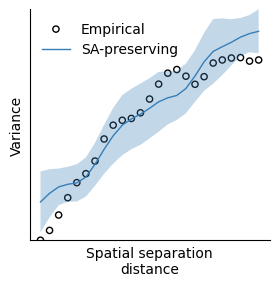

Pearson correlation: 0.5988011054157979
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 0.00e+00


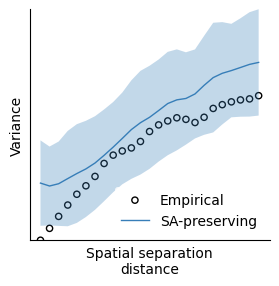

Pearson correlation: 0.5710755039326545
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 0.00e+00


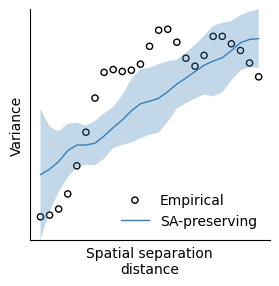

Pearson correlation: 0.49708665823190507
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 0.00e+00


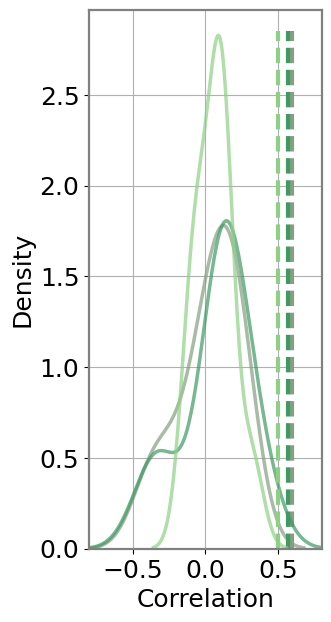

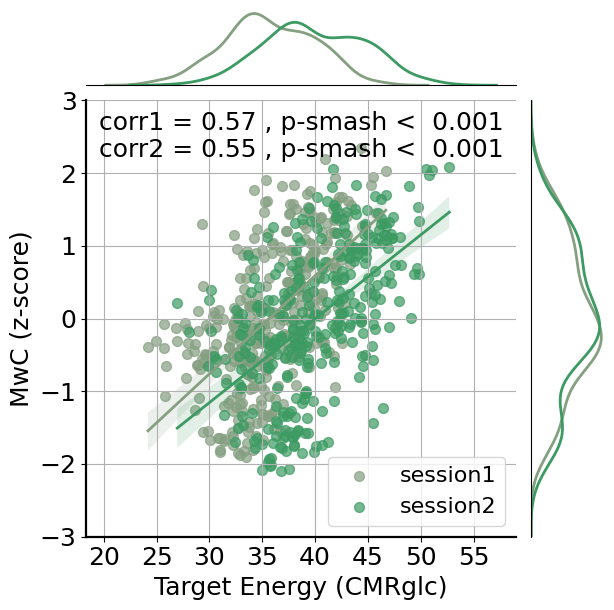

<Figure size 700x700 with 0 Axes>

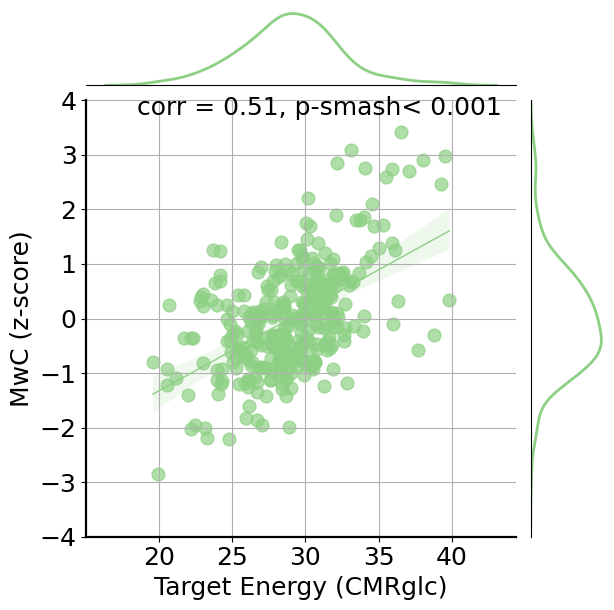

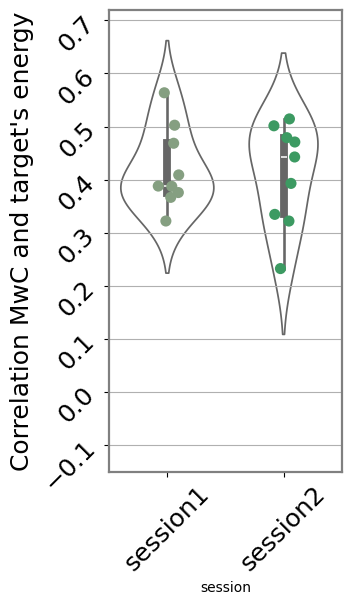

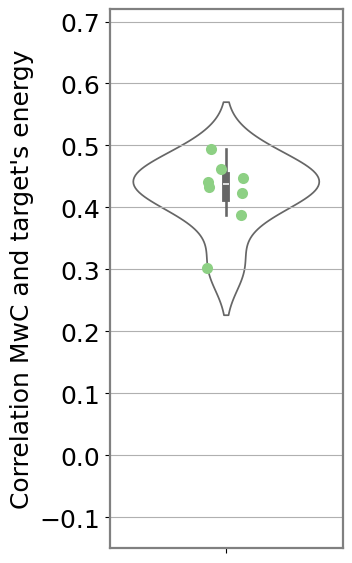

In [37]:
COLOR1 = "#859F81"
COLOR2 = '#3C9A62'

session1 = "m1"
session2 = "m2"
session3 = "ZU"
LIMB = 'without'


data_path = f'../data/processed/'



with open(os.path.join(data_path,f'matrices_data_{session1}_{LIMB}_limbic.pkl'), 'rb') as file:
    data_input_ex1 = pickle.load(file)

with open(os.path.join(data_path,f'matrices_data_{session2}_{LIMB}_limbic.pkl'), 'rb') as file:
    data_input_ex2 = pickle.load(file)

with open(os.path.join(data_path,f'matrices_data_{session3}_{LIMB}_limbic.pkl'), 'rb') as file:
    data_input_ex3 = pickle.load(file)



edata_medianallsub_ex1 = data_input_ex1['edata_medianallsub']
edata_medianallsub_ex2 = data_input_ex2['edata_medianallsub']
edata_medianallsub_ex3 = data_input_ex3['edata_medianallsub']

sub_size1 = edata_medianallsub_ex1.shape[1]
sub_size2 = edata_medianallsub_ex2.shape[1]
sub_size3 = edata_medianallsub_ex3.shape[1]

DATA_avg_ex1 = pd.read_csv(os.path.join(data_path,f'DATA_avg_woSC_{session1}_{LIMB}_limb.csv'))
with open(os.path.join(data_path,f'data_single_sub_woSC_{session1}_{LIMB}_limb.pkl'), 'rb') as file:
    data_single_sub_ex1 = pickle.load(file)


DATA_avg_ex2 = pd.read_csv(os.path.join(data_path,f'DATA_avg_woSC_{session2}_{LIMB}_limb.csv'))
with open(os.path.join(data_path,f'data_single_sub_woSC_{session2}_{LIMB}_limb.pkl'), 'rb') as file:
    data_single_sub_ex2 = pickle.load(file)

DATA_avg_ex3 = pd.read_csv(os.path.join(data_path,f'DATA_avg_wSC_{session3}_{LIMB}_limb.csv'))
with open(os.path.join(data_path,f'data_single_sub_wSC_{session3}_{LIMB}_limb.pkl'), 'rb') as file:
    data_single_sub_ex3 = pickle.load(file)


ICallsub_w_ex1 = zscore(data_single_sub_ex1['ICallsub_w'],  nan_policy='omit')
ICallsub_w_ex2 = zscore(data_single_sub_ex2['ICallsub_w'],  nan_policy='omit')
ICallsub_w_ex3 = zscore(data_single_sub_ex3['ICallsub_w'],  nan_policy='omit')


#--------------------------------------------------------------------------------------------
#------------------ SPatial Autocorrelation  -----------------------
#--------------------------------------------------------------------------------------------


LIMB = 'without'
niter = 10
limb_ind = np.array([88, 90, 92, 93, 110, 118, 120, 122, 131, 135, 165, 166, 172, 268, 270, 272, 273, 290, 298, 300, 302, 311, 314, 315, 346, 352])-1
mode = "IC"


test_stat_ex1 ,surrogate_brainmap_corrs_ex1,sa_corrected_p_value_ex1,spatially_naive_p_value_ex1  = Spatial_AC(DATA_avg_ex1, mode, LIMB, niter )
test_stat_ex2 ,surrogate_brainmap_corrs_ex2,sa_corrected_p_value_ex2,spatially_naive_p_value_ex2  = Spatial_AC(DATA_avg_ex2, mode, LIMB, niter )
test_stat_ex3 ,surrogate_brainmap_corrs_ex3,sa_corrected_p_value_ex3,spatially_naive_p_value_ex3  = Spatial_AC(DATA_avg_ex3, mode, LIMB, niter )


fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)


sns.kdeplot(
    surrogate_brainmap_corrs_ex1,
    color=COLOR1,
    fill=False,
    linewidth=2.5,
    alpha=0.7,             
    label="Data Ex1",
    ax=ax
)
ax.axvline(
    test_stat_ex1,
    ymin=0, ymax=0.96,
    color=COLOR1,
    linestyle='dashed',
    lw=3
)


sns.kdeplot(
    surrogate_brainmap_corrs_ex2,
    color=COLOR2,
    fill=False,
    linewidth=2.5,
    alpha=0.7,
    label="Data Ex2",
    ax=ax
)
ax.axvline(
    test_stat_ex2,
    ymin=0, ymax=0.96,
    color=COLOR2,
    linestyle='dashed',
    lw=3
)


sns.kdeplot(
    surrogate_brainmap_corrs_ex3,
    color=COLOR,
    fill=False,
    linewidth=2.5,
    alpha=0.7,
    label="Data Ex3",
    ax=ax
)
ax.axvline(
    test_stat_ex3,
    ymin=0, ymax=0.96,
    color=COLOR,
    linestyle='dashed',
    lw=3
)

ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_xlim(-0.8, 0.8)


spine_width = 1.6
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.tick_params(axis='both', which='major', labelsize=FONT)      
plt.xlabel('Correlation', fontsize=FONT)
plt.ylabel('Density', fontsize=FONT)
plt.show()


data_ex1_z = pd.DataFrame({'pet_avg':DATA_avg_ex1['pet_avg'], 'ICallsub_w_avg':zscore(DATA_avg_ex1['ICallsub_w_avg'],  nan_policy='omit'),
                          'degallsub_w_avg':zscore(DATA_avg_ex1['degallsub_w_avg'],  nan_policy='omit')})
data_ex2_z = pd.DataFrame({'pet_avg':DATA_avg_ex2['pet_avg'], 'ICallsub_w_avg':zscore(DATA_avg_ex2['ICallsub_w_avg'],  nan_policy='omit'),
                           'degallsub_w_avg':zscore(DATA_avg_ex2['degallsub_w_avg'],  nan_policy='omit')})
data_ex3_z = pd.DataFrame({'pet_avg':DATA_avg_ex3['pet_avg'], 'ICallsub_w_avg':zscore(DATA_avg_ex3['ICallsub_w_avg'],  nan_policy='omit'),
                           'degallsub_w_avg':zscore(DATA_avg_ex3['degallsub_w_avg'],  nan_policy='omit')})

corr_IC_w_E_ex1, p_IC_w_E_ex1 = pcor(data_ex1_z.ICallsub_w_avg, data_ex1_z.pet_avg)
corr_IC_w_deg_ex1, p_IC_w_deg_ex1 = pcor(data_ex1_z.ICallsub_w_avg, data_ex1_z.degallsub_w_avg)

corr_IC_w_E_ex2, p_IC_w_E_ex2 = pcor(data_ex2_z.ICallsub_w_avg, data_ex2_z.pet_avg)
corr_IC_w_deg_ex2, p_IC_w_deg_ex2 = pcor(data_ex2_z.ICallsub_w_avg, data_ex2_z.degallsub_w_avg)

corr_IC_w_E_ex3, p_IC_w_E_ex3 = pcor(data_ex3_z.ICallsub_w_avg, data_ex3_z.pet_avg)
corr_IC_w_deg_ex3, p_IC_w_deg_ex3 = pcor(data_ex3_z.ICallsub_w_avg, data_ex3_z.degallsub_w_avg)


corr_IC_E_allsub_ex1 = np.zeros((sub_size1))
p_IC_E_allsub_ex1 = np.zeros((sub_size1))

corr_IC_E_allsub_ex2 = np.zeros((sub_size2))
p_IC_E_allsub_ex2 = np.zeros((sub_size2))

corr_IC_E_allsub_ex3 = np.zeros((sub_size3))
p_IC_E_allsub_ex3 = np.zeros((sub_size3))


for j in range(sub_size1):                            
    corr_IC_E_allsub_ex1[j], p_IC_E_allsub_ex1[j] = pcor(ICallsub_w_ex1[:, j], edata_medianallsub_ex1[:, j])

for j in range(sub_size2):
    corr_IC_E_allsub_ex2[j], p_IC_E_allsub_ex2[j] = pcor(ICallsub_w_ex2[:, j], edata_medianallsub_ex2[:, j])

for j in range(sub_size3):
    corr_IC_E_allsub_ex3[j], p_IC_E_allsub_ex3[j] = pcor(ICallsub_w_ex3[:, j], edata_medianallsub_ex3[:, j])


#----------------------------------------------------------------------------------------------------
# scatter IC_avg , CMRglc_avg / group analysis >>> external data Vienna with two sessions (m1 and m2)
#----------------------------------------------------------------------------------------------------

g = sns.jointplot(
    data=data_ex1_z, x='pet_avg', y='ICallsub_w_avg', kind="reg",
    scatter_kws={'s': 50, 'alpha': 0.7, 'facecolors': COLOR1, 'edgecolors': COLOR1},
    line_kws={'color': COLOR1, 'lw': 2},
    color=COLOR1, label="session1", marginal_ticks=False
)

g.ax_marg_x.clear()
g.ax_marg_y.clear()


g.ax_marg_x.tick_params(
    axis='both',       
    which='both',      
    bottom=False,      
    labelbottom=False, 
    left=False,        
    labelleft=False  
)


g.ax_marg_y.tick_params(
    axis='both',
    which='both',
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)



sns.regplot(
    data=data_ex2_z, x='pet_avg', y='ICallsub_w_avg',
    scatter_kws={'s': 50, 'alpha': 0.7, 'facecolors': COLOR2, 'edgecolors': COLOR2},
    line_kws={'color': COLOR2, 'lw': 2},
    color=COLOR2, ax=g.ax_joint, label="session2"
)


sns.kdeplot(data=data_ex1_z, x='pet_avg', ax=g.ax_marg_x, color=COLOR1, lw=2, label="Session 1", fill=False)
sns.kdeplot(data=data_ex2_z, x='pet_avg', ax=g.ax_marg_x, color=COLOR2, lw=2, label="Session 2", fill=False)
sns.kdeplot(data=data_ex1_z, y='ICallsub_w_avg', ax=g.ax_marg_y, color=COLOR1, lw=2, label="Session 1", fill=False)
sns.kdeplot(data=data_ex2_z, y='ICallsub_w_avg', ax=g.ax_marg_y, color=COLOR2, lw=2, label="Session 2", fill=False)


g.ax_marg_x.set_ylabel("")  
g.ax_marg_y.set_xlabel("")  
g.ax_joint.set_xlabel('Target Energy (CMRglc)', fontsize=FONT)
g.ax_joint.set_ylabel('MwC (z-score)', fontsize=FONT)
g.ax_joint.set_ylim([-3,3])

p_val1 = sa_corrected_p_value_ex1;
p_val2 = p_IC_w_E_ex1



if p_IC_w_E_smash < 0.001:
     title1 = "corr1 = {:.2f} , p-smash <  {:.3f}".format(float(corr_IC_w_E_ex1 ), float(0.001))
else:
    title1 = "corr1 = {:.2f} , p-smash <  {:.3f}".format(float(corr_IC_w_E_ex1 ), float(p_val1.item()))


if p_IC_w_E_smash < 0.001:
    title2 = "corr2 = {:.2f} , p-smash <  {:.3f}".format(float(corr_IC_w_E_ex2 ), float(0.001))
else:
    title2 = "corr2 = {:.2f} , p-smash <  {:.3f}".format(float(corr_IC_w_E_ex2 ), float(p_val2.item()))
 
g.ax_joint.set_title(
   title1 + "\n"+ title2,
    fontsize=FONT, va='baseline', y=0.85
)
plt.grid(True)
g.ax_joint.tick_params(axis='both', which='major', labelsize=FONT)


spine_width = 1.6
for spine in g.ax_joint.spines.values():
    spine.set_linewidth(spine_width)

g.ax_joint.legend(fontsize=FONT-2, loc="lower right")
plt.savefig('../results/Figures/ext_IC_CMRglc_wien.png', dpi=300, bbox_inches='tight')
plt.show()


#----------------------------------------------------------------------------------------------------
# scatter IC_avg , CMRglc_avg / group analysis >>> external data TUM: closed eyes(ZU):
#----------------------------------------------------------------------------------------------------
plt.figure(figsize=(7,7))
g = sns.jointplot(data=data_ex3_z, x='pet_avg', y='ICallsub_w_avg', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': COLOR, 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':IC_color, 'edgecolors':IC_color}  ) 




g.ax_marg_x.clear()
g.ax_marg_y.clear()


g.ax_marg_x.tick_params(
    axis='both',       
    which='both',      
    bottom=False,      
    labelbottom=False, 
    left=False,        
    labelleft=False  
)


g.ax_marg_y.tick_params(
    axis='both',
    which='both',
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)

sns.kdeplot(data=data_ex3_z, x='pet_avg', ax=g.ax_marg_x, color=COLOR, lw=2, fill=False)
sns.kdeplot(data=data_ex3_z, y='ICallsub_w_avg', ax=g.ax_marg_y, color=COLOR, lw=2 ,fill=False)

title = f"corr = {corr_IC_w_E_ex3:.2f}, p-smash< 0.001"
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'MCC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('Target Energy (CMRglc)', fontsize = FONT)
plt.ylabel('MwC (z-score)', fontsize = FONT)
plt.ylim([-4,4])
ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    
plt.savefig('../results/Figures/ext_IC_CMRglc_ZU.png', dpi=300, bbox_inches='tight')
plt.show()


#--------------------------------------------------------------------------------------------
# Box plot individual correlation between IC and E >>> external data Vienna with two sessions (m1 and m2)
#--------------------------------------------------------------------------------------------

group_colors = [COLOR1, COLOR2]
data = pd.DataFrame({
    'corr': np.concatenate([corr_IC_E_allsub_ex1, corr_IC_E_allsub_ex2]),
    'session': ['session1'] * sub_size1+ ['session2'] * sub_size2,
    'pval' : np.concatenate([p_IC_E_allsub_ex1, p_IC_E_allsub_ex2])
})

fig, ax = plt.subplots(figsize=(3, 6))
plt.grid(True)
violin = sns.violinplot(data=data, x = 'session', y='corr', ax=ax, color = COLOR)
violin.collections[0].set_facecolor('none')
violin.collections[1].set_facecolor('none')
sns.stripplot(data=data[data['pval'] < 0.05], x='session', y='corr', hue='session', palette=group_colors, size=8, ax=ax, jitter=True, label="p < 0.05")
sns.stripplot(data=data[data['pval'] >= 0.05], x='session', y='corr', color='red', size=8, ax=ax, jitter=True, label="p >= 0.05")
ax.set_ylabel('Correlation MwC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.15,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT, rotation = 45)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.savefig('../results/Figures/ext_box_IC_CMRglc_wien.png', dpi=300, bbox_inches='tight')  
plt.show()

#--------------------------------------------------------------------------------------------
# Box plot individual correlation between IC and E >>> external data TUM (closed eyes)
#--------------------------------------------------------------------------------------------
data = pd.DataFrame({'corr': corr_IC_E_allsub_ex3, 'pval': p_IC_E_allsub_ex3})
fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)
violin = sns.violinplot(data=data, y='corr', ax=ax, color = COLOR)
violin.collections[0].set_facecolor('none')
sns.stripplot(data=data[data['pval'] < 0.05], y='corr', color=IC_color , size = 8, ax=ax)
sns.stripplot(data=data[data['pval'] >= 0.05], y='corr', color='red' , size = 8, ax=ax)
ax.set_ylabel('Correlation MwC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.15,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.savefig('../results/Figures/ext_box_IC_CMRglc_zu.png', dpi=300, bbox_inches='tight')    
plt.show()


## Fig S3: participation coefficient

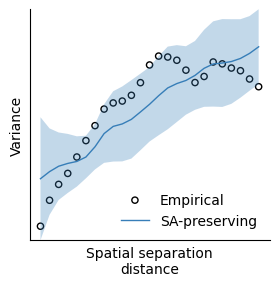

Pearson correlation: 0.256164548646803
Spatially naive p-value: 0.00e+00
SA-corrected p-value: 0.00e+00


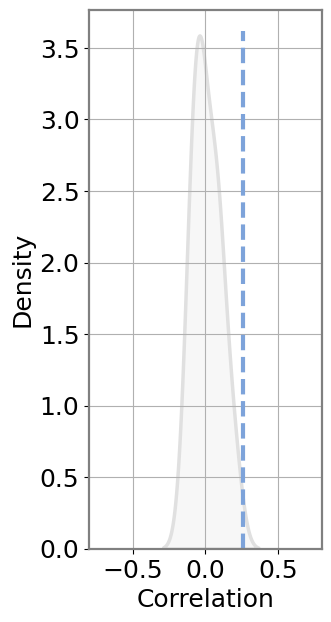

<Figure size 600x400 with 0 Axes>

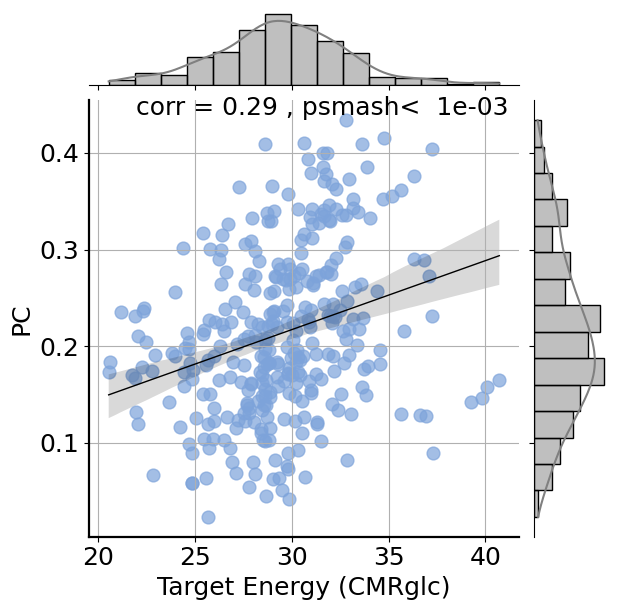

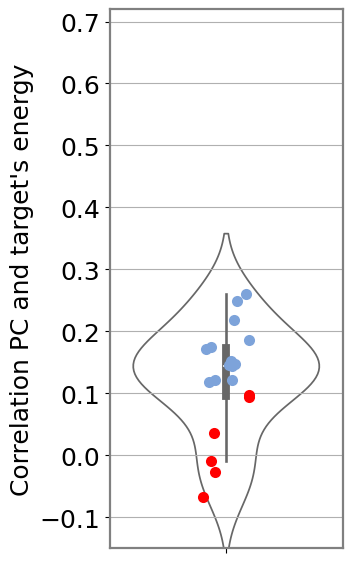

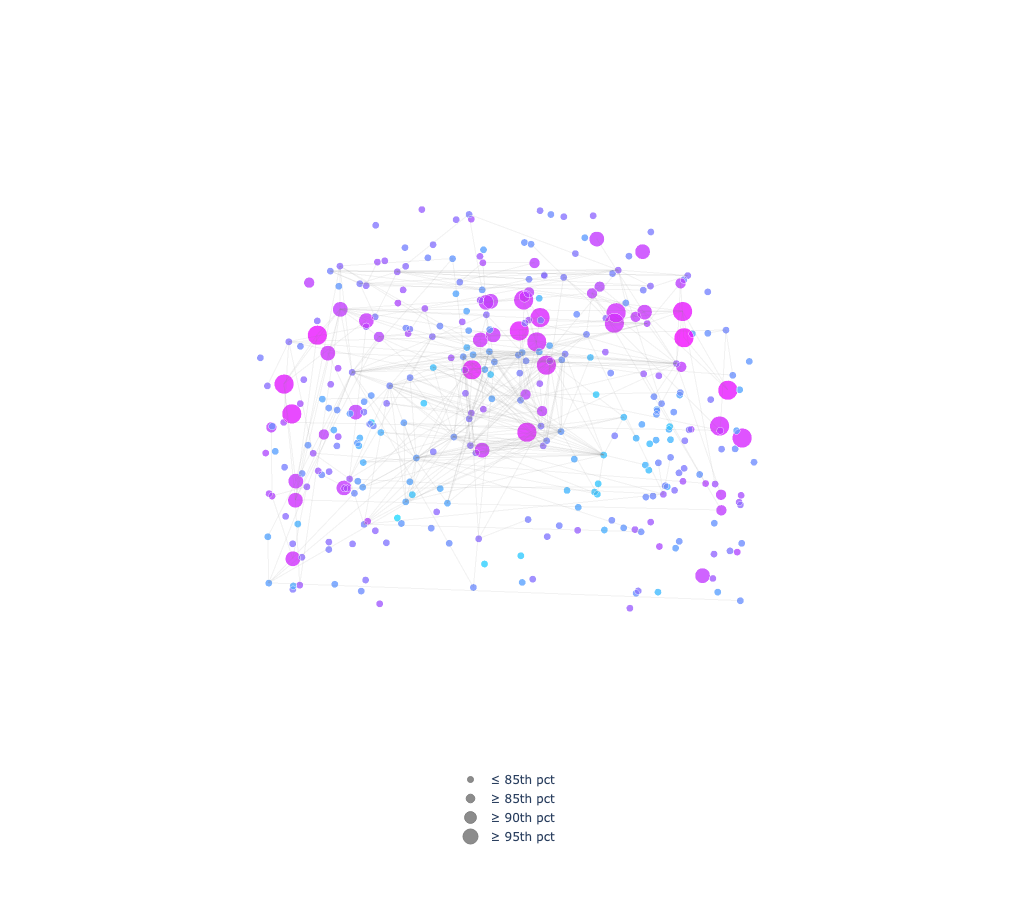

In [58]:
'''
participation coefficent can be calculated with one of these methods:
'infomap', 'louvain', 'walktrap', 'label_prop'
'''
    

method = 'infomap'
PC_COLOR = '#7DA3DA'
session = "AUF"
LIMB = "without"
thr_fc = 0.1
thr_sc = 0.1


file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
with open(file_path, 'rb') as file:
    data_input = pickle.load(file)

conn_mat = data_input['Pearconn_allsub']
SCconn_allsub = data_input['SCconn_allsub']
sub_size = SCconn_allsub.shape[2]


all_pc = ParticipationCoeff(thr_fc, thr_sc, conn_mat, SCconn_allsub, sub_size)
pc_allmethods_avg = {method: np.mean(pc_matrix, axis=1) for method, pc_matrix in all_pc.items()}



data_pc_avg = pd.DataFrame({'pet_avg': DATA_avg.pet_avg, 'PCallsub_w_avg': pc_allmethods_avg[method], 'ICallsub_w_avg': DATA_avg.ICallsub_w_avg})
ind = data_pc_avg['PCallsub_w_avg']>0
#data_pc_avg = pd.DataFrame({'pet_avg': DATA_avg.pet_avg, 'PCallsub_w_avg': bg.pc, 'ICallsub_w_avg': DATA_avg.ICallsub_w_avg})
corr_PC_w_E, p_PC_w_E = pcor(data_pc_avg.PCallsub_w_avg[ind], data_pc_avg.pet_avg[ind])




#--------------------------------------------------------------------------------------------
#--------------------------- brain smash                  -----------------------------------
#--------------------------------------------------------------------------------------------



niter = 10
limb_ind = np.array([88, 90, 92, 93, 110, 118, 120, 122, 131, 135, 165, 166, 172, 268, 270, 272, 273, 290, 298, 300, 302, 311, 314, 315, 346, 352])-1
COLOR = PC_COLOR
mode = "PC"


input_data = data_pc_avg
test_stat ,surrogate_brainmap_corrs,sa_corrected_p_value,spatially_naive_p_value  = Spatial_AC(input_data , mode, LIMB, niter )

sac1 = '#0199DD' 
sac2 = '#8CCF83'
sac3 = '#FEAD01'






fig, ax = plt.subplots(figsize=(3, 7))

plt.grid(True)
g = sns.kdeplot(surrogate_brainmap_corrs, color= "#E0E0E0", ax=ax, fill= True, linewidth=2.5 )

ax.axvline(test_stat, 0, 0.96, color= COLOR, linestyle='dashed', lw=3)

    
ax.set_xticks(np.arange(-1, 1.1, 0.5))
#ax.set_ylim(0, 1.7)
ax.set_xlim(-0.8, 0.8)
#ax.text(0.5, -0.1, "Pearson correlation\nwith IE map", ha='center', va='top', transform=ax.transAxes)
spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)


plt.tick_params(axis='both', which='major', labelsize= FONT)      
plt.xlabel('Correlation', fontsize = FONT)
plt.ylabel('Density', fontsize = FONT)
plt.show()


#--------------------------------------------------------------------------------------------
#--------------------------- group level: scatter plot CMRglc and PC  -----------------------------------
#--------------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))
g = sns.jointplot(data=data_pc_avg, x='pet_avg', y='PCallsub_w_avg', kind="reg", color=PC_COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':PC_COLOR, 'edgecolors':PC_COLOR}  ) 


p_PC_w_E_smash = sa_corrected_p_value

if p_PC_w_E_smash < 0.0001:
     title = "corr = {:.2f} , psmash<  {:.0e}".format(float(corr_PC_w_E), float(0.001))
else:
    title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_PC_w_E), float(p_PC_w_E_smash))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'PC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('Target Energy (CMRglc)', fontsize = FONT)
plt.ylabel('PC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    

plt.show()



#--------------------------------------------------------------------------------------------
#--------------------------- subject level: box plot CMRglc and PC  -----------------------------------
#--------------------------------------------------------------------------------------------


corr_PC_E_allsub = np.zeros((sub_size))
p_PC_E_allsub = np.zeros((sub_size))

for j in range(sub_size):                             
    
    corr_PC_E_allsub[j], p_PC_E_allsub[j] = pcor(all_pc[method][:, j], edata_medianallsub_rem[:, j])
    

    

data = pd.DataFrame({'corr': corr_PC_E_allsub, 'pval': p_PC_E_allsub})
fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)
violin = sns.violinplot(data=data, y='corr', ax=ax, color = PC_COLOR)
violin.collections[0].set_facecolor('none')
sns.stripplot(data=data[data['pval'] < 0.05], y='corr', color=PC_COLOR , size = 8, ax=ax)
sns.stripplot(data=data[data['pval'] >= 0.05], y='corr', color='red' , size = 8, ax=ax)
ax.set_ylabel('Correlation PC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.15,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

    
plt.show()





#--------------------------------------------------------------------------------------------
#--------------------------- PC map on the brain surface  -----------------------------------
#--------------------------------------------------------------------------------------------

plot_node_surf(data_pc_avg, Pearconn_allsub, 'PCallsub_w_avg', CMAP_DC,0.35, limb_ind)    




## Fig S4: MwC vs CMRglc for combined datasets

0.6307725311266696
0.15881382669953487
-0.07844509932522083


<Figure size 600x400 with 0 Axes>

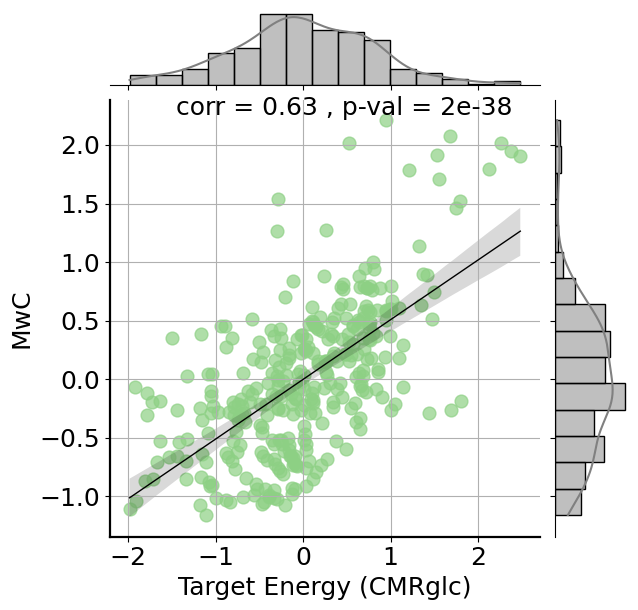

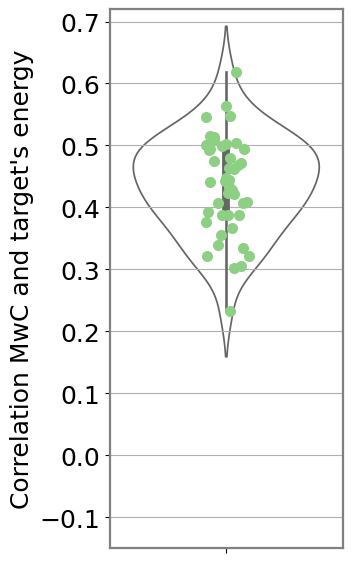

In [39]:
#--------------------------------------------------------------------------------------------
#------------------ read all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------

session = 'AUF'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_wSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl'


with open(file_path, 'rb') as file:
    data_input_auf = pickle.load(file)
    
DATA_avg_auf =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_auf = pickle.load(file)

DATA_avg_pr_auf =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_auf = pickle.load(file)



session = 'ZU'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_wSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_zu = pickle.load(file)
    
DATA_avg_zu =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_zu = pickle.load(file)

DATA_avg_pr_zu =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_zu = pickle.load(file)




session = 'm1'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_woSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_woSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_woSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_woSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_m1 = pickle.load(file)
    
DATA_avg_m1 =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_m1 = pickle.load(file)

DATA_avg_pr_m1 =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_m1 = pickle.load(file)



session = 'm2'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_woSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_woSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_woSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_woSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_m2 = pickle.load(file)
    
DATA_avg_m2 =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_m2 = pickle.load(file)

DATA_avg_pr_m2 =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_m2 = pickle.load(file)



#--------------------------------------------------------------------------------------------
#------------------ concatenated all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------


df1 = zscore(data_single_sub_auf['ICallsub_w'], nan_policy='omit')
df2 = zscore(data_single_sub_zu['ICallsub_w'], nan_policy='omit')
df3 = zscore(data_single_sub_m1['ICallsub_w'], nan_policy='omit')
df4 = zscore(data_single_sub_m2['ICallsub_w'], nan_policy='omit')

ICallsub_allsessions = np.hstack((df1, df2, df3, df4))
#ICallsub_allsessions = df3
ICallsub_allsessions = pd.DataFrame(ICallsub_allsessions)



df1 = zscore(data_single_sub_pr_auf['degallsub_w'], nan_policy='omit')
df2 = zscore(data_single_sub_pr_zu['degallsub_w'], nan_policy='omit')
df3 = zscore(data_single_sub_pr_m1['degallsub_w'], nan_policy='omit')
df4 = zscore(data_single_sub_pr_m2['degallsub_w'], nan_policy='omit')

degallsub_allsessions = np.hstack((df1, df2, df3, df4))
#degallsub_allsessions = df3
degallsub_allsessions = pd.DataFrame(degallsub_allsessions)


df1 = zscore(data_input_auf['edata_medianallsub'], nan_policy='omit')
df2 = zscore(data_input_zu['edata_medianallsub'], nan_policy='omit')
df3 = zscore(data_input_m1['edata_medianallsub'], nan_policy='omit')
df4 = zscore(data_input_m2['edata_medianallsub'], nan_policy='omit')

edata_allsub_allsessions = np.hstack((df1, df2, df3, df4))
#edata_allsub_allsessions = df3
edata_allsub_allsessions = pd.DataFrame(edata_allsub_allsessions)


ICallsub_allsessions_avg = np.nanmean(ICallsub_allsessions, axis = 1)
degallsub_allsessions_avg = np.nanmean(degallsub_allsessions, axis = 1)
edata_allsub_allsessions_avg = np.nanmean(edata_allsub_allsessions, axis = 1)



#--------------------------------------------------------------------------------------------
#------------------ concatenated all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------

IC = ICallsub_allsessions_avg
DC = degallsub_allsessions_avg
CMRglc = edata_allsub_allsessions_avg

IC = np.array(IC).flatten()
DC = np.array(DC).flatten()
CMRglc = np.array(CMRglc).flatten()

alldata_avg = pd.DataFrame({'IC':IC, 'DC':DC, 'pet':CMRglc})

r_IC_CMRglc,p_IC_CMRglc = pcor(IC,CMRglc)  
print(r_IC_CMRglc )
r_DC_CMRglc , p_DC_CMRglc= pcor(DC,CMRglc)    
print(r_DC_CMRglc)
r_IC_DC , p_IC_DC = pcor(IC,DC)
print(r_IC_DC)



  
           
#--------------------------------------------------------------------------------------------
#------------------ scatter IC_avg , CMRglc_avg / group analysis ----------------------------
#--------------------------------------------------------------------------------------------
COLOR = IC_color
plt.figure(figsize=(6,4))
g = sns.jointplot(data=alldata_avg, x='pet', y='IC', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 



title = "corr = {:.2f} , p-val = {:.0e}".format(float(r_IC_CMRglc), float(p_IC_CMRglc,))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'MCC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('Target Energy (CMRglc)', fontsize = FONT)
plt.ylabel('MwC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    
plt.savefig('../results/Figures/all_scatter_IC_CMRglc_.png', dpi=300, bbox_inches='tight')
plt.show()

#--------------------------------------------------------------------------------------------
#------------------ Box plot individual correlation between IC and E  -----------------------
#--------------------------------------------------------------------------------------------
sub_size = np.size(edata_allsub_allsessions, axis =1)
corr_IC_E_allsub = np.zeros((sub_size))
p_IC_E_allsub = np.zeros((sub_size))

for j in range(sub_size):
                                
    corr_IC_E_allsub[j], p_IC_E_allsub[j] = pcor(edata_allsub_allsessions.iloc[:,j], ICallsub_allsessions.iloc[:,j]) 


data = pd.DataFrame({'corr': corr_IC_E_allsub, 'pval': p_IC_E_allsub})
fig, ax = plt.subplots(figsize=(3, 7))
plt.grid(True)
violin = sns.violinplot(data=data, y='corr', ax=ax, color = COLOR)
violin.collections[0].set_facecolor('none')
sns.stripplot(data=data[data['pval'] < 0.05], y='corr', color=COLOR , size = 8, ax=ax)
sns.stripplot(data=data[data['pval'] >= 0.05], y='corr', color='red' , size = 8, ax=ax)
ax.set_ylabel('Correlation MwC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.15,0.72])
plt.tick_params(axis='both', which='major', labelsize= FONT)  

spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.savefig('../results/Figures/all_box_IC_CMRglc_.png', dpi=300, bbox_inches='tight')   
plt.show()

## Fig S5-a: control analysis

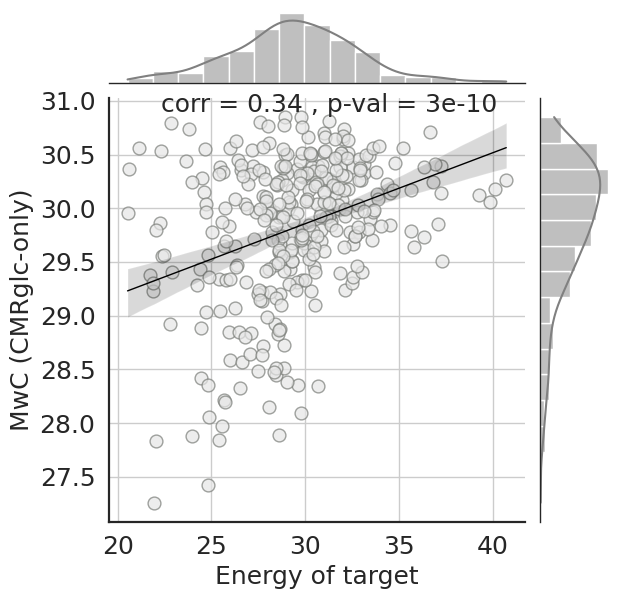

[2.98083182e-06 1.99625360e-04 2.37537610e-08 1.74998627e-03
 3.31698922e-07 6.82267989e-15 1.16268047e-03 1.87111926e-04
 5.16129915e-02 5.40287381e-05 3.12440355e-11 7.39260269e-11
 9.65987930e-08 2.37050645e-07 1.21240844e-01 8.38353345e-06
 2.39174864e-02 5.16214297e-26 4.29893105e-03]


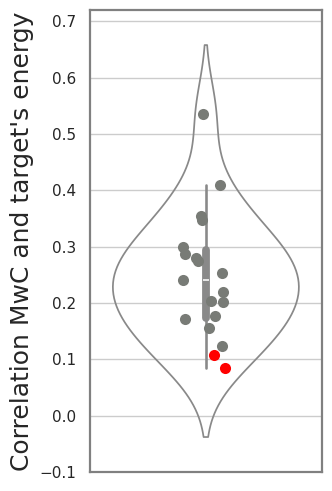

Permutation Test Results:
Observed Correlation: 0.6281059496234069
Observed p-value: 4.6768358705185196e-38
Average perumuted correlation : 0.0020099613251616786


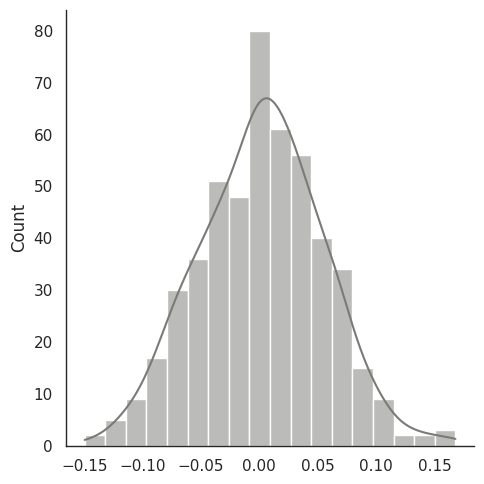

/home/tumnic/amahnaz/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

/home/tumnic/amahnaz/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

/home/tumnic/amahnaz/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.



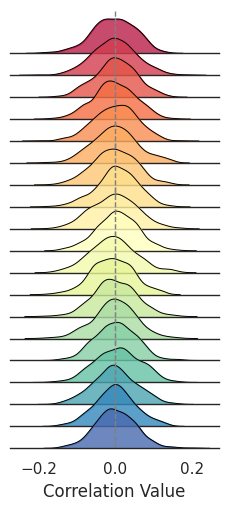

In [64]:

#--------------------------------------------------------------------------------------------
#---- same weights for one target (keep the number of connection same as the real data)------
#--------------------------------------------------------------------------------------------

SCmat =  SCconn_allsub
thr_sc = 0.2
SCmat_th = np.zeros((SCmat.shape[0], SCmat.shape[1], sub_size))
for i in range(sub_size):
    SCmat_th[:, :, i] = threshold_proportional(SCmat[:, :, i], thr_sc)

SC_mask = SCmat_th.copy()
SC_mask[SC_mask > 0] = 1

Conn_Mat = SC_mask

# data_avg_sur2, data_single_sub_sur2 = IC_calculation(Conn_Mat, edata_medianallsub_rem, SCconn_allsub, thr_sc, thr_FC, sub_size, scmask, nrois_rem,net_label)
# DATA_avg_sur2 = pd.concat([data_avg_sur2 , net_label], axis =1)

corr_IC_E_allsub = np.zeros((sub_size))
p_IC_E_allsub = np.zeros((sub_size))

for j in range(sub_size):
                             

    corr_IC_E_allsub[j], p_IC_E_allsub[j] = pcor(data_single_sub_sur2["ICallsub_w"][:, j], edata_medianallsub_rem[:, j])
    

organg = [255/255,164/255,0/255]
corr_IC_w_E, p_IC_w_E = pcor(DATA_avg_sur2.ICallsub_w_avg, DATA_avg_sur2.pet_avg)
corr_IC_w_deg, p_IC_w_deg = pcor(DATA_avg_sur2.ICallsub_w_avg, DATA_avg_sur2.degallsub_w_avg)





g = sns.jointplot(data = DATA_avg_sur2 , x = 'pet_avg' , y ='ICallsub_w_avg' , kind="reg", color="#C83D64",
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':"#E6E6E6", 'edgecolors':"#787B76"}  ) 





title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_w_E) , float(p_IC_w_E ))
g.fig.suptitle(f"corr = {corr_IC_w_E:.2f} , p-val = {p_IC_w_E :.0e}", fontsize=FONT, va='baseline', y=0.8)
plt.tick_params(axis='both', which='major', labelsize= FONT)  

plt.xlabel('Energy of target', fontsize = FONT)
plt.ylabel('MwC (CMRglc-only)', fontsize = FONT)
plt.grid(True)
ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    
plt.savefig('../results/Figures/control_scatter_CMRglc_only.png', dpi=300, bbox_inches='tight') 
plt.show()

#------------------ Box plot individual correlation between IC and E  -----------------------
print(p_IC_E_allsub)
data = pd.DataFrame({'corr': corr_IC_E_allsub, 'pval': p_IC_E_allsub})
fig, ax = plt.subplots(figsize=(3, 6))
plt.grid(True)
violin = sns.violinplot(data=data, y='corr', ax=ax, color = '#FBE5CF')
sns.stripplot(data=data[data['pval'] < 0.05], y='corr', color='#787B76' , size = 8, ax=ax)
sns.stripplot(data=data[data['pval'] >= 0.05], y='corr', color='red' , size = 8, ax=ax)
violin.collections[0].set_facecolor('none')
ax.set_ylabel('Correlation MwC and target\'s energy', fontsize = FONT)
ax.set_ylim([-0.1,0.72])
spine_width = 1.6  
spine_color = 'gray'
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    spine.set_color(spine_color)

plt.savefig('../results/Figures/control_box_CMRglc_only.png', dpi=300, bbox_inches='tight') 
plt.show()



#--------------------------------------------------------------------------------------------
#--------------------------- permutation test  ----------------------------------------------
#--------------------------------------------------------------------------------------------


#1. permutation on average data (IC_avg , E_avg)

observed_correlation, observed_pvalue = pcor(DATA_avg.pet_avg, DATA_avg.ICallsub_w_avg)
n_permutations = 500
permuted_correlations = np.zeros(n_permutations)

for perm_idx in range(n_permutations):
    permuted_e_avg_values = np.copy(DATA_avg.pet_avg)
    np.random.shuffle(permuted_e_avg_values)
    permuted_correlations[perm_idx], _ = pcor(DATA_avg.ICallsub_w_avg, permuted_e_avg_values)


#p_value_permutation = np.mean(np.abs(permuted_correlations) >= np.abs(observed_correlation))
corr_perm_avg = np.mean(permuted_correlations)
# Print the results
print("Permutation Test Results:")
print(f"Observed Correlation: {observed_correlation}")
print(f"Observed p-value: {observed_pvalue}")
print(f"Average perumuted correlation : {corr_perm_avg }")


sns.displot(permuted_correlations, kde=True, color='#787B76')
#sns.xlabel('Correlation IE and target\'s energy')
plt.savefig('../results/Figures/control_RandomMatch_CMRglc_only.png', dpi=300, bbox_inches='tight') 
plt.show()




#2. permutation on individual data (IC , E)
permuted_correlations = np.zeros((n_permutations, sub_size))
for i in range(sub_size):
    
    E_sub = edata_medianallsub_rem[:,i]
    IC_sub = ICallsub_w[:,i]
    
    for perm_idx in range(n_permutations):
        
        permuted_E_values = np.copy(E_sub)
        np.random.shuffle(permuted_E_values)
        permuted_correlations[perm_idx,i], _ = pcor(IC_sub, permuted_E_values)


#sns.boxplot(permuted_correlations)
#plt.show()



#---------------------- Ridge plot of each subject histogram  -------------------------------

num_columns = permuted_correlations.shape[1]
reshaped_array = np.vstack((permuted_correlations.flatten(), np.tile(np.arange(num_columns), permuted_correlations.shape[0]))).T
df_reshaped = pd.DataFrame(reshaped_array, columns=['Correlation Value', 'Subject'])


df_filtered = df_reshaped
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':1})
palette = "Spectral"
g = sns.FacetGrid(df_filtered, palette=palette, row="Subject", hue="Subject", aspect=9, height=0.3)
g.map_dataframe(sns.kdeplot, x='Correlation Value', fill=True, alpha=0.8)
g.map_dataframe(sns.kdeplot, x='Correlation Value', color='black', linewidth= 0.7)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=10,
            ha="left", va="center", transform=ax.transAxes)


g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], ylabel=None)    
g.despine(left=True)     

for ax in g.axes.flat:
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)

g.despine(left=True)
plt.savefig('../results/Figures/control_RandomMatch_single_CMRglc_only.png', dpi=300, bbox_inches='tight') 
plt.show()



## Fig S5-b: Sensitivity analysis

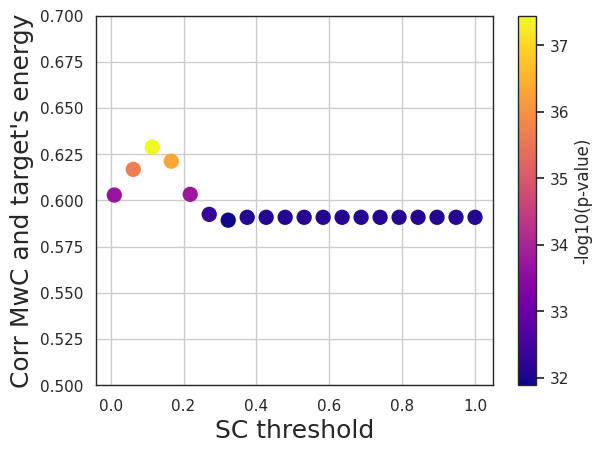

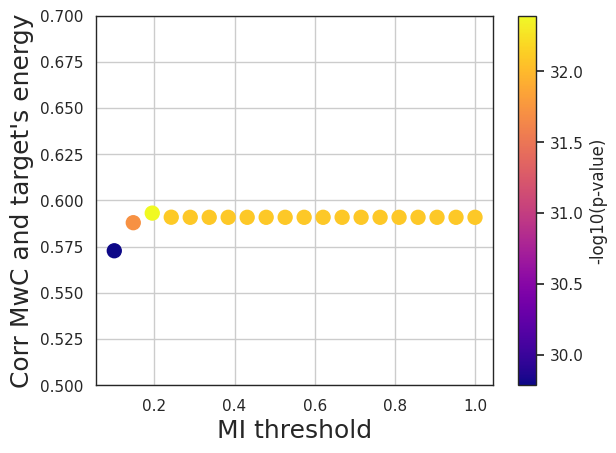

<Figure size 600x400 with 0 Axes>

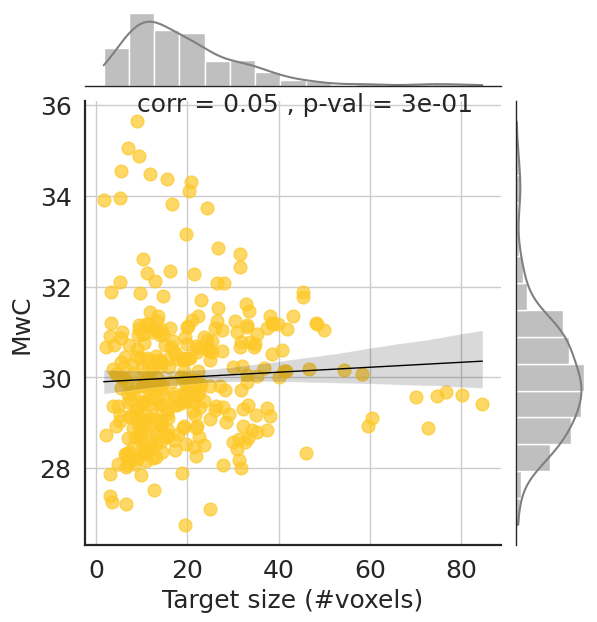

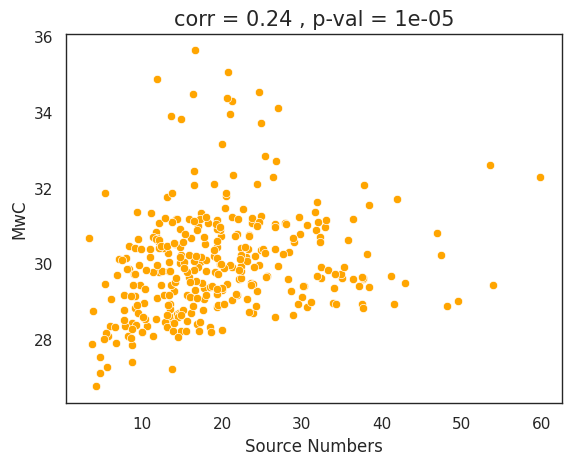

In [67]:
#--------------------------------------------------------------------------------------------
#------------------------- sensitivity to sc threshold -----------------------------------
#--------------------------------------------------------------------------------------------
plt.grid(True)
edata_medianallsub_rem = edata_medianallsub
nrois = 360
nrois_rem = nrois - len(limb_ind) 
sub_size = MIconn_allsub.shape[2]
MIconn_allsub[MIconn_allsub < 0.01]=0
Conn_Mat = MIconn_allsub
thr_FC = 1
scmask = 1
thr_sc = np.linspace(0.01,1 , 20 )

corr_scthr = np.zeros((len(thr_sc)))
p_scthr = np.zeros((len(thr_sc)))

for i , thr in enumerate(thr_sc):
    
    IC = only_IC_avg(Conn_Mat, edata_medianallsub_rem, SCconn_allsub, thr, thr_FC, sub_size, scmask, nrois_rem)
    corr_scthr[i] , p_scthr[i] = pcor(IC, DATA_avg.pet_avg)


sc = plt.scatter(thr_sc, corr_scthr, s=100, c=-np.log10(p_scthr), cmap='plasma')
plt.colorbar(sc, label='-log10(p-value)')

plt.ylim([0.5,0.7])
plt.xlabel('SC threshold', fontsize = FONT)
plt.ylabel('Corr MwC and target\'s energy', fontsize = FONT)
 
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    
plt.savefig('../results/Figures/SC_threshold.png', dpi=300, bbox_inches='tight')
plt.show()

#--------------------------------------------------------------------------------------------
#------------------------- sensitivity to fc threshold -----------------------------------
#--------------------------------------------------------------------------------------------
plt.grid(True)
edata_medianallsub_rem = edata_medianallsub
nrois = 360
nrois_rem = nrois - len(limb_ind) 
sub_size = MIconn_allsub.shape[2]
MIconn_allsub[MIconn_allsub < 0.0001]=0
Conn_Mat = MIconn_allsub
thr_sc = 1
scmask = 0
thr_fc = np.linspace(0.1,1 , 20 )

corr_fcthr = np.zeros((len(thr_fc)))
p_fcthr = np.zeros((len(thr_fc)))

for i , thr in enumerate(thr_fc):
    
    IC = only_IC_avg(Conn_Mat, edata_medianallsub_rem, SCconn_allsub, thr_sc, thr, sub_size, scmask, nrois_rem)
    corr_fcthr[i] , p_fcthr[i] = pcor(IC, DATA_avg.pet_avg)


sc = plt.scatter(thr_fc, corr_fcthr, s=100, c=-np.log10(p_fcthr), cmap='plasma')
plt.colorbar(sc, label='-log10(p-value)')

plt.ylim([0.5,0.7])
plt.xlabel('MI threshold', fontsize = FONT)
plt.ylabel('Corr MwC and target\'s energy', fontsize = FONT)
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)

plt.savefig('../results/Figures/MI_threshold.png', dpi=300, bbox_inches='tight')
plt.show()





#--------------------------------------------------------------------------------------------
#------------------- sensitivity to region size (number of voxels) -----------------------
#--------------------------------------------------------------------------------------------
COLOR = [227/255 , 108/255, 138/255]

num_voxels_avg = np.mean(num_voxels , axis = 1)
corr_IC_w_vox, p_IC_w_vox = pcor(DATA_avg.ICallsub_w_avg, num_voxels_avg)


plt.figure(figsize=(6,4))
g = sns.jointplot(x = num_voxels_avg , y = DATA_avg.ICallsub_w_avg, kind="reg", color="#547BC9",
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':"#FDC827", 'edgecolors':"#FDC827"}  ) 





title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_w_vox) , float(p_IC_w_vox))
g.fig.suptitle(f"corr = {corr_IC_w_vox:.2f} , p-val = {p_IC_w_vox:.0e}", fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Actual Target Energy', 'MCC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  

plt.xlabel('Target size (#voxels)', fontsize = FONT)
plt.ylabel('MwC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    
plt.grid(True)
plt.savefig('../results/Figures/Target_size.png', dpi=300, bbox_inches='tight')
plt.show()

#--------------------------------------------------------------------------------------------
#-------------------------- 3. sensitivity to source numbers --------------------------------
#--------------------------------------------------------------------------------------------


corr_IC_w_source, p_IC_w_source = pcor(DATA_avg.ICallsub_w_avg, DATA_avg.degallsub_b_avg)

#sns.lmplot(data = DATA_avg , x = 'pet_avg' , y ='ICallsu_w_avg' , hue = 'yeo_7_nw'  )
sns.scatterplot(data = DATA_avg , x = 'degallsub_b_avg' , y ='ICallsub_w_avg' , color = 'Orange') 
title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_w_source) , float(p_IC_w_source))
plt.title(title , fontdict={'fontsize': 15})
plt.xlabel('Source Numbers')
plt.ylabel('MwC')
plt.show()

## Fig S8:CMRglc - networks

/tmp/ipykernel_78695/2747085765.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




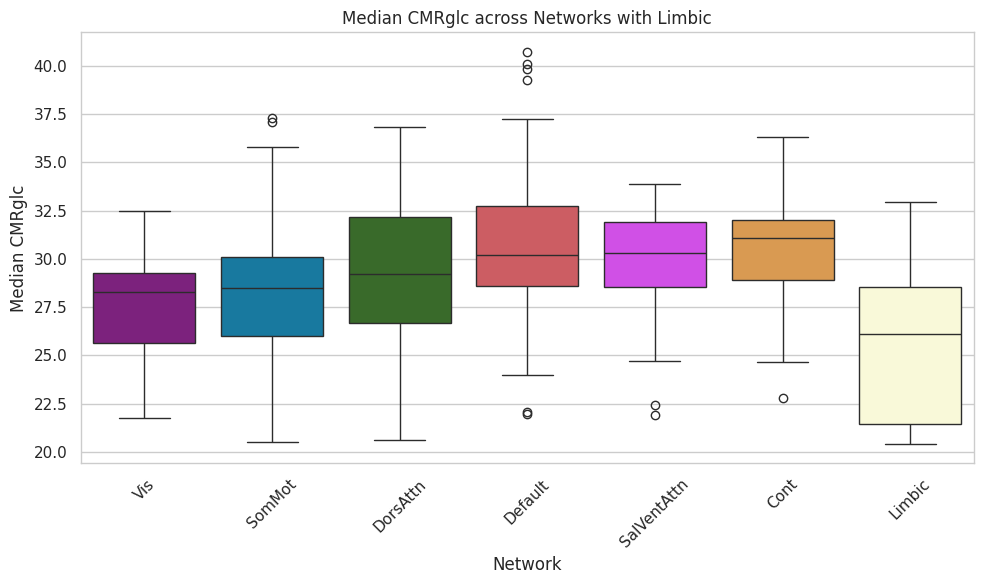

In [94]:
net_label_WithLimbic = pd.read_csv(f'../data/external/mmp2yeo7nw_mapping.csv')
net_label_WithLimbic.reset_index(drop=True, inplace=True)
network_to_number = {network: i + 1 for i, network in enumerate(net_label_WithLimbic['yeo_7_nw'].unique())}
net_label_WithLimbic['network_number'] = net_label_WithLimbic['yeo_7_nw'].map(network_to_number)

color = [(139, 19, 140),(1,131, 182),(51, 116, 32),
         (222, 75, 82),(226, 55, 255),(239, 156, 60), (255, 254, 211)]
net_color_WithLimbic  = [(r/255, g/255, b/255 , 1)  for r,g,b in color]
network_palette = dict(zip(net_names, net_color_WithLimbic))


xtik = ['Vis','Som','Dors','Def', 'Sal' , 'Cont', 'Limbic']
net_names_WithLimbic = ['Vis', 'SomMot' ,'DorsAttn' ,'Default' ,'SalVentAttn', 'Cont', 'Limbic' ]
net_num_WithLimbic = net_label_WithLimbic["network_number"]
new_net_num_WithLimbic = np.tile(net_num.transpose(), (nrois, 1)) 
num_net = len(net_names_WithLimbic) 

LIMB = "with"

data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
DATA_avg_WithLimbic =   pd.read_csv(data_avg_path)
edata = DATA_avg_WithLimbic.pet_avg   
flat_values = edata.values             
flat_networks = net_label_WithLimbic['yeo_7_nw'].values  

df_box = pd.DataFrame({
    'Value': flat_values,
    'Network': flat_networks
})

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Network', y='Value', data=df_box, palette=network_palette)

plt.xticks(rotation=45)
plt.ylabel('Median CMRglc')
plt.xlabel('Network')
plt.title(f'Median CMRglc across Networks with Limbic')
plt.tight_layout()
plt.show()

## Fig S7: MwC-Mito association

In [93]:
mito_img_CI = nib.load('PATH to CI.nii.gz')
mito_img_CII = nib.load('PATH to CII.nii.gz')
mito_img_CIV = nib.load('PATH to CIV.nii.gz')
mito_img_TRC = nib.load('PATH to TRC.nii.gz')
mito_img_MRC = nib.load('PATH to MRC.nii.gz')
mito_img_MitoD = nib.load('PATH to MitoD.nii.gz')


mito_data_CI = mito_img_CI.get_fdata()
mito_data_CII = mito_img_CII.get_fdata()
mito_data_CIV = mito_img_CIV.get_fdata()
mito_data_TRC = mito_img_TRC.get_fdata()
mito_data_MRC = mito_img_MRC.get_fdata()
mito_data_MitoD = mito_img_MitoD.get_fdata()



mmp_in_mni_6 = f'../data/external/mmp_in_mni_6.nii.gz'
atlas_mito = nib.load(mmp_in_mni_6)
atlas_data_mito = atlas_mito.get_fdata()






region_labels_mito = np.unique(atlas_data_mito)
region_labels_mito = region_labels_mito[region_labels_mito > 0]


n_regions = len(region_labels_mito)
mito_values = {
    'CI': np.zeros(n_regions),
    'CII': np.zeros(n_regions),
    'CIV': np.zeros(n_regions),
    'TRC': np.zeros(n_regions),
    'MRC': np.zeros(n_regions),
    'MitoD': np.zeros(n_regions),
    'syn': np.zeros(n_regions),
}
for i, label in enumerate(region_labels_mito):
    region_mask = atlas_data_mito == label
    
    region_vals_CI = mito_data_CI[region_mask]
    region_vals_CII = mito_data_CII[region_mask]
    region_vals_CIV = mito_data_CIV[region_mask]
    region_vals_TRC = mito_data_TRC[region_mask]
    region_vals_MRC = mito_data_MRC[region_mask]
    region_vals_MitoD = mito_data_MitoD[region_mask]


    # Compute mean of nonzero, non-NaN voxels
    mito_values['CI'][i] = np.nanmedian(region_vals_CI[region_vals_CI != 0])
    mito_values['CII'][i] = np.nanmedian(region_vals_CII[region_vals_CII != 0])
    mito_values['CIV'][i] = np.nanmedian(region_vals_CIV[region_vals_CIV != 0])
    mito_values['TRC'][i] = np.nanmedian(region_vals_TRC[region_vals_TRC != 0])
    mito_values['MRC'][i] = np.nanmedian(region_vals_MRC[region_vals_MRC != 0])
    mito_values['MitoD'][i] = np.nanmedian(region_vals_MitoD[region_vals_MitoD != 0])



# delete limbic regions, if needed:
mito_values['CI'] = np.delete(mito_values['CI'], limb_ind , axis = 0)
mito_values['CII'] = np.delete(mito_values['CII'], limb_ind , axis = 0)
mito_values['CIV'] = np.delete(mito_values['CIV'], limb_ind , axis = 0)
mito_values['TRC'] = np.delete(mito_values['TRC'], limb_ind , axis = 0)
mito_values['MRC'] = np.delete(mito_values['MRC'], limb_ind , axis = 0)
mito_values['MitoD'] = np.delete(mito_values['MitoD'], limb_ind , axis = 0)





data = pd.DataFrame({'IC':(DATA_avg.ICallsub_w_avg), 'deg':(DATA_avg_pr.degallsub_w_avg), 'pet':(DATA_avg.pet_avg)
                    ,'mito_CI':(mito_values['CI']), 'mito_CII':(mito_values['CII']), 'mito_CIV':(mito_values['CIV']), 'mito_TRC':(mito_values['TRC'])
                    , 'mito_MRC':(mito_values['MRC']), 'mito_MitoD':(mito_values['MitoD'])})











corr_IC_CI, p_IC_CI =spearmanr(data["mito_CI"], data["IC"])
corr_IC_CII, p_IC_CII =spearmanr(data["mito_CII"], data["IC"])
corr_IC_CIV, p_IC_CIV = spearmanr(data["mito_CIV"], data["IC"])
corr_IC_TRC, p_IC_TRC = spearmanr(data["mito_TRC"], data["IC"])
corr_IC_MRC, p_IC_MRC = spearmanr(data["mito_MRC"], data["IC"])
corr_IC_MitoD, p_IC_MitoD = spearmanr(data["mito_MitoD"], data["IC"])

COLOR = IC_color
plt.figure(figsize=(6,4))
g = sns.jointplot(data=data, x='IC', y='mito_MitoD', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 



title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_MitoD), float(p_IC_MitoD))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
g.set_axis_labels('Target Energy', 'MCC', fontsize=FONT)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('MwC', fontsize = FONT)
plt.ylabel('Mitochondrial Density', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    

plt.show()




plt.figure(figsize=(6,4))
g = sns.jointplot(data=data, x='IC', y='mito_MRC', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 



title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_MRC), float(p_IC_MRC))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('MwC', fontsize = FONT)
plt.ylabel('MRC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    

plt.show()




plt.figure(figsize=(6,4))
g = sns.jointplot(data=data, x='IC', y='mito_TRC', kind="reg", color=COLOR,
                  marginal_kws=dict(bins=15, fill=True, color='gray'), 
                  line_kws={'color': 'black', 'lw': 1}, 
                  scatter_kws={'s': 85, 'alpha': 0.7, 'facecolors':COLOR, 'edgecolors':COLOR}  ) 



title = "corr = {:.2f} , p-val = {:.0e}".format(float(corr_IC_TRC), float(p_IC_TRC))
    
#g.fig.suptitle(f"corr = {corr_IC_w_E:.2f}"", $Pval_{smash}$ < 0.001", fontsize=FONT, va='baseline', y=0.8)
g.fig.suptitle(title, fontsize=FONT, va='baseline', y=0.8)
plt.tick_params(axis='both', which='major', labelsize= FONT)  
plt.grid(True)
plt.xlabel('MwC', fontsize = FONT)
plt.ylabel('TRC', fontsize = FONT)

ax =  g.ax_joint  
spine_width = 1.6  
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
    

plt.show()







# Statistical comparison DC, MCC

## regression CMRglc = DC + MCC

In [112]:
#--------------------------------------------------------------------------------------------
#------------------ read all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------
LIMB = "without"
session = 'AUF'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_wSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl'


with open(file_path, 'rb') as file:
    data_input_auf = pickle.load(file)
    
DATA_avg_auf =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_auf = pickle.load(file)

DATA_avg_pr_auf =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_auf = pickle.load(file)



session = 'ZU'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_wSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_wSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_wSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_wSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_zu = pickle.load(file)
    
DATA_avg_zu =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_zu = pickle.load(file)

DATA_avg_pr_zu =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_zu = pickle.load(file)




session = 'm1'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_woSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_woSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_woSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_woSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_m1 = pickle.load(file)
    
DATA_avg_m1 =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_m1 = pickle.load(file)

DATA_avg_pr_m1 =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_m1 = pickle.load(file)



session = 'm2'
file_path = f'../data/processed/matrices_data_{session}_{LIMB}_limbic.pkl'
data_avg_path = f'../data/processed/DATA_avg_woSC_{session}_{LIMB}_limb.csv'
data_sub_path = f'../data/processed/data_single_sub_woSC_{session}_{LIMB}_limb.pkl'

data_avg_pr_path = f'../data/processed/DATA_avg_woSC_pr_{session}_{LIMB}_limb.csv'
data_sub_pr_path = f'../data/processed/data_single_sub_woSC_pr_{session}_{LIMB}_limb.pkl'

with open(file_path, 'rb') as file:
    data_input_m2 = pickle.load(file)
    
DATA_avg_m2 =   pd.read_csv(data_avg_path)
with open(data_sub_path, 'rb') as file:
    data_single_sub_m2 = pickle.load(file)

DATA_avg_pr_m2 =   pd.read_csv(data_avg_pr_path)
with open(data_sub_pr_path, 'rb') as file:
    data_single_sub_pr_m2 = pickle.load(file)



#--------------------------------------------------------------------------------------------
#------------------ concatenated all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------


df1 = zscore(data_single_sub_auf['ICallsub_w'], nan_policy='omit')
df2 = zscore(data_single_sub_zu['ICallsub_w'], nan_policy='omit')
df3 = zscore(data_single_sub_m1['ICallsub_w'], nan_policy='omit')
df4 = zscore(data_single_sub_m2['ICallsub_w'], nan_policy='omit')

ICallsub_allsessions = np.hstack((df1, df2, df3, df4))
#ICallsub_allsessions = df3
ICallsub_allsessions = pd.DataFrame(ICallsub_allsessions)



df1 = zscore(data_single_sub_pr_auf['degallsub_w'], nan_policy='omit')
df2 = zscore(data_single_sub_pr_zu['degallsub_w'], nan_policy='omit')
df3 = zscore(data_single_sub_pr_m1['degallsub_w'], nan_policy='omit')
df4 = zscore(data_single_sub_pr_m2['degallsub_w'], nan_policy='omit')

degallsub_allsessions = np.hstack((df1, df2, df3, df4))
#degallsub_allsessions = df3
degallsub_allsessions = pd.DataFrame(degallsub_allsessions)


df1 = zscore(data_input_auf['edata_medianallsub'], nan_policy='omit')
df2 = zscore(data_input_zu['edata_medianallsub'], nan_policy='omit')
df3 = zscore(data_input_m1['edata_medianallsub'], nan_policy='omit')
df4 = zscore(data_input_m2['edata_medianallsub'], nan_policy='omit')

edata_allsub_allsessions = np.hstack((df1, df2, df3, df4))
#edata_allsub_allsessions = df3
edata_allsub_allsessions = pd.DataFrame(edata_allsub_allsessions)


ICallsub_allsessions_avg = np.nanmean(ICallsub_allsessions, axis = 1)
degallsub_allsessions_avg = np.nanmean(degallsub_allsessions, axis = 1)
edata_allsub_allsessions_avg = np.nanmean(edata_allsub_allsessions, axis = 1)



#--------------------------------------------------------------------------------------------
#------------------ concatenated all sessions data   -------------------------------
#-------------------------------------------------------------------------------------------

IC = ICallsub_allsessions_avg
DC = degallsub_allsessions_avg
CMRglc = edata_allsub_allsessions_avg


IC = np.array(IC).flatten()
DC = np.array(DC).flatten()
CMRglc = np.array(CMRglc).flatten()

alldata_avg = pd.DataFrame({'IC':IC, 'DC':DC, 'pet':CMRglc})

r_IC_CMRglc,p_IC_CMRglc = pcor(IC,CMRglc)  
print('correlation MwC and CMRglc allsession datasets',r_IC_CMRglc )
r_DC_CMRglc , p_DC_CMRglc= pcor(DC,CMRglc)    
print('correlation DC and CMRglc allsession datasets',r_DC_CMRglc)
r_IC_DC , p_IC_DC = pcor(IC,DC)
print('correlation MwC and DC allsession datasets',r_IC_DC)



sub_size = np.size(edata_allsub_allsessions, axis =1)
corr_IC_E_allsub = np.zeros((sub_size))
p_IC_E_allsub = np.zeros((sub_size))

for j in range(sub_size):
                                
    corr_IC_E_allsub[j], p_IC_E_allsub[j] = pcor(edata_allsub_allsessions.iloc[:,j], ICallsub_allsessions.iloc[:,j]) 


print('min p-val in subject level data:',p_IC_E_allsub.min())
print('max p-val in subject level data:',p_IC_E_allsub.max())

# # Load data
DC = degallsub_allsessions_avg
MwC = ICallsub_allsessions_avg
CMRglc = edata_allsub_allsessions_avg

# Flatten arrays
MwC = np.array(MwC).flatten()
DC = np.array(DC).flatten()
CMRglc = np.array(CMRglc).flatten()

# Create dataframe
df = pd.DataFrame({"MwC": MwC, "DC": DC, "CMRglc": CMRglc})

# Model 1: CMRglc ~ MCC (Baseline model)
X1 = sm.add_constant(df["MwC"])  # Add intercept
model1 = sm.OLS(df["CMRglc"], X1).fit()

# Model 2: CMRglc ~ MCC + DC (Full model)
X2 = sm.add_constant(df[["MwC", "DC"]])  # Add intercept
model2 = sm.OLS(df["CMRglc"], X2).fit()

# Print Model Summaries
print("\n### Model 1: CMRglc ~ MwC ###")
print(model1.summary())

print("\n### Model 2: CMRglc ~ MwC + DC ###")
print(model2.summary())

# Compare R² values
r2_model1 = model1.rsquared
r2_model2 = model2.rsquared
print(f"\nR² for Model 1 (MwC only): {r2_model1:.4f}")
print(f"R² for Model 2 (MwC + DC): {r2_model2:.4f}")

# ANOVA Comparison (F-test)
anova_results = sm.stats.anova_lm(model1, model2)
anova_p_value = anova_results["Pr(>F)"][1]
print(f"\nANOVA F-test p-value: {anova_p_value:.4f}")

# Interpretation
print(anova_results)
if anova_p_value < 0.01:
    print("✅ Adding DC significantly improves the model. Both MwC and DC together explain more variance in CMRglc.")
else:
    print("❌ Adding DC does not significantly improve the model over MwC alone.")


correlation MwC and CMRglc allsession datasets 0.6307725311266696
correlation DC and CMRglc allsession datasets 0.15881382669953487
correlation MwC and DC allsession datasets -0.07844509932522083
min p-val in subject level data: 2.4748848871555778e-36
max p-val in subject level data: 1.8551628693933833e-05

### Model 1: CMRglc ~ MwC ###
                            OLS Regression Results                            
Dep. Variable:                 CMRglc   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     219.4
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.85e-38
Time:                        11:43:39   Log-Likelihood:                -312.96
No. Observations:                 334   AIC:                             629.9
Df Residuals:                     332   BIC:                             637.5
Df Model:                    

## Steiger test DC vs MCC

In [117]:

n = 45 
z_score, p_value = steiger_z_test(r_IC_CMRglc, r_DC_CMRglc, r_IC_DC, n)
print("steiger:", z_score, p_value)




steiger: 2.570560428993966 0.010153411108486221
